Attempting to load historical HOURLY data from file...
Original data shape: (87672, 9)
Data shape after filtering for 2021 onwards: (35064, 9)
Using exogenous variables: ['Gas price', 'Wind onshore [MWh]', 'Photovoltaics [MWh]', 'Grid load [MWh]']
Historical HOURLY data loaded successfully. Shape: (35064, 9)
Using target variable: 'Spot market price(cents/kWh)'

--- Historical Exogenous Variable Statistics (from df) ---
          Gas price  Wind onshore [MWh]  Photovoltaics [MWh]  Grid load [MWh]
count  35064.000000        35064.000000         35064.000000     35064.000000
mean      76.769815        12038.498367          6292.802682     54494.071605
std       64.828306         9774.899074          9730.328573      9570.156363
min       15.440000           46.500000             0.000000     30902.750000
25%       26.840000         4384.437500             3.250000     46692.937500
50%       41.300000         9068.375000           182.500000     54490.750000
75%      117.920000        174

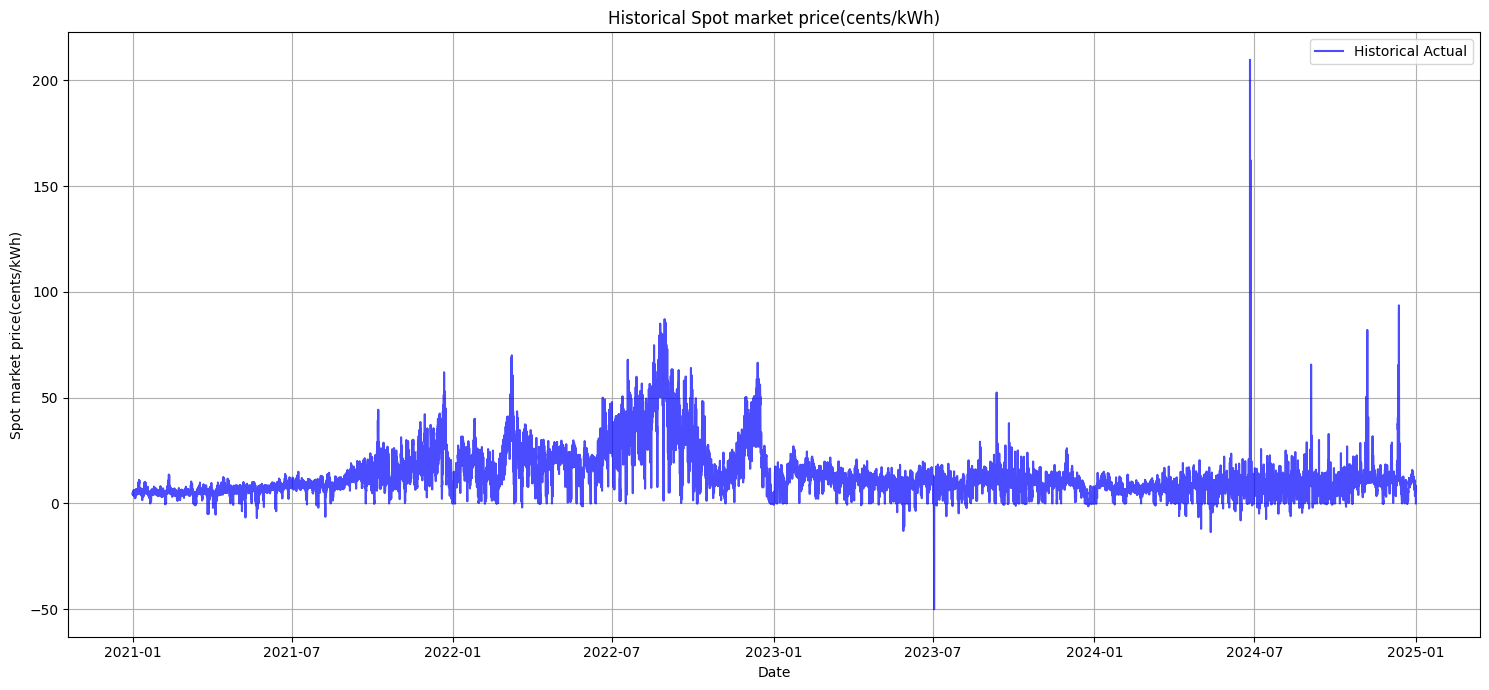


--- Inputting Fixed ARIMA and Seasonal Period (m) per Season ---

--- Season 1 ---

--- Enter Fixed ARIMA (p, d, q) and Seasonal Period (m) for Season 1 (HOURLY Data) ---
The ARIMA order (p, d, q) and seasonal period (m) will be FIXED for the seasonal grid search for this season.
Enter FIXED non-seasonal ARIMA (p, d, q) order for Season 1 (e.g., '2,1,2'): 3,1,
Invalid ARIMA input. Please enter integers separated by commas.
Enter FIXED non-seasonal ARIMA (p, d, q) order for Season 1 (e.g., '2,1,2'): 24
Invalid ARIMA input. Please enter exactly 3 non-negative integers separated by commas.
Enter FIXED non-seasonal ARIMA (p, d, q) order for Season 1 (e.g., '2,1,2'): 3,1,2
Enter FIXED seasonal period (m) for Season  1 (in HOURS, e.g., '24' for daily, '168' for weekly): 24

--- Season 2 ---

--- Enter Fixed ARIMA (p, d, q) and Seasonal Period (m) for Season 2 (HOURLY Data) ---
The ARIMA order (p, d, q) and seasonal period (m) will be FIXED for the seasonal grid search for this season.
Enter

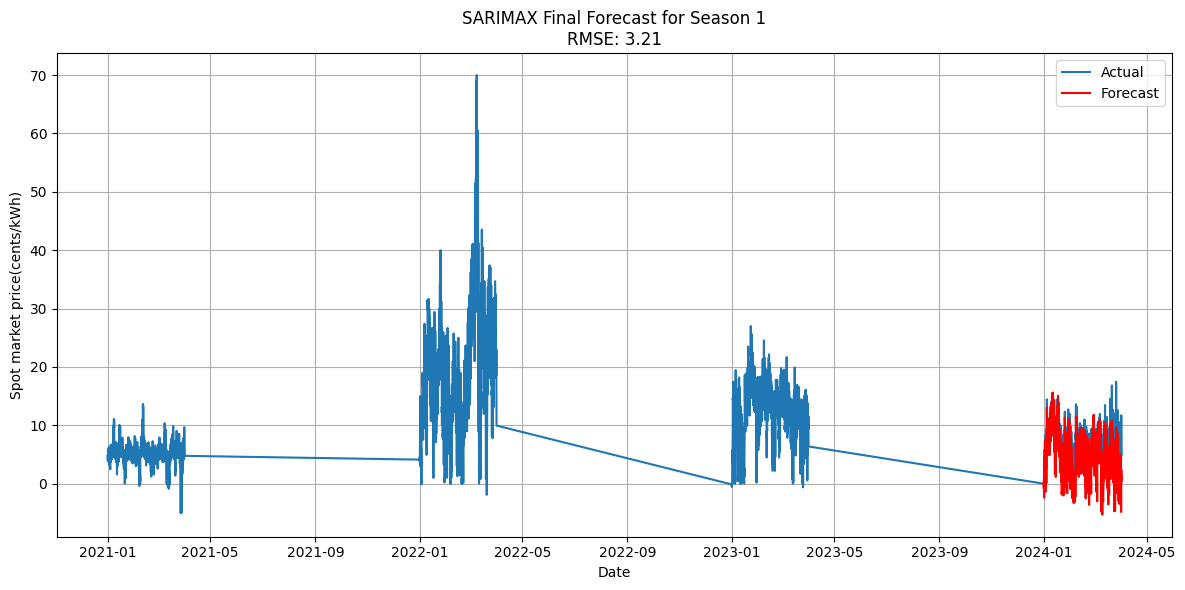

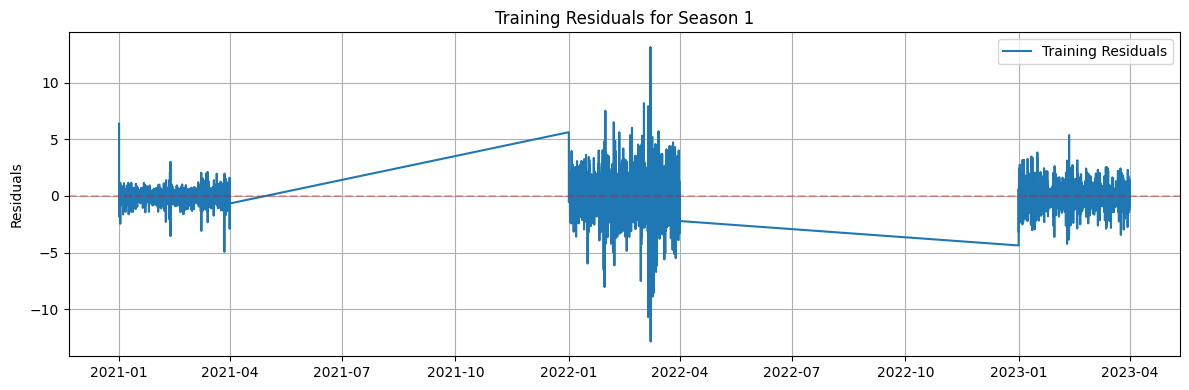

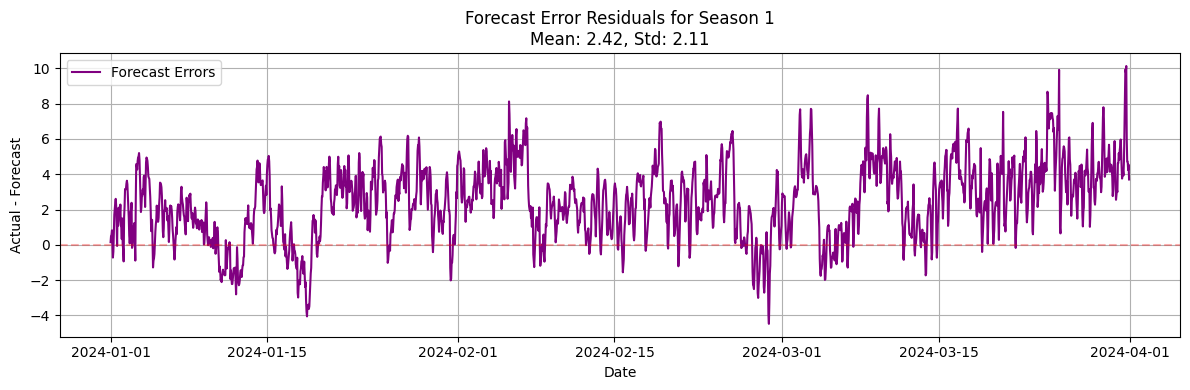


--- Season 2 (Final Training & Evaluation) ---
Using determined orders for final training: ARIMA(3, 1, 1) x Seasonal(1, 0, 0, 24)
Seasonal data for final training: 2021-04-01 00:00:00 to 2023-05-27 13:00:00 (5726 points)
Seasonal data for final testing: 2023-05-27 14:00:00 to 2024-06-30 23:00:00 (3010 points)

Training final model with orders: ARIMA (3, 1, 1), Seasonal (1, 0, 0, 24)
Training data size: 5726, Test data size: 3010

Season 2 FINAL Evaluation Metrics:
  MSE: 37.08
  MAE: 2.36
  RMSE: 6.09


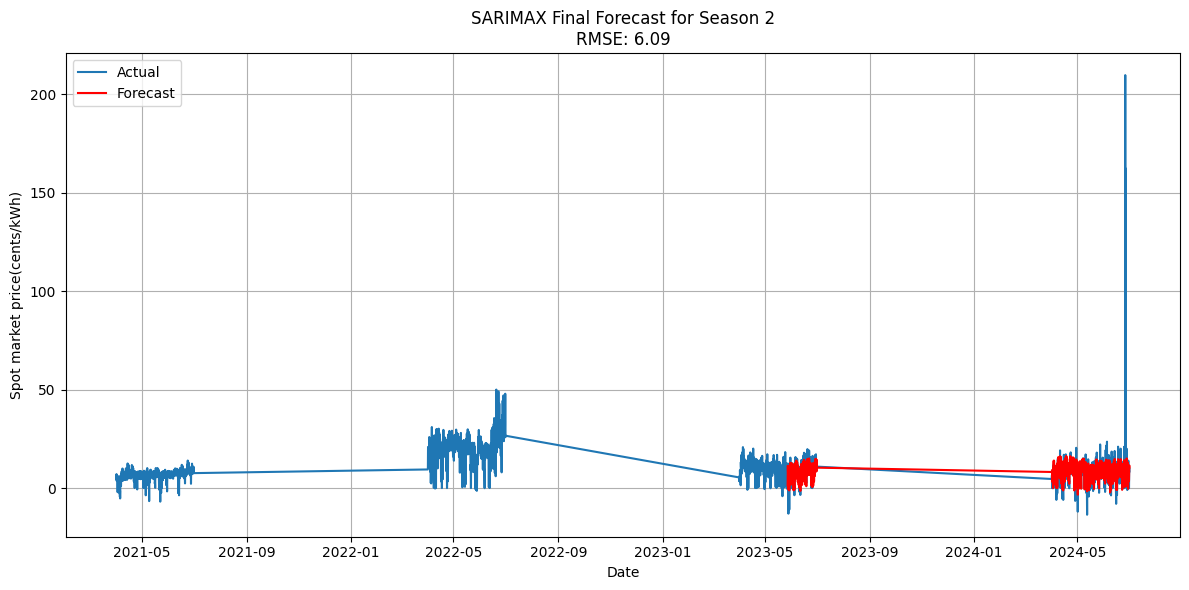

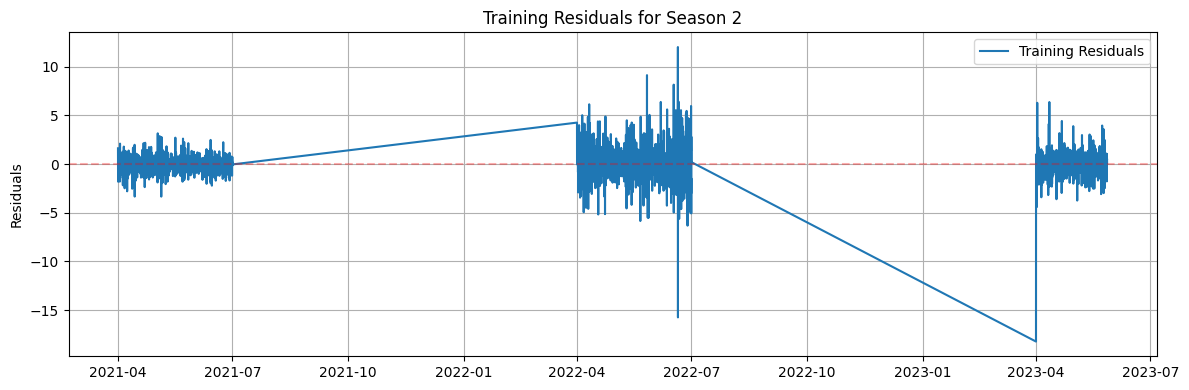

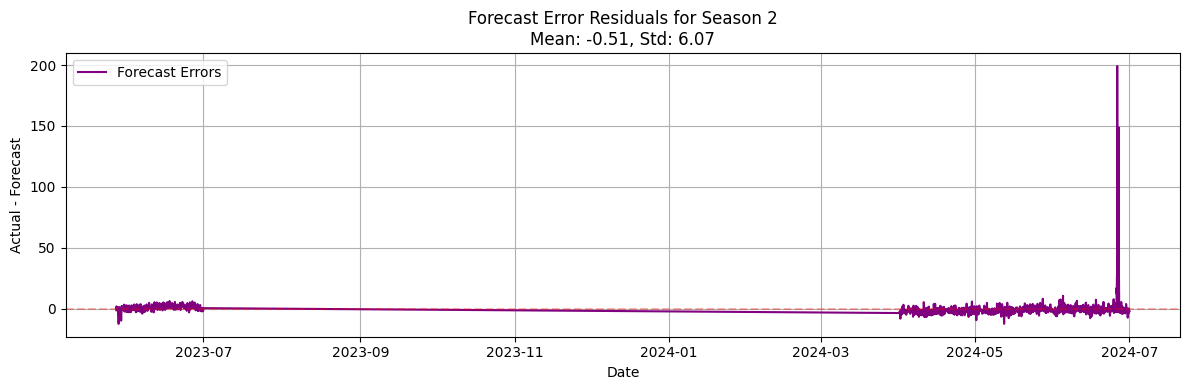


--- Season 3 (Final Training & Evaluation) ---
Using determined orders for final training: ARIMA(3, 1, 3) x Seasonal(0, 0, 1, 24)
Seasonal data for final training: 2021-07-01 00:00:00 to 2022-09-30 23:00:00 (4416 points)
Seasonal data for final testing: 2023-07-01 00:00:00 to 2024-09-30 23:00:00 (4416 points)

Training final model with orders: ARIMA (3, 1, 3), Seasonal (0, 0, 1, 24)
Training data size: 4416, Test data size: 4416

Season 3 FINAL Evaluation Metrics:
  MSE: 58.98
  MAE: 6.79
  RMSE: 7.68


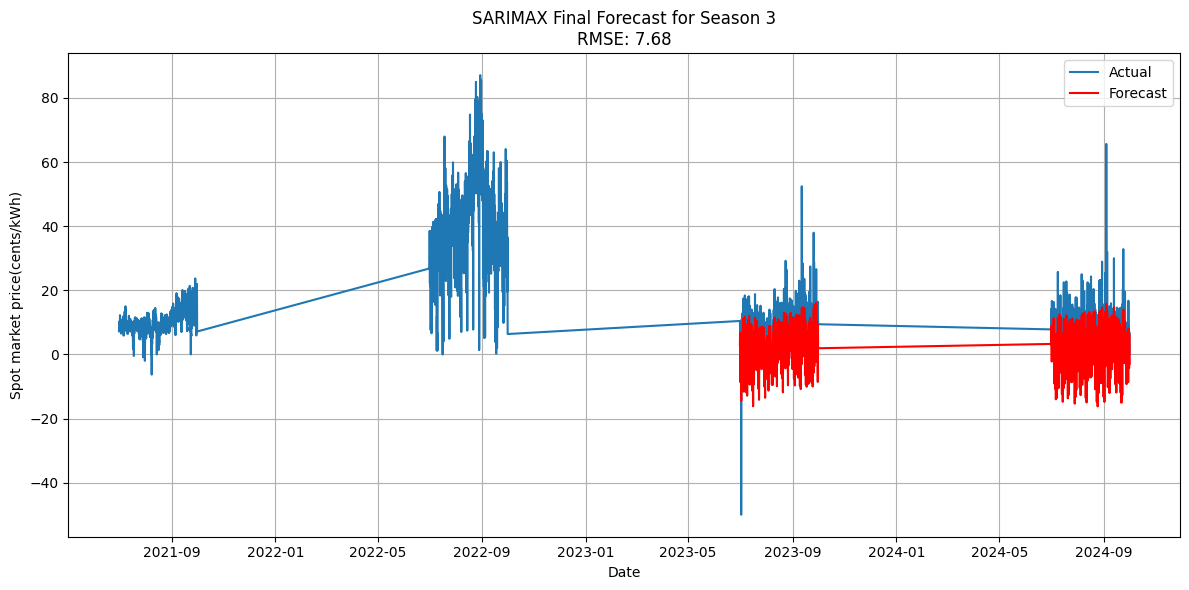

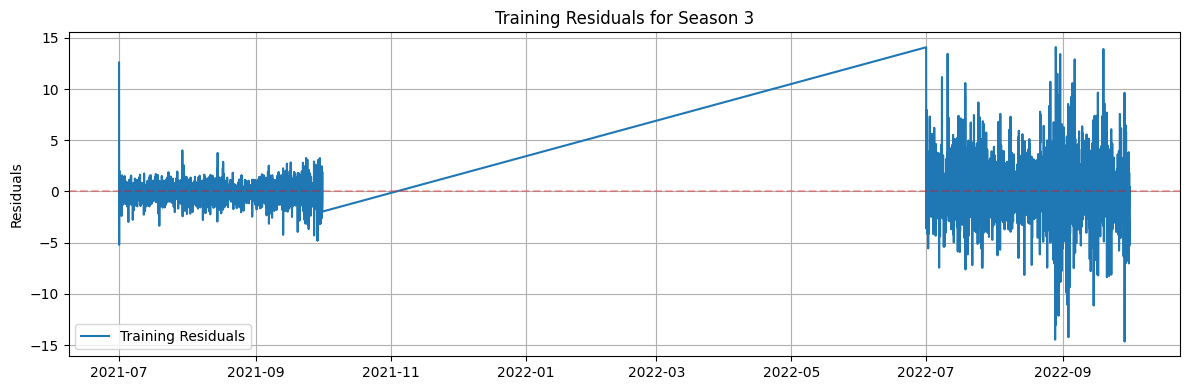

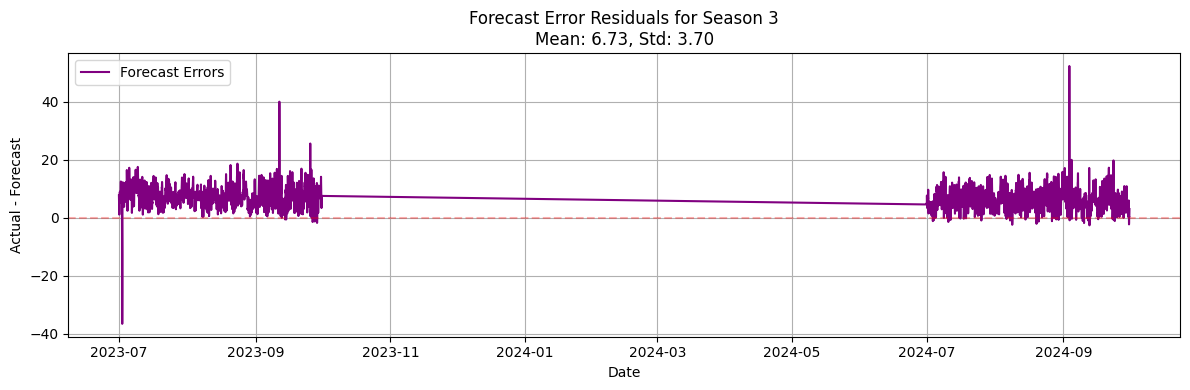


--- Season 4 (Final Training & Evaluation) ---
Using determined orders for final training: ARIMA(3, 1, 2) x Seasonal(1, 0, 0, 24)
Seasonal data for final training: 2021-10-01 00:00:00 to 2022-12-31 23:00:00 (4416 points)
Seasonal data for final testing: 2023-10-01 00:00:00 to 2024-12-31 23:00:00 (4415 points)

Training final model with orders: ARIMA (3, 1, 2), Seasonal (1, 0, 0, 24)
Training data size: 4416, Test data size: 4415

Season 4 FINAL Evaluation Metrics:
  MSE: 30.54
  MAE: 4.16
  RMSE: 5.53


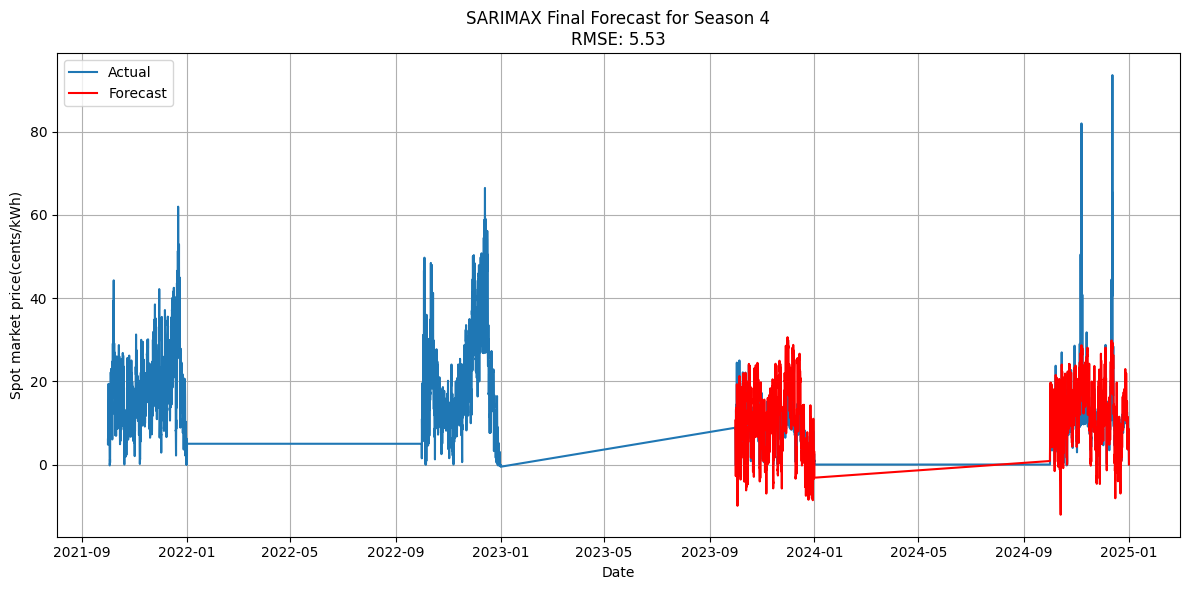

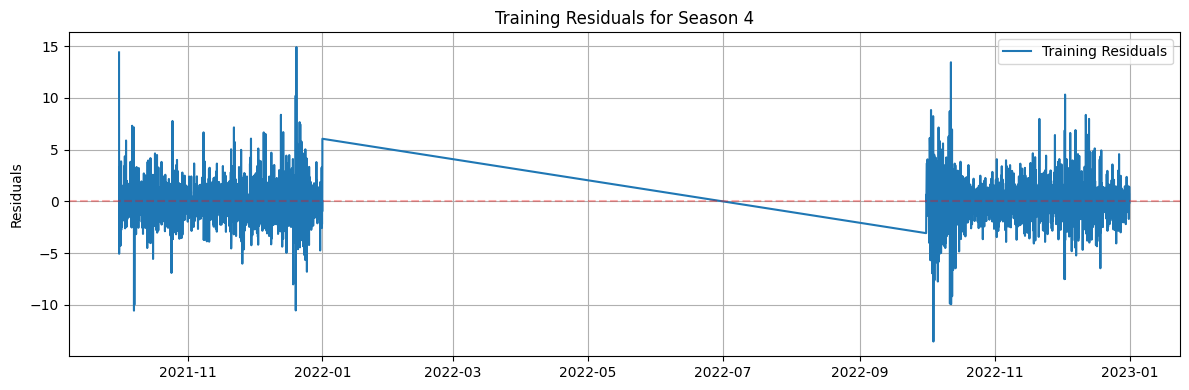

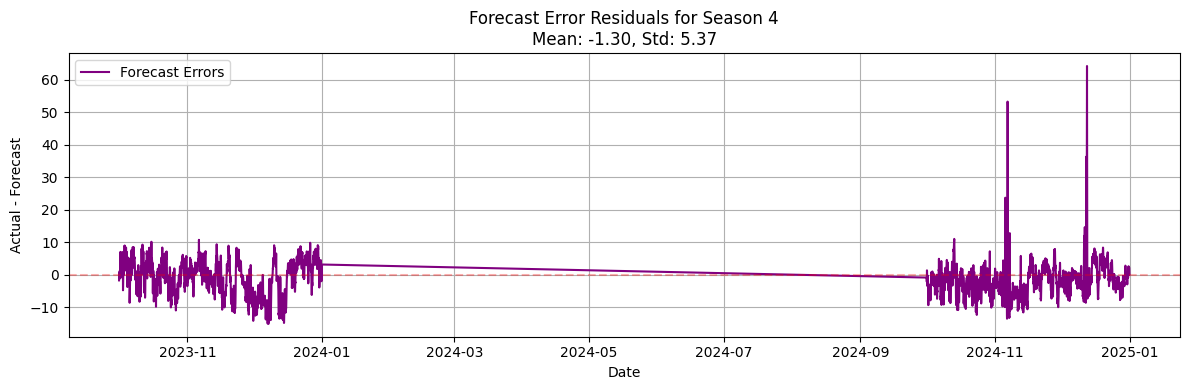


--- Summary of FINAL SARIMAX Evaluation per Season ---
Season 1:
  Order: ARIMA((3, 1, 2)) x Seasonal((1, 0, 1, 24))
  FINAL Test Set Metrics:
    MSE: 10.32
    MAE: 2.69
    RMSE: 3.21
--------------------
Season 2:
  Order: ARIMA((3, 1, 1)) x Seasonal((1, 0, 0, 24))
  FINAL Test Set Metrics:
    MSE: 37.08
    MAE: 2.36
    RMSE: 6.09
--------------------
Season 3:
  Order: ARIMA((3, 1, 3)) x Seasonal((0, 0, 1, 24))
  FINAL Test Set Metrics:
    MSE: 58.98
    MAE: 6.79
    RMSE: 7.68
--------------------
Season 4:
  Order: ARIMA((3, 1, 2)) x Seasonal((1, 0, 0, 24))
  FINAL Test Set Metrics:
    MSE: 30.54
    MAE: 4.16
    RMSE: 5.53
--------------------

--- End of Part 1 V.4 Hourly: SARIMAX Model Training and Evaluation (Fixed ARIMA, Seasonal Grid Search) ---
The fitted models are stored in the 'fitted_seasonal_models' dictionary.
The determined orders (fixed ARIMA, best seasonal) are stored in the 'best_orders_per_season' dictionary.
The scalers fitted during final training are

In [5]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import itertools
from sklearn.preprocessing import StandardScaler # Import StandardScaler for normalization
from sklearn.model_selection import TimeSeriesSplit # NEW IMPORT for TimeSeriesSplit
import sys # Import sys to allow exiting
import joblib # For saving models (if chosen)
import statsmodels.api as sm # Required for sm.load() and sm.tsa...20


warnings.filterwarnings("ignore") # Ignore harmless warnings from statsmodels

# --- Important: Configure your data loading here ---
# Replace the example pd.read_csv logic with code that loads your actual HOURLY data.
# Ensure the loaded DataFrame is assigned to the variable 'df'.
# Ensure your target variable column name is correctly assigned to 'target_variable'.
# The script REQUIRES 'df', 'target_variable', and columns listed in 'exog_cols' to be present.
# ---------------------------------------------------

# Define the target variable name (MUST match column name in your actual 'df')
target_variable = 'Spot market price(cents/kWh)' # <--- !! CUSTOMIZE THIS IF NEEDED !!

# Define the exogenous variables to be used in the model (MUST match column names in your actual 'df')
# Ensure these are defined and consistent with your data.
exog_cols = [
    'Gas price',
    'Wind onshore [MWh]',
    'Photovoltaics [MWh]',
    'Grid load [MWh]'
  
]


# --- Data Loading and Preparation (Hourly Data) ---
try:
    print("Attempting to load historical HOURLY data from file...")

    # --- START: ADD YOUR ACTUAL DATA LOADING LOGIC HERE ---
    # Example: Loading from a CSV file
    # 1. Specify the path to your data file
    file_path = './Spot Price_less variables_Hourly_Data.csv' # <--- !! CHANGE THIS PATH !!

    # 2. Load your data into the 'df' DataFrame
    #    - Make sure to set the correct index column (your timestamp/datetime column)
    #    - Make sure to parse dates when loading
    df = pd.read_csv(file_path, index_col='Date', parse_dates=True) # <--- !! CHANGE FILENAME AND INDEX COLUMN NAME !!
    print(f"Original data shape: {df.shape}")
    df = df.loc['2021-01-01':]
    print(f"Data shape after filtering for 2021 onwards: {df.shape}")
    # 3. (Optional but Recommended) Perform initial data cleaning/preparation
    #    - Ensure the index is sorted and unique
    df = df[~df.index.duplicated(keep='first')]
    df = df.sort_index()

    #    - Handle missing values if necessary (e.g., interpolation, dropping rows)
    #      Example: Drop rows where the target or essential exogenous variables are missing
    #      df = df.dropna(subset=[target_variable] + exog_cols) # Example, ensure this is appropriate for your data


    # --- END: ADD YOUR ACTUAL DATA LOADING LOGIC HERE ---

    # --- Checks after loading ---
    if df.empty:
        print("Error: Loaded DataFrame 'df' is empty.")
        sys.exit("Loaded DataFrame 'df' is empty.")

    if target_variable not in df.columns:
        print(f"Error: Target variable column '{target_variable}' not found in the loaded DataFrame 'df'.")
        sys.exit(f"Target column '{target_variable}' not found in 'df'.")

    # Ensure all specified exogenous columns exist in the DataFrame
    available_exog_cols = [col for col in exog_cols if col in df.columns]
    if len(available_exog_cols) != len(exog_cols):
        missing_initial_exog = list(set(exog_cols) - set(available_exog_cols))
        print(f"Error: The following exogenous columns defined in exog_cols were NOT found in the loaded data: {missing_initial_exog}")
        sys.exit("Missing exogenous columns in loaded data.")

    # Update exog_cols to only include available ones (should not happen if previous check passes, but as safeguard)
    exog_cols = available_exog_cols

    if not exog_cols:
        print("Warning: No valid exogenous variables found in the data. SARIMAX will be trained without exogenous regressors.")
        df_exog = None # Explicitly set df_exog to None if no exog columns are available
    else:
        df_exog = df[exog_cols] # Create the exogenous DataFrame
        print(f"Using exogenous variables: {exog_cols}")


    print(f"Historical HOURLY data loaded successfully. Shape: {df.shape}")
    print(f"Using target variable: '{target_variable}'")

except FileNotFoundError:
    # This error is specific to the example pd.read_csv. Adjust if using different loading.
    print(f"Error: Data file not found. Please check the 'file_path' in the data loading section.")
    sys.exit("Data file not found.")
except Exception as e:
    print(f"Error loading historical data: {e}")
    import sys
    sys.exit("Data loading failed. Please check your data loading logic and data file.")

# --- End Data Loading and Preparation ---


# --- Display historical exogenous variable statistics ---
print("\n--- Historical Exogenous Variable Statistics (from df) ---")
try:
    # Only try to describe if df_exog exists and is not empty
    if df_exog is not None and not df_exog.empty:
        historical_exog_stats = df_exog.describe()
        print(historical_exog_stats)
    elif exog_cols: # If exog_cols were defined but df_exog is None/empty
        print("Exogenous columns were defined, but no valid exogenous data available in df_exog to display statistics.")
    else: # If exog_cols was empty
        print("No exogenous variables defined or found to display statistics.")
except Exception as e:
    print(f"Error displaying historical exogenous variable statistics: {e}")
# --- END ADDED ---

# --- ADDED: Display historical target variable statistics ---
print(f"\n--- Historical Target Variable Statistics ({target_variable} from df) ---")
try:
    if target_variable in df.columns and not df[target_variable].dropna().empty:
        historical_target_stats = df[target_variable].describe()
        print(historical_target_stats)
    else:
        print(f"Target variable '{target_variable}' is not in df or contains only NaNs. Cannot display statistics.")
except Exception as e:
    print(f"Error displaying historical target variable statistics: {e}")
# --- END ADDED ---

# --- ADDED: Plot historical target variable ---
print(f"\n--- Plotting Historical Target Variable: {target_variable} ---")
try:
    if target_variable in df.columns and not df[target_variable].dropna().empty:
        plt.figure(figsize=(15, 7))
        # Use df.index and df[target_variable] which contain the loaded data
        plt.plot(df.index, df[target_variable], label='Historical Actual', color='blue', alpha=0.7)
        plt.title(f'Historical {target_variable}')
        plt.xlabel('Date')
        plt.ylabel(target_variable)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Historical target variable '{target_variable}' is not in df or contains only NaNs. Cannot plot.")
except Exception as e:
    print(f"Error plotting historical target variable: {e}")
# --- END ADDED ---


# --- Function to Get Fixed ARIMA and Seasonal Period (m) from User ---
def get_fixed_arima_and_seasonal_period(season_number):
    """
    Prompts the user to enter the fixed non-seasonal ARIMA (p, d, q) order
    and the fixed seasonal period (m) for a given season.
    """
    print(f"\n--- Enter Fixed ARIMA (p, d, q) and Seasonal Period (m) for Season {season_number} (HOURLY Data) ---")
    print("The ARIMA order (p, d, q) and seasonal period (m) will be FIXED for the seasonal grid search for this season.")

    while True:
        try:
            arima_str = input(f"Enter FIXED non-seasonal ARIMA (p, d, q) order for Season {season_number} (e.g., '2,1,2'): ").strip()
            fixed_arima_order = tuple(map(int, arima_str.split(',')))
            if len(fixed_arima_order) == 3 and all(x >= 0 for x in fixed_arima_order):
                break
            else:
                print("Invalid ARIMA input. Please enter exactly 3 non-negative integers separated by commas.")
        except ValueError:
            print("Invalid ARIMA input. Please enter integers separated by commas.")

    while True:
        try:
            m_str = input(f"Enter FIXED seasonal period (m) for Season  {season_number} (in HOURS, e.g., '24' for daily, '168' for weekly): ").strip()
            m_value = int(m_str)
            if m_value > 0:
                break
            else:
                print("Invalid seasonal period (m). Please enter a positive integer.")
        except ValueError:
            print("Invalid input. Please enter an integer.")

    return {'fixed_arima': fixed_arima_order, 'm': m_value}


# --- Helper function to evaluate a SARIMAX model on a validation set (for Grid Search) ---
def evaluate_sarimax_on_validation(train_y, val_y, train_exog, val_exog, arima_order, seasonal_order):
    """Trains a SARIMAX model on train_y and evaluates on val_y, returns RMSE."""
    # Ensure enough data for the specified orders
    m_period = seasonal_order[3] if seasonal_order and len(seasonal_order) == 4 else 0
    min_train_len_s_p = (seasonal_order[0] + seasonal_order[1]) * m_period + seasonal_order[2] * m_period if m_period > 0 else 0
    min_train_len_a_p = arima_order[0] + arima_order[1]
    min_train_len_a_q = arima_order[2]

    min_train_len = max(min_train_len_a_p, min_train_len_a_q, min_train_len_s_p)
    min_train_len = max(min_train_len, 30) # Absolute minimum buffer


    if len(train_y) < min_train_len or len(val_y) == 0:
        return float('inf') # Return infinity if not enough data

    try:
        model = SARIMAX(
            train_y,
            exog=train_exog, # Use potentially scaled exogenous variables
            order=arima_order,
            seasonal_order=seasonal_order,
            enforce_stationarity=False, # Often needed for real-world data
            enforce_invertibility=False, # Often needed for real-world data
            low_memory=True # Helps with large datasets
        )
        fitted_model = model.fit(disp=False, maxiter=100) # Kept reduced maxiter

        predictions = fitted_model.get_prediction(
            start=len(train_y),
            end=len(train_y) + len(val_y) - 1,
            exog=val_exog # Use potentially scaled exogenous variables
        ).predicted_mean

        predictions.index = val_y.index

        aligned_val_y, aligned_predictions = val_y.align(predictions, join='inner')

        if aligned_val_y.empty:
            return float('inf') # Return infinity if no overlapping data

        rmse = sqrt(mean_squared_error(aligned_val_y, aligned_predictions))

        if rmse > 1e6: # Increased threshold slightly
            return float('inf')

        return rmse

    except Exception as e:
        return float('inf') # Return infinity if fitting or prediction fails


# --- Function to perform a SEASONAL grid search with FIXED ARIMA order (using TimeSeriesSplit) ---
def seasonal_grid_search_fixed_arima(series, exog, fixed_arima_order, m_period, n_splits_cv=3): # ADD n_splits_cv parameter
    """
    Performs a grid search over specified ranges for Seasonal orders (P, D, Q),
    optimizing for RMSE using TimeSeriesSplit cross-validation, with a FIXED ARIMA order.
    Ranges: P=0-1, D=0-1, Q=0-1.
    Applies StandardScaler to exogenous variables within each CV fold.

    How Time Series K-Fold Cross-Validation Works Here:
    1. Time Series K-Fold (`TimeSeriesSplit`):
       - Unlike standard K-fold which shuffles data, `TimeSeriesSplit` maintains the temporal order.
       - It creates multiple train/validation splits where the training set always consists of older data, and the validation set consists of newer data immediately following it.
       - Specifically, `TimeSeriesSplit(n_splits=5)` will create 5 pairs of train/validation sets. The training set for each subsequent fold is an expansion of the previous one, including the data that was previously in the validation set. This ensures that the model always trains on data that chronologically precedes the data it's trying to validate on, preventing data leakage.
    2. Model Training and Evaluation per Fold:
       - For each combination of seasonal parameters (P, D, Q) being tested, the model is trained and evaluated `n_splits_cv` times.
       - Critically, `StandardScaler` is fitted *only* on the training data of the *current fold* and used to transform both train/validation exog for that fold. This prevents data leakage.
    3. Average RMSE for Model Selection:
       - The RMSE from each fold's validation set is collected.
       - The **average RMSE** across all folds is calculated for each candidate seasonal order.
       - This average RMSE provides a robust estimate for model selection.
    4. Computational Cost: This approach significantly increases computation time.
    """
    best_avg_rmse = float('inf') # Use average RMSE across folds for best model selection
    best_seasonal_order = None

    # Define the fixed parameter ranges for SEASONAL part
    P_range = range(0, 2)   
    D_range = range(0,1) # 0, 1
    Q_range = range(0, 2) # 0, 1

    # Calculate min data needed for a single fold's training set
    max_P = max(P_range) if P_range else 0
    max_D = max(D_range) if D_range else 0 # Corrected typo: D_range instead of D_D
    max_Q = max(Q_range) if Q_range else 0 # Corrected typo: Q_range instead of Q_Q
    
    min_train_len_for_fold_s_p = max(max_P, max_D, max_Q) * m_period if m_period > 0 else 0 
    
    min_train_len_for_fold_a_p = fixed_arima_order[0] + fixed_arima_order[1]
    min_train_len_for_fold_a_q = fixed_arima_order[2]

    min_train_len_for_fold = max(min_train_len_for_fold_a_p, min_train_len_for_fold_a_q, min_train_len_for_fold_s_p)
    min_train_len_for_fold = max(min_train_len_for_fold, 30) # Absolute minimum buffer

    # Ensure enough total data for TimeSeriesSplit CV
    if len(series) < min_train_len_for_fold * n_splits_cv:
        print(f"Error: Insufficient total data ({len(series)}) for TimeSeriesSplit CV ({n_splits_cv} splits) in grid search. Need at least {min_train_len_for_fold * n_splits_cv} points for folds.")
        return fixed_arima_order, None, float('inf'), None # Return fixed ARIMA order, None for seasonal


    # Initialize TimeSeriesSplit: Ensures chronological order is maintained
    tscv = TimeSeriesSplit(n_splits=n_splits_cv, max_train_size=None) # max_train_size can be set to limit individual fold sizes

    print(f"\nStarting SEASONAL grid search with TimeSeriesSplit ({n_splits_cv} folds) for m={m_period}, FIXED ARIMA{fixed_arima_order}...")
    print(f"Searching P in {list(P_range)}, D in {list(D_range)}, Q in {list(Q_range)}")
    print(f"Minimum training data size per fold: {min_train_len_for_fold} hours.")

    seasonal_parameter_combinations = list(itertools.product(P_range, D_range, Q_range))
    total_combinations = len(seasonal_parameter_combinations)
    print(f"Total SEASONAL combinations to evaluate: {total_combinations}")

    for i, (P, D, Q) in enumerate(seasonal_parameter_combinations):
        current_arima_order = fixed_arima_order
        current_seasonal_order = (P, D, Q, m_period)
        
        fold_rmses = []
        # Iterate through folds generated by TimeSeriesSplit
        for fold_idx, (train_index, val_index) in enumerate(tscv.split(series, exog)): # Pass both series and exog for splitting indices
            train_y_fold, val_y_fold = series.iloc[train_index], series.iloc[val_index]
            train_exog_fold = exog.iloc[train_index] if exog is not None else None
            val_exog_fold = exog.iloc[val_index] if exog is not None else None

            # --- Apply StandardScaler WITHIN each fold to prevent data leakage ---
            scaler_fold = None
            train_exog_fold_scaled = train_exog_fold # Default to unscaled
            val_exog_fold_scaled = val_exog_fold     # Default to unscaled

            if train_exog_fold is not None and not train_exog_fold.empty:
                scaler_fold = StandardScaler()
                constant_cols_fold = train_exog_fold.columns[train_exog_fold.nunique() <= 1].tolist()
                
                if constant_cols_fold:
                    train_exog_fold_varying = train_exog_fold.drop(columns=constant_cols_fold)
                    if not train_exog_fold_varying.empty:
                        train_exog_fold_scaled_temp = pd.DataFrame(scaler_fold.fit_transform(train_exog_fold_varying),
                                                                 index=train_exog_fold_varying.index,
                                                                 columns=train_exog_fold_varying.columns)
                        train_exog_fold_scaled = pd.concat([train_exog_fold_scaled_temp, pd.DataFrame(0.0, index=train_exog_fold.index, columns=constant_cols_fold)], axis=1)
                        train_exog_fold_scaled = train_exog_fold_scaled[train_exog_fold.columns]
                    else: 
                        train_exog_fold_scaled = pd.DataFrame(0.0, index=train_exog_fold.index, columns=constant_cols_fold)
                        train_exog_fold_scaled = train_exog_fold_scaled[train_exog_fold.columns]
                        
                else: 
                    train_exog_fold_scaled = pd.DataFrame(scaler_fold.fit_transform(train_exog_fold),
                                                        index=train_exog_fold.index,
                                                        columns=train_exog_fold.columns)

                if val_exog_fold is not None and not val_exog_fold.empty:
                    val_exog_fold_varying = val_exog_fold.drop(columns=constant_cols_fold, errors='ignore')
                    if not val_exog_fold_varying.empty:
                        val_exog_fold_scaled_temp = pd.DataFrame(scaler_fold.transform(val_exog_fold_varying),
                                                                 index=val_exog_fold_varying.index,
                                                                 columns=val_exog_fold_varying.columns)
                        val_exog_fold_scaled = pd.concat([val_exog_fold_scaled_temp, pd.DataFrame(0.0, index=val_exog_fold.index, columns=constant_cols_fold)], axis=1)
                        val_exog_fold_scaled = val_exog_fold_scaled[val_exog_fold.columns]
                    else: 
                        val_exog_fold_scaled = pd.DataFrame(0.0, index=val_exog_fold.index, columns=constant_cols_fold)
                        val_exog_fold_scaled = val_exog_fold_scaled[val_exog_fold.columns]
                
            
            if len(train_y_fold) < min_train_len_for_fold:
                continue 

            rmse = evaluate_sarimax_on_validation(
                train_y_fold, val_y_fold, train_exog_fold_scaled, val_exog_fold_scaled, current_arima_order, current_seasonal_order
            )
            if rmse != float('inf'): 
                fold_rmses.append(rmse)

        if fold_rmses:
            avg_rmse_combination = np.mean(fold_rmses)
            print(f"  Evaluating {i+1}/{total_combinations}: Order {current_arima_order}x{current_seasonal_order}, Avg. CV RMSE: {avg_rmse_combination:.2f} (over {len(fold_rmses)} folds)")
            if avg_rmse_combination < best_avg_rmse:
                best_avg_rmse = avg_rmse_combination
                best_seasonal_order = current_seasonal_order
                print(f"  --> New best Seasonal Order {current_seasonal_order} with Avg. CV RMSE: {best_avg_rmse:.2f}")
        else:
            print(f"  Evaluating {i+1}/{total_combinations}: Order {current_arima_order}x{current_seasonal_order}, No valid RMSEs from CV folds.")


    print(f"\nSEASONAL grid search finished for this season.")
    if best_seasonal_order is not None:
        print(f"Best Seasonal SARIMAX Order found: Seasonal{best_seasonal_order} with Avg. CV RMSE: {best_avg_rmse:.2f} (ARIMA order {fixed_arima_order} was fixed)")
    else:
        print(f"No valid Seasonal order found during seasonal grid search for fixed ARIMA{fixed_arima_order}.")

    return fixed_arima_order, best_seasonal_order, best_avg_rmse, None 


# --- Function to train and evaluate the final SARIMAX model on the test set ---
def train_and_evaluate_final_sarimax(series, exog, arima_order, seasonal_order, train_split_size):
    """Trains the final SARIMAX model on the full training set and evaluates on the test set."""
    train_y = series[:train_split_size]
    test_y = series[train_split_size:]

    # --- Normalize Exogenous Variables for Final Training/Evaluation ---
    scaler = None
    train_exog_scaled = None
    test_exog_scaled = None

    if exog is not None and not exog.empty:
        train_exog = exog[:train_split_size]
        test_exog = exog[train_split_size:]

        if not train_exog.empty:
            scaler = StandardScaler()
            constant_cols = train_exog.columns[train_exog.nunique() <= 1].tolist()
            if constant_cols:
                print(f"  Warning: Constant or near-constant columns found in training exog (Final): {constant_cols}. Scaler will ignore/handle these.")
                train_exog_varying = train_exog.drop(columns=constant_cols)
                if not train_exog_varying.empty:
                    train_exog_scaled_temp = pd.DataFrame(scaler.fit_transform(train_exog_varying),
                                                        index=train_exog_varying.index,
                                                        columns=train_exog_varying.columns)
                    train_exog_scaled = pd.concat([train_exog_scaled_temp, pd.DataFrame(0.0, index=train_exog.index, columns=constant_cols)], axis=1)
                else:
                    train_exog_scaled = pd.DataFrame(0.0, index=train_exog.index, columns=constant_cols)

                train_exog_scaled = train_exog_scaled[train_exog.columns]
            else:
                train_exog_scaled = pd.DataFrame(scaler.fit_transform(train_exog),
                                                 index=train_exog.index,
                                                 columns=train_exog.columns)

            if not test_exog.empty:
                test_exog_varying = test_exog.drop(columns=constant_cols, errors='ignore')
                if not test_exog_varying.empty:
                    test_exog_scaled_temp = pd.DataFrame(scaler.transform(test_exog_varying),
                                                        index=test_exog_varying.index,
                                                        columns=test_exog_varying.columns)
                    test_exog_scaled = pd.concat([test_exog_scaled_temp, pd.DataFrame(0.0, index=test_exog.index, columns=constant_cols)], axis=1)
                else:
                    test_exog_scaled = pd.DataFrame(0.0, index=test_exog.index, columns=constant_cols)
                test_exog_scaled = test_exog_scaled[test_exog.columns]
            else:
                print("Warning: Test exogenous data is empty after split for scaling.")
        else:
            print("Warning: Training exogenous data is empty after split for scaling.")
    elif exog is not None and exog.empty:
        print("Warning: Exogenous data is empty. Skipping scaling.")


    print(f"\nTraining final model with orders: ARIMA {arima_order}, Seasonal {seasonal_order}")
    print(f"Training data size: {len(train_y)}, Test data size: {len(test_y)}")

    m_period = seasonal_order[3] if seasonal_order and len(seasonal_order) == 4 else 0
    min_train_len_s_p = (seasonal_order[0] + seasonal_order[1]) * m_period + seasonal_order[2] * m_period if m_period > 0 else 0
    min_train_len_a_p = arima_order[0] + arima_order[1]
    min_train_len_a_q = arima_order[2]

    min_train_len = max(min_train_len_a_p, min_train_len_a_q, min_train_len_s_p)
    min_train_len = max(min_train_len, 30)

    if len(train_y) < min_train_len or (len(test_y) == 0 and train_split_size < len(series)): # Allow empty test_y if it's the end of series
        print(f"Error: Not enough data for final training or testing with specified orders and train split size ({len(train_y)} train, {len(test_y)} test). Need at least {min_train_len} points for training. Skipping final evaluation.")
        return None, None, float('inf'), float('inf'), float('inf'), None, None, None, None


    try:
        model = SARIMAX(
            train_y,
            exog=train_exog_scaled,
            order=arima_order,
            seasonal_order=seasonal_order,
            enforce_stationarity=False,
            enforce_invertibility=False,
            low_memory=True
        )
        fitted_model = model.fit(disp=False, maxiter=150)

        predictions = None
        mse = float('inf')
        mae = float('inf')
        rmse = float('inf')
        test_residuals = None

        if len(test_y) > 0:
            prediction_start_int = len(train_y)
            prediction_end_int = len(train_y) + len(test_y) - 1

            exog_for_prediction = None
            if test_exog_scaled is not None and not test_exog_scaled.empty:
                exog_for_prediction = pd.DataFrame(test_exog_scaled.values, index=range(len(test_y)), columns=test_exog_scaled.columns)


            predictions = fitted_model.get_prediction(
                start=prediction_start_int,
                end=prediction_end_int,
                exog=exog_for_prediction
            ).predicted_mean

            predictions.index = test_y.index

            aligned_test_y, aligned_predictions = test_y.align(predictions, join='inner')

            if aligned_test_y.empty:
                print("Warning: No overlapping data points between test_y and predictions for final evaluation. Skipping metrics.")
                test_residuals = None
            else:
                mse = mean_squared_error(aligned_test_y, aligned_predictions)
                mae = mean_absolute_error(aligned_test_y, aligned_predictions)
                rmse = sqrt(mse)
                test_residuals = aligned_test_y.to_numpy() - aligned_predictions.to_numpy()


        residuals = fitted_model.resid

        return fitted_model, predictions, mse, mae, rmse, residuals, train_y.index, test_y.index, scaler

    except Exception as e:
        print(f"Error training or predicting final SARIMAX({arima_order})x({seasonal_order}): {e}")
        import traceback
        traceback.print_exc()
        return None, None, float('inf'), float('inf'), float('inf'), None, None, None, None


if __name__ == "__main__":
    # --- Data Loading and Preparation ---
    fixed_params_per_season = {}
    print("\n--- Inputting Fixed ARIMA and Seasonal Period (m) per Season ---")
    for season in range(1, 5):
        print(f"\n--- Season {season} ---")
        fixed_params_per_season[season] = get_fixed_arima_and_seasonal_period(season)


    best_orders_per_season = {}
    seasonal_grid_search_metrics = {}
    seasonal_exog_scalers = {}


    print("\n--- Performing SEASONAL Grid Search for Best SARIMAX Orders by Season (ARIMA Fixed) ---")

    n_splits_cv_value = 2 # Default number of splits for TimeSeriesSplit

    for season in range(1, 5):
        print(f"\n--- Analyzing Season {season} ---")
        if season in fixed_params_per_season:
            fixed_arima_order = fixed_params_per_season[season]['fixed_arima']
            m_period = fixed_params_per_season[season]['m']

            if season == 1: months_filter = [1, 2, 3]
            elif season == 2: months_filter = [4, 5, 6]
            elif season == 3: months_filter = [7, 8, 9]
            else: months_filter = [10, 11, 12]

            seasonal_data_full = df[df.index.month.isin(months_filter)].copy()
            seasonal_data_full.dropna(subset=[target_variable], inplace=True)
            if exog_cols:
                seasonal_data_full.dropna(subset=exog_cols, inplace=True)


            seasonal_price = seasonal_data_full[target_variable]
            seasonal_exog = seasonal_data_full[exog_cols] if exog_cols and not seasonal_data_full.empty else None


            print(f"  Season {season} HOURLY Data Shape (after NaN drop): {seasonal_data_full.shape}")
            if seasonal_exog is not None and not seasonal_exog.empty:
                print(f"  Season {season} Exogenous Data Shape (after NaN drop): {seasonal_exog.shape}")
                constant_exog = [col for col in seasonal_exog.columns if seasonal_exog[col].nunique() <= 1]
                if constant_exog:
                    print(f"  Warning: Constant or near-constant exogenous variable(s) found in Season {season} data: {constant_exog}. This can cause fitting issues.")
            elif exog_cols:
                print(f"  No valid exogenous data available for Season {season} after filtering and NaN drop.")
            else:
                print(f"  No exogenous variables defined for Season {season}.")


            min_overall_data_for_cv = 30 * n_splits_cv_value

            if seasonal_price.empty or len(seasonal_price) < min_overall_data_for_cv:
                print(f"Warning: Insufficient data points ({len(seasonal_price)}) for Season {season} analysis (need at least ~{min_overall_data_for_cv} for CV). Skipping seasonal grid search for this season.")
                best_orders_per_season[season] = {'arima': fixed_arima_order, 'seasonal': None}
                seasonal_grid_search_metrics[season] = {'arima': fixed_arima_order, 'seasonal': None, 'rmse': float('inf')}
                continue

            best_arima_order_returned, best_seasonal_order_full, best_rmse_gs, scaler_gs_unused = seasonal_grid_search_fixed_arima(
                seasonal_price,
                seasonal_exog,
                fixed_arima_order,
                m_period,
                n_splits_cv=n_splits_cv_value
            )

            best_arima_order = best_arima_order_returned

            if best_seasonal_order_full is not None:
                best_full_sarimax_order = {
                    'arima': best_arima_order,
                    'seasonal': best_seasonal_order_full
                }
                best_orders_per_season[season] = best_full_sarimax_order
                seasonal_grid_search_metrics[season] = {
                    'arima': best_arima_order,
                    'seasonal': best_seasonal_order_full,
                    'rmse': best_rmse_gs
                }
                print(f"\nBest SARIMAX Order found for Season {season} (Fixed ARIMA{best_arima_order}): Seasonal{best_seasonal_order_full}")
            else:
                print(f"\nCould not find a valid Seasonal order for Season {season} in the seasonal grid search for fixed ARIMA{fixed_arima_order}.")
                best_orders_per_season[season] = {'arima': fixed_arima_order, 'seasonal': None}
                seasonal_grid_search_metrics[season] = {'arima': fixed_arima_order, 'seasonal': None, 'rmse': float('inf')}


        else:
            print(f"No fixed parameters provided for Season {season}. Skipping seasonal grid search.")
            best_orders_per_season[season] = None
            seasonal_grid_search_metrics[season] = None


    print("\n--- Summary of Best SARIMAX Orders from Seasonal Grid Search (ARIMA Fixed) ---")
    if seasonal_grid_search_metrics:
        any_successful_gs = False
        for season, metrics in seasonal_grid_search_metrics.items():
            if metrics and metrics.get('rmse', float('inf')) != float('inf'):
                any_successful_gs = True
                print(f"Season {season}: Best Order ARIMA{metrics['arima']} x Seasonal{metrics['seasonal']} with Validation RMSE: {metrics['rmse']:.2f}")
            elif metrics and 'arima' in metrics :
                print(f"Season {season}: No valid Seasonal order found in seasonal search for fixed ARIMA{metrics['arima']}.")
            else:
                print(f"Season {season}: No parameters or results available from grid search.")
        if not any_successful_gs:
            print("No valid Seasonal SARIMAX orders were found during seasonal grid search for any season (ARIMA was fixed).")
    else:
        print("No fixed parameters were provided for any season to start seasonal grid search.")


    # --- Train FINAL Models and Evaluate on Test Set ---
    fitted_seasonal_models = {}
    final_seasonal_evaluation_metrics = {}
    seasonal_exog_scalers = {}


    print("\n--- Training FINAL SARIMAX Models and Evaluating on Test Set by Season ---")
    overall_test_size = 0.4

    overall_train_size = 0
    overall_train_end_index = df.index.min()
    overall_test_start_index = df.index.max() + pd.Timedelta(hours=1)

    if len(df) > 0:
        overall_train_size = int(len(df) * (1 - overall_test_size))
        if overall_train_size > 0 and overall_train_size <= len(df):
            overall_train_end_index = df.index[overall_train_size - 1]
        if overall_train_size < len(df):
            overall_test_start_index = df.index[overall_train_size]
        else:
            overall_test_start_index = df.index.max() + pd.Timedelta(hours=1)
    else:
        print("Error: DataFrame 'df' is empty. Cannot proceed with training/testing.")
        sys.exit("DataFrame 'df' is empty for final training step.")


    print(f"\nUsing overall training set up to {overall_train_end_index}")
    print(f"Using overall test set from {overall_test_start_index} to {df.index.max()}")
    print(f"Overall train size: {overall_train_size}, Overall test size: {len(df) - overall_train_size if overall_train_size <= len(df) else 0}")


    for season in range(1, 5):
        print(f"\n--- Season {season} (Final Training & Evaluation) ---")
        if season in best_orders_per_season and best_orders_per_season[season] and best_orders_per_season[season].get('arima') is not None:
            final_arima_order = best_orders_per_season[season]['arima']
            final_seasonal_order_full = best_orders_per_season[season]['seasonal']


            if final_seasonal_order_full is None:
                print(f"No valid seasonal order found for Season {season}. Skipping final training and evaluation.")
                fitted_seasonal_models[season] = None
                final_seasonal_evaluation_metrics[season] = None
                seasonal_exog_scalers[season] = None
                continue

            print(f"Using determined orders for final training: ARIMA{final_arima_order} x Seasonal{final_seasonal_order_full}")

            if season == 1: months_filter = [1, 2, 3]
            elif season == 2: months_filter = [4, 5, 6]
            elif season == 3: months_filter = [7, 8, 9]
            else: months_filter = [10, 11, 12]

            seasonal_data_full = df[df.index.month.isin(months_filter)].copy()
            seasonal_data_full.dropna(subset=[target_variable], inplace=True)
            if exog_cols:
                seasonal_data_full.dropna(subset=exog_cols, inplace=True)


            seasonal_price = seasonal_data_full[target_variable]
            seasonal_exog = seasonal_data_full[exog_cols] if exog_cols and not seasonal_data_full.empty else None


            if seasonal_price.empty:
                print(f"No price data available for Season {season} after dropping NaNs. Skipping final training and evaluation.")
                fitted_seasonal_models[season] = None
                final_seasonal_evaluation_metrics[season] = None
                seasonal_exog_scalers[season] = None
                continue

            seasonal_train_data = seasonal_data_full[seasonal_data_full.index <= overall_train_end_index]

            if seasonal_train_data.empty:
                print(f"Warning: No seasonal data points found in the overall training period for Season {season}. Cannot perform final training and evaluation.")
                fitted_seasonal_models[season] = None
                final_seasonal_evaluation_metrics[season] = None
                seasonal_exog_scalers[season] = None
                continue

            seasonal_train_size_final = len(seasonal_train_data)

            seasonal_test_data = seasonal_data_full[(seasonal_data_full.index > seasonal_train_data.index.max()) & (seasonal_data_full.index >= overall_test_start_index)]


            print(f"Seasonal data for final training: {seasonal_train_data.index.min()} to {seasonal_train_data.index.max()} ({seasonal_train_size_final} points)")
            print(f"Seasonal data for final testing: {seasonal_test_data.index.min() if not seasonal_test_data.empty else 'N/A'} to {seasonal_test_data.index.max() if not seasonal_test_data.empty else 'N/A'} ({len(seasonal_test_data)} points)")


            m_period_final = final_seasonal_order_full[3] if final_seasonal_order_full and len(final_seasonal_order_full) == 4 else 0
            final_min_s_p = (final_seasonal_order_full[0] + final_seasonal_order_full[1]) * m_period_final + final_seasonal_order_full[2] * m_period_final if m_period_final > 0 else 0
            final_min_a_p = final_arima_order[0] + final_arima_order[1]
            final_min_a_q = final_arima_order[2]
            min_train_len_final = max(final_min_a_p, final_min_a_q, final_min_s_p)
            min_train_len_final = max(min_train_len_final, 30)

            if seasonal_train_size_final < min_train_len_final:
                print(f"Warning: Insufficient training data points ({seasonal_train_size_final}) for final model fit for Season {season} (need at least ~{min_train_len_final}). Skipping final training and evaluation.")
                fitted_seasonal_models[season] = None
                final_seasonal_evaluation_metrics[season] = None
                seasonal_exog_scalers[season] = None
                continue

            combined_seasonal_series = pd.concat([seasonal_price.loc[seasonal_train_data.index], seasonal_price.loc[seasonal_test_data.index]])
            combined_seasonal_exog = None
            if seasonal_exog is not None:
                combined_seasonal_exog = pd.concat([seasonal_exog.loc[seasonal_train_data.index], seasonal_exog.loc[seasonal_test_data.index]])


            model, predictions, mse, mae, rmse, residuals, train_index, test_index, scaler_final = train_and_evaluate_final_sarimax(
                combined_seasonal_series,
                combined_seasonal_exog,
                final_arima_order,
                final_seasonal_order_full,
                seasonal_train_size_final
            )

            fitted_seasonal_models[season] = model
            seasonal_exog_scalers[season] = scaler_final

            if rmse != float('inf'):
                final_seasonal_evaluation_metrics[season] = {
                    'arima_order': final_arima_order,
                    'seasonal_order': final_seasonal_order_full,
                    'mse': mse,
                    'mae': mae,
                    'rmse': rmse
                }
            else:
                final_seasonal_evaluation_metrics[season] = None


            if model and predictions is not None and not predictions.empty and rmse != float('inf'):
                print(f"\nSeason {season} FINAL Evaluation Metrics:")
                print(f"  MSE: {mse:.2f}")
                print(f"  MAE: {mae:.2f}")
                print(f"  RMSE: {rmse:.2f}")

                plt.figure(figsize=(12, 6))
                plt.plot(combined_seasonal_series.index, combined_seasonal_series.to_numpy(), label='Actual')
                if test_index is not None and not test_index.empty:
                    plt.plot(test_index, predictions.reindex(test_index).to_numpy(), label='Forecast', color='red')
                plt.title(f'SARIMAX Final Forecast for Season {season}\nRMSE: {rmse:.2f}')
                plt.xlabel('Date')
                plt.ylabel(target_variable)
                plt.legend()
                plt.grid(True)
                plt.tight_layout()
                plt.show()

                if residuals is not None and not residuals.empty:
                    plt.figure(figsize=(12, 4))
                    plt.plot(model.resid.index, model.resid.to_numpy(), label='Training Residuals')
                    plt.axhline(0, color='red', linestyle='--', alpha=0.3)
                    plt.title(f'Training Residuals for Season {season}')
                    plt.ylabel('Residuals')
                    plt.legend()
                    plt.grid(True)
                    plt.tight_layout()
                    plt.show()

                if test_index is not None and not test_index.empty:
                    actual_test_values = combined_seasonal_series.loc[test_index]
                    aligned_test_y, aligned_predictions = actual_test_values.align(predictions, join='inner')
                    if not aligned_test_y.empty:
                        test_residuals_plot = aligned_test_y.to_numpy() - aligned_predictions.to_numpy()
                        plt.figure(figsize=(12, 4))
                        plt.plot(aligned_test_y.index, test_residuals_plot, label='Forecast Errors', color='purple')
                        plt.axhline(0, color='red', linestyle='--', alpha=0.3)
                        plt.title(f'Forecast Error Residuals for Season {season}\nMean: {test_residuals_plot.mean():.2f}, Std: {test_residuals_plot.std():.2f}')
                        plt.xlabel('Date')
                        plt.ylabel('Actual - Forecast')
                        plt.legend()
                        plt.grid(True)
                        plt.tight_layout()
                        plt.show()
                    elif not actual_test_values.empty:
                        print(f"Warning: Could not plot forecast error residuals for Season {season}. Test set or predictions empty/misaligned after alignment.")
                else:
                    print(f"Warning: No test data for Season {season} to plot forecast error residuals.")


            else:
                print(f"Failed to train or get valid final predictions for Season {season}.")
        else:
            print(f"No best orders found or valid ARIMA order available for Season {season}. Skipping final training and evaluation.")


print("\n--- Summary of FINAL SARIMAX Evaluation per Season ---")
if final_seasonal_evaluation_metrics:
    any_successful_evaluation = False
    for season, metrics in final_seasonal_evaluation_metrics.items():
        if metrics and metrics.get('rmse', float('inf')) != float('inf'): # Check if RMSE is a number
            any_successful_evaluation = True
            print(f"Season {season}:")
            print(f"  Order: ARIMA({metrics['arima_order']}) x Seasonal({metrics['seasonal_order']})")
            print(f"  FINAL Test Set Metrics:")
            print(f"    MSE: {metrics['mse']:.2f}")
            print(f"    MAE: {metrics['mae']:.2f}") # Print MAE in summary
            print(f"    RMSE: {metrics['rmse']:.2f}")
            print("-" * 20)
    # Corrected indentation for the else block
    if not any_successful_evaluation:
        print("No SARIMAX models were successfully trained and evaluated in the final step for any season.")
else:
    print("No valid seasonal order was determined for any season to perform final training and evaluation.")


print("\n--- End of Part 1 V.4 Hourly: SARIMAX Model Training and Evaluation (Fixed ARIMA, Seasonal Grid Search) ---") # Updated message
print("The fitted models are stored in the 'fitted_seasonal_models' dictionary.")
print("The determined orders (fixed ARIMA, best seasonal) are stored in the 'best_orders_per_season' dictionary.") # Updated message
print("The scalers fitted during final training are stored in 'seasonal_exog_scalers' dictionary.")



print("\n--- Saving Part 1 Outputs ---")
import joblib

try:
    # Save the fitted models
    joblib.dump(fitted_seasonal_models, 'fitted_seasonal_models.joblib')
    print("Fitted seasonal models saved to 'fitted_seasonal_models.joblib'")

    # Save the scalers
    joblib.dump(seasonal_exog_scalers, 'seasonal_exog_scalers.joblib')
    print("Seasonal exogenous scalers saved to 'seasonal_exog_scalers.joblib'")

    # Optional: Save best orders if needed for reference, though Part 2 will use the fitted models directly
    if 'best_orders_per_season' in locals():
        joblib.dump(best_orders_per_season, 'best_orders_per_season.joblib')
        print("Best orders per season saved to 'best_orders_per_season.joblib'")
    
    print("--- Part 1 Outputs Saved Successfully ---")

except Exception as e:
    print(f"Error saving Part 1 outputs: {e}")

# You can now use 'fitted_seasonal_models', 'best_orders_per_season', and 'seasonal_exog_scalers' in Part 2 for forecasting.

In [ ]:
Final Best SARIMAX Orders per Season (p, d, q)(P, D, Q, m):
Season 1: ((3, 0, 4), (1, 0, 0, 24))
Season 2: ((3, 0, 3), (1, 0, 1, 24))
Season 3: ((2, 0, 5), (0, 0, 1, 24))
Season 4: ((2, 1, 2), (0, 1, 0, 24)) 
    
Final Best SARIMAX Orders per Season (p, d, q)(P, D, Q, m):
Season 1: ((3, 1, 2), (1, 0, 0, 24))
Season 2: ((3, 1, 1), (1, 0, 0, 24))
Season 3: ((3, 1, 3), (1, 0, 0, 24))
Season 4: ((3, 1, 1), (1, 0, 0, 24))

In [ ]:
# GERMAN RENEWABLE ENERGY TARGETS (Share of gross electricity consumption)
RENEWABLE_PENETRATION_TARGETS_ANNUAL = {
    2025: 0.45,  # EEG 2023 minimum target (45-50% range)
    2030: 0.65,  # Exceeds EU target (62%) for conservative modeling
    2035: 0.80,  # Aligns with Coal Phaseout completion year
    2040: 0.85,  # Conservative vs. Climate Neutrality scenarios
    2045: 0.95   # Full decarbonization (net-zero electricity system)
    # Note: Includes grid stability margin of 5%
}

# GERMAN ENERGY SCENARIOS 2025-2045 
SCENARIO_DATA_TABLE = {
    "2025-2030": {  # Coal phase-out begins, renewable expansion
        "Optimistic": {
            "Grid load [MWh]": 75000,   # High efficiency gains (-12% vs original)
            "Gas price [€/MWh]": 35     # Moderate LNG availability (+10)
        },
        "Base Case": {
            "Grid load [MWh]": 82000,   # BNetzA reference (+9%)
            "Gas price [€/MWh]": 45     # Current forward curve (+5)
        },
        "Pessimistic": {
            "Grid load [MWh]": 90000,   # Industrial rebound (+38%)
            "Gas price [€/MWh]": 75     # Supply constraints (+5)
        }
    },
    "2030-2035": {  # Coal phase-out completes
        "Optimistic": {
            "Grid load [MWh]": 85000,   # Successful demand response (-15%)
            "Gas price [€/MWh]": 40     # Hydrogen substitution (+10)
        },
        "Base Case": {
            "Grid load [MWh]": 95000,   # BMWK lead scenario (+12%)
            "Gas price [€/MWh]": 55     # Carbon price effects (+10)
        },
        "Pessimistic": {
            "Grid load [MWh]": 110000,  # Delayed transition (+57%)
            "Gas price [€/MWh]": 85     # Geopolitical risks (+5)
        }
    },
    "2035-2040": {  # Deep decarbonization
        "Optimistic": {
            "Grid load [MWh]": 90000,   # Efficiency maturity (-22%)
            "Gas price [€/MWh]": 45     # Synthetic fuels (+10)
        },
        "Base Case": {
            "Grid load [MWh]": 105000,  # Agora scenario (+11%)
            "Gas price [€/MWh]": 65     # Storage premiums (+15)
        },
        "Pessimistic": {
            "Grid load [MWh]": 125000,  # Nuclear retirement (+67%)
            "Gas price [€/MWh]": 100    # Global shortage (+10)
        }
    },
    "2040-2045": {  # Net-zero transition
        "Optimistic": {
            "Grid load [MWh]": 95000,   # Full sector coupling (-24%)
            "Gas price [€/MWh]": 50     # Renewable gas (+10)
        },
        "Base Case": {
            "Grid load [MWh]": 115000,  # DENA Leitstudie (+10%)
            "Gas price [€/MWh]": 75     # Residual demand (+20)
        },
        "Pessimistic": {
            "Grid load [MWh]": 135000,  # Industrial demand (+69%)
            "Gas price [€/MWh]": 120    # Carbon border tax (+20)
        }
    }
}

Successfully loaded fitted seasonal models, scalers, and best orders.
Enter the season number (1-4) for which you want to perform tests: 
Invalid input. Please enter an integer.
Enter the season number (1-4) for which you want to perform tests: 1

--- Analyzing Model for Season 1 ---
Model Order: ARIMA(3, 1, 2) x Seasonal(1, 0, 1, 24)

--- Residuals Statistics ---
count    6480.000000
mean        0.000817
std         1.143697
min       -12.863823
25%        -0.438919
50%         0.009122
75%         0.433165
max        13.159692
dtype: float64


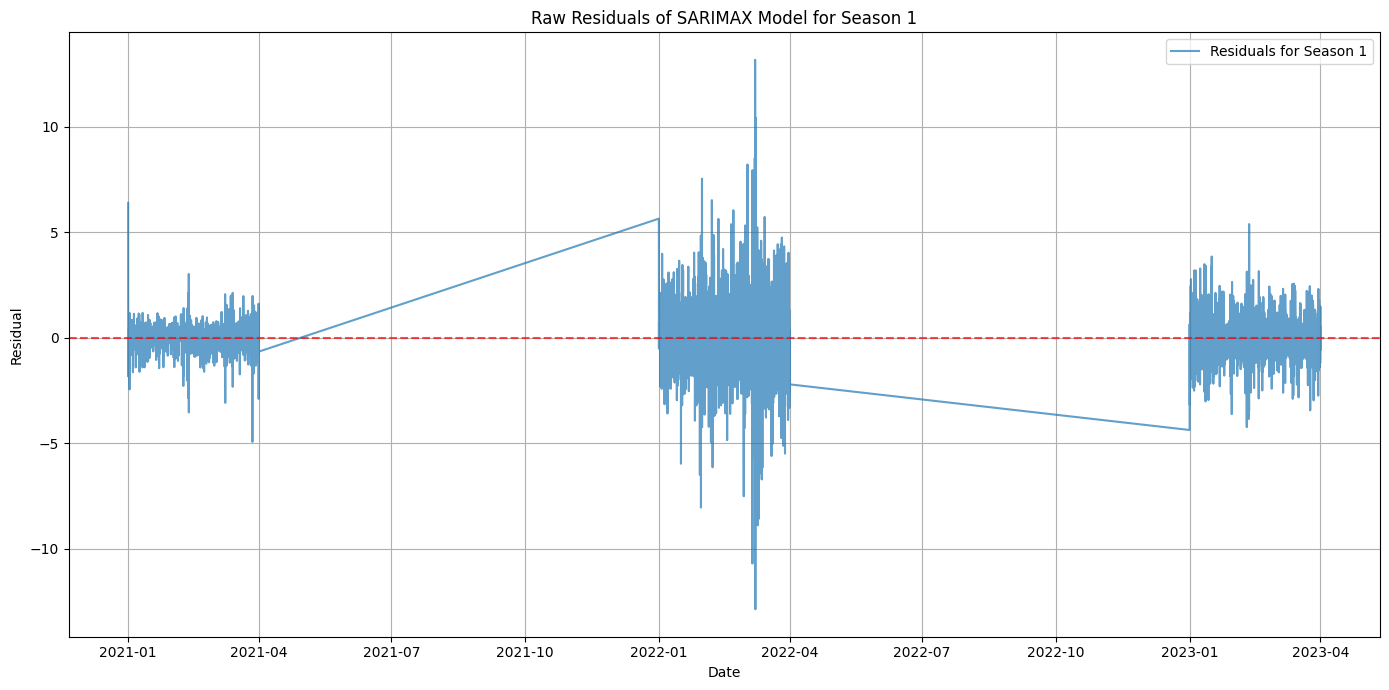


--- Full Residual Diagnostics for Season 1 ---


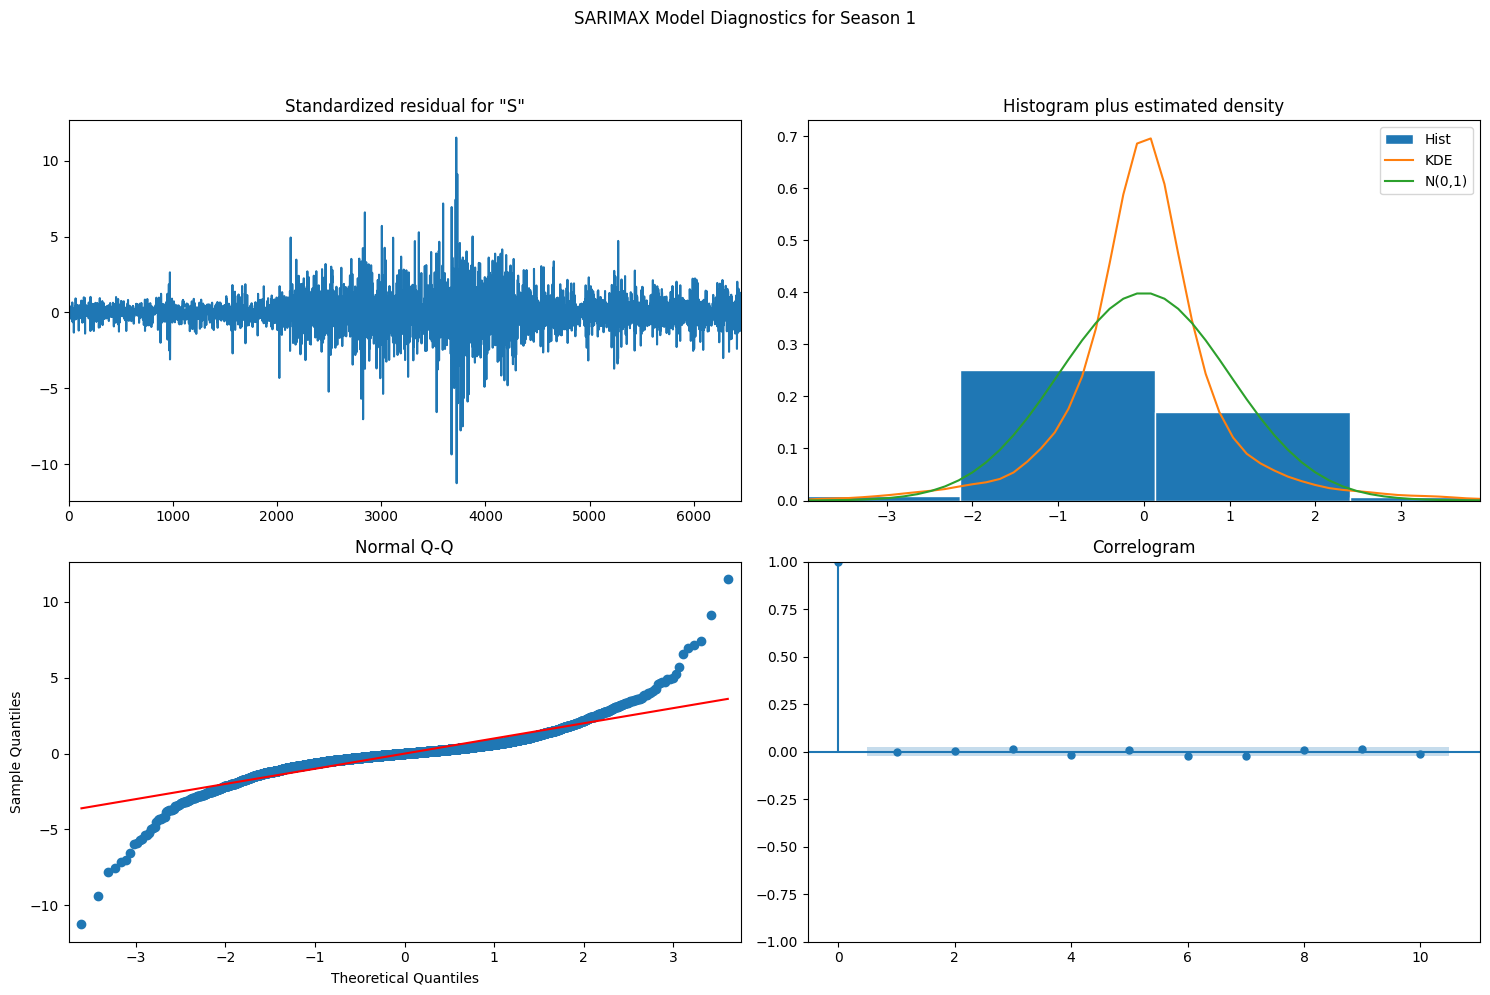

The diagnostic plots include: Standardized Residuals, Histogram with KDE, Normal Q-Q plot, and Correlogram (ACF).

--- Ljung-Box Test on Residuals (Formal Test Table) ---
       lb_stat     lb_pvalue
24  221.470072  6.907682e-34
48  353.268357  4.160503e-48
72  417.579270  3.789506e-50
  At lag 24: p-value 0.000 < 0.05. Reject H0. Residuals are NOT white noise (significant autocorrelation).
  At lag 48: p-value 0.000 < 0.05. Reject H0. Residuals are NOT white noise (significant autocorrelation).
  At lag 72: p-value 0.000 < 0.05. Reject H0. Residuals are NOT white noise (significant autocorrelation).

--- Jarque-Bera Test on Residuals for Normality (Formal Test Values) ---
  Jarque-Bera Statistic: 56779.429
  Chi^2 p-value: 0.000
  Skewness: -0.096
  Kurtosis: 17.500
  p-value < 0.05. Reject H0. Residuals are NOT normally distributed.

--- End of Residual Analysis Script ---


In [6]:
import joblib
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Load the saved models and scalers ---
try:
    fitted_seasonal_models = joblib.load('fitted_seasonal_models.joblib')
    seasonal_exog_scalers = joblib.load('seasonal_exog_scalers.joblib')
    best_orders_per_season = joblib.load('best_orders_per_season.joblib')
    print("Successfully loaded fitted seasonal models, scalers, and best orders.")
except FileNotFoundError:
    print("Error: One or more .joblib files not found. Make sure 'fitted_seasonal_models.joblib', 'seasonal_exog_scalers.joblib', and 'best_orders_per_season.joblib' are in the same directory.")
    exit()
except Exception as e:
    print(f"Error loading joblib files: {e}")
    exit()

# --- Choose a season to analyze ---
while True:
    try:
        season_to_analyze = int(input("Enter the season number (1-4) for which you want to perform tests: "))
        if 1 <= season_to_analyze <= 4:
            break
        else:
            print("Invalid season number. Please enter a number between 1 and 4.")
    except ValueError:
        print("Invalid input. Please enter an integer.")

# --- Perform tests for the selected season ---
if season_to_analyze in fitted_seasonal_models and fitted_seasonal_models[season_to_analyze] is not None:
    model_fit = fitted_seasonal_models[season_to_analyze]
    arima_order = best_orders_per_season[season_to_analyze]['arima']
    seasonal_order = best_orders_per_season[season_to_analyze]['seasonal']

    print(f"\n--- Analyzing Model for Season {season_to_analyze} ---")
    print(f"Model Order: ARIMA{arima_order} x Seasonal{seasonal_order}")

    # Get the residuals from the fitted model
    residuals = model_fit.resid

    if residuals.empty:
        print(f"No residuals available for Season {season_to_analyze}. Cannot perform tests.")
    else:
        print("\n--- Residuals Statistics ---")
        print(residuals.describe())

        # Plot raw residuals over time
        plt.figure(figsize=(14, 7))
        plt.plot(residuals.index, residuals, label=f'Residuals for Season {season_to_analyze}', alpha=0.7)
        plt.axhline(0, color='red', linestyle='--', alpha=0.7)
        plt.title(f'Raw Residuals of SARIMAX Model for Season {season_to_analyze}')
        plt.xlabel('Date')
        plt.ylabel('Residual')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # --- Plotting full diagnostics using model_fit.plot_diagnostics() ---
        # This will generate:
        # 1. Standardized Residuals over time
        # 2. Histogram plus estimated density (KDE and Normal Distribution)
        # 3. Normal Q-Q plot
        # 4. Correlogram (ACF plot)
        print(f"\n--- Full Residual Diagnostics for Season {season_to_analyze} ---")
        fig = model_fit.plot_diagnostics(figsize=(15, 10))
        fig.suptitle(f'SARIMAX Model Diagnostics for Season {season_to_analyze}', y=1.02) # Add a main title
        plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent title overlap
        plt.show()
        print("The diagnostic plots include: Standardized Residuals, Histogram with KDE, Normal Q-Q plot, and Correlogram (ACF).")


        # --- Ljung-Box Test on Residuals (Table Output) ---
        print("\n--- Ljung-Box Test on Residuals (Formal Test Table) ---")
        # Determine appropriate lags for Ljung-Box test
        m_period = seasonal_order[3] if seasonal_order and len(seasonal_order) == 4 else 1 # Default m to 1 if not seasonal
        
        ljung_box_lags_to_test = []
        if m_period > 0:
            for i in range(1, 4): # Check up to 3 seasonal multiples
                if i * m_period <= len(residuals) / 2 and i * m_period <= 100: # Max lag usually n/2 or 100
                    ljung_box_lags_to_test.append(i * m_period)
        if not ljung_box_lags_to_test: # If m_period is 0 or small, use some default lags
            ljung_box_lags_to_test = [10, 20, 30]
            ljung_box_lags_to_test = [lag for lag in ljung_box_lags_to_test if lag <= len(residuals) / 2 and lag <= 100]

        if ljung_box_lags_to_test:
            try:
                lb_test_results = sm.stats.acorr_ljungbox(residuals, lags=ljung_box_lags_to_test, return_df=True)
                print(lb_test_results)
                for lag in ljung_box_lags_to_test:
                    p_value = lb_test_results.loc[lag, 'lb_pvalue']
                    if p_value < 0.05:
                        print(f"  At lag {lag}: p-value {p_value:.3f} < 0.05. Reject H0. Residuals are NOT white noise (significant autocorrelation).")
                    else:
                        print(f"  At lag {lag}: p-value {p_value:.3f} >= 0.05. Fail to reject H0. Residuals are likely white noise (no significant autocorrelation).")
            except ValueError as e:
                print(f"Could not perform Ljung-Box test (likely not enough data points relative to lags or constant residuals): {e}")
            except IndexError:
                print("Ljung-Box test failed: Lags specified might be too high for the number of residuals, or data issues.")
        else:
            print("No suitable lags to perform Ljung-Box test.")


        # --- Jarque-Bera Test on Residuals for Normality ---
        print("\n--- Jarque-Bera Test on Residuals for Normality (Formal Test Values) ---")
        if len(residuals) > 0 and residuals.std() > 0: # Ensure there's variance for JB test
            jb_test_results = sm.stats.jarque_bera(residuals)
            jb_labels = ['Jarque-Bera Statistic', 'Chi^2 p-value', 'Skewness', 'Kurtosis']
            # Note: The output structure of jarque_bera is (statistic, pvalue, skewness, kurtosis)
            print(f"  {jb_labels[0]}: {jb_test_results[0]:.3f}")
            print(f"  {jb_labels[1]}: {jb_test_results[1]:.3f}")
            print(f"  {jb_labels[2]}: {jb_test_results[2]:.3f}")
            print(f"  {jb_labels[3]}: {jb_test_results[3]:.3f}")

            if jb_test_results[1] < 0.05: # Use the p-value at index 1
                print("  p-value < 0.05. Reject H0. Residuals are NOT normally distributed.")
            else:
                print("  p-value >= 0.05. Fail to reject H0. Residuals are likely normally distributed.")
        else:
            print("Not enough data or no variance in residuals to perform Jarque-Bera test.")

else:
    print(f"No fitted model found for Season {season_to_analyze} or the model is None. Cannot perform tests.")

print("\n--- End of Residual Analysis Script ---")

In [7]:
import joblib

# Define the filenames from your configuration
models_file = 'fitted_seasonal_models.joblib'
exog_cols = [
    'Gas price', 'EU Carbon price', 'Wind onshore [MWh]', 'Photovoltaics [MWh]',
    'Grid load [MWh]', 'Residual load [MWh]',
    'Wind onshore installed [MW]', 'Photovoltaics installed [MW]'
]

print("--- Extracting Model Coefficients ---")

try:
    # Load the dictionary of fitted models
    fitted_models = joblib.load(models_file)

    # Loop through each seasonal model to inspect its parameters
    for season, model in fitted_models.items():
        print(f"\n--- Equation for Season {season} ---")
        
        # model.params contains all coefficients (for exogenous, AR, MA terms)
        params = model.params
        
        # Print the coefficient for each exogenous variable
        print("Coefficients for Exogenous Variables:")
        for col in exog_cols:
            if col in params:
                # The ':.4f' formats the number to 4 decimal places
                print(f"  - {col}: {params[col]:.4f}")
        
        # Print the intercept (constant term)
        if 'const' in params:
            print(f"  - Intercept (const): {params['const']:.4f}")
            
        print("-" * 20)

except FileNotFoundError:
    print(f"Error: Could not find the model file '{models_file}'. Please ensure it's in the correct directory.")

--- Extracting Model Coefficients ---

--- Equation for Season 1 ---
Coefficients for Exogenous Variables:
  - Gas price: 1.1820
  - Wind onshore [MWh]: -3.0613
  - Photovoltaics [MWh]: -1.8565
  - Grid load [MWh]: 2.6247
--------------------

--- Equation for Season 2 ---
Coefficients for Exogenous Variables:
  - Gas price: -0.0063
  - Wind onshore [MWh]: -2.3175
  - Photovoltaics [MWh]: -3.4693
  - Grid load [MWh]: 2.6723
--------------------

--- Equation for Season 3 ---
Coefficients for Exogenous Variables:
  - Gas price: 5.0587
  - Wind onshore [MWh]: -2.5315
  - Photovoltaics [MWh]: -5.3310
  - Grid load [MWh]: 4.7339
--------------------

--- Equation for Season 4 ---
Coefficients for Exogenous Variables:
  - Gas price: 0.5151
  - Wind onshore [MWh]: -5.2694
  - Photovoltaics [MWh]: -2.8578
  - Grid load [MWh]: 5.2916
--------------------


import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from sklearn.preprocessing import StandardScaler
import sys
import os
import joblib
from tqdm.auto import tqdm
import seaborn as sns
import statsmodels.api as sm

warnings.filterwarnings("ignore")

 --- Configuration for Part 2 ---
CONFIG_PART2 = {
    "target_variable": 'Spot market price(cents/kWh)',
    "exog_cols": [
        'Gas price', 'Wind onshore [MWh]', 'Photovoltaics [MWh]',
        'Grid load [MWh]', 'Residual load [MWh]',
        'Wind onshore installed [MW]', 'Photovoltaics installed [MW]'
    ],
    "historical_data_file": './Spot Price_less variables_Hourly_Data.csv',
    "models_file": 'fitted_seasonal_models.joblib',
    "scalers_file": 'seasonal_exog_scalers.joblib',
    "best_orders_file": 'best_orders_per_season.joblib',

    "output_price_forecast_excel": "spot_price_forecasts_hourly_2025_2045_p2_v32.xlsx",
    "output_exog_excel_file": "generated_future_exogenous_variables_p2_v32.xlsx",

    # REVISED: Replaced multiple plot flags with a single flag for a consolidated report
    "generate_summary_report": True,
    "seasonal_profile_plot_year": 2026,
    
    "RENEWABLE_PENETRATION_TARGETS_ANNUAL": {
         2025: 0.55, 2030: 0.65, 2035: 0.80, 2040: 0.85, 2045: 0.95
    },
    "PV_TO_WIND_CAPACITY_INSTALL_RATIO": 1.0,
    # MODIFIED: Increased planning CFs to ensure a smoother visual start for MWh generation
    # Increased AVG_CF_PV_PLANNING and AVG_CF_WIND_PLANNING slightly for higher overall generation
    "AVG_CF_PV_PLANNING": 0.11, 
    "AVG_CF_WIND_PLANNING": 0.21, 

    "apply_price_floor": True,
    "price_floor_value_cents_kwh": -30.0,
}

# --- SCENARIO_DATA_TABLE ---
SCENARIO_DATA_TABLE = {
    "2025-2030": {
        "Optimistic":   {"Grid load [MWh]": 68500, "Gas price [€/MWh]": 35},
        "Base Case":    {"Grid load [MWh]": 75000, "Gas price [€/MWh]": 45},
        "Pessimistic":  {"Grid load [MWh]": 80000, "Gas price [€/MWh]": 75}
    },
    "2030-2035": {
        "Optimistic":   {"Grid load [MWh]": 80000, "Gas price [€/MWh]": 40},
        "Base Case":    {"Grid load [MWh]": 85000, "Gas price [€/MWh]": 55},
        "Pessimistic":  {"Grid load [MWh]": 91500, "Gas price [€/MWh]": 85}
    },
    "2035-2040": {
        "Optimistic":   {"Grid load [MWh]": 89000, "Gas price [€/MWh]": 45},
        "Base Case":    {"Grid load [MWh]": 95000, "Gas price [€/MWh]": 65},
        "Pessimistic":  {"Grid load [MWh]": 102500, "Gas price [€/MWh]": 100}
    },
    "2040-2045": {
        "Optimistic":   {"Grid load [MWh]": 97000, "Gas price [€/MWh]": 50},
        "Base Case":    {"Grid load [MWh]": 105000, "Gas price [€/MWh]": 75},
        "Pessimistic":  {"Grid load [MWh]": 125000, "Gas price [€/MWh]": 120}
    }
}
# --- Helper Functions ---


def learn_all_historical_profiles(df_hist):
    """
    Learns detailed MONTHLY historical profiles for PV, Wind, and Load.
    This function calculates the capacity factors (CF) for Photovoltaics (PV)
    and Wind based on historical generation and installed capacity.
    It also learns the hourly load profile, normalized by the daily mean,
    for each month and day of the week.
    """
    print("\n--- Learning Historical Profiles ---")
    profiles = {}
    
    # PV Profiles: Calculate hourly capacity factor per month
    pv_data = df_hist[['Photovoltaics [MWh]', 'Photovoltaics installed [MW]']].copy()
    print(f"Columns in pv_data after subsetting: {pv_data.columns.tolist()}")
    pv_data = pv_data[pv_data['Photovoltaics installed [MW]'] > 1e-3]
    pv_data['CF'] = (pv_data['Photovoltaics [MWh]'] / pv_data['Photovoltaics installed [MW]']).clip(0, 1)
    profiles['pv_profile'] = {m: g.groupby(g.index.hour)['CF'].mean() for m, g in pv_data.groupby(pv_data.index.month)}
    
    # Wind Profiles: Calculate hourly capacity factor per month
    wind_data = df_hist[['Wind onshore [MWh]', 'Wind onshore installed [MW]']].copy()
    print(f"Columns in wind_data after subsetting: {wind_data.columns.tolist()}")
    wind_data = wind_data[wind_data['Wind onshore installed [MW]'] > 1e-3]
    wind_data['CF'] = (wind_data['Wind onshore [MWh]'] / wind_data['Wind onshore installed [MW]']).clip(0, 1)
    profiles['wind_profile'] = {m: g.groupby(g.index.hour)['CF'].mean() for m, g in wind_data.groupby(wind_data.index.month)}

    # Load Profile: Learn normalized hourly load profile per month and day of week
    load_data = df_hist['Grid load [MWh]'].copy()
    load_profiles_raw = load_data.groupby([load_data.index.month, load_data.index.dayofweek, load_data.index.hour]).mean()
    profiles['load_profile'] = {}
    
    # MODIFIED LINE: Use a list to store all maximum factors encountered
    all_max_factors = [] 

    for month in range(1, 13):
        profiles['load_profile'][month] = {}
        for dow in range(7): # Day of week (0=Monday, 6=Sunday)
            try:
                profile_slice = load_profiles_raw.loc[month, dow]
                normalized_profile = profile_slice / profile_slice.mean() if profile_slice.mean() > 1e-6 else pd.Series(1.0, index=range(24))
                profiles['load_profile'][month][dow] = normalized_profile
                
                # ADDED LINE: Append the maximum of this individual normalized profile to our list
                all_max_factors.append(normalized_profile.max())

                

            except KeyError:
                profiles['load_profile'][month][dow] = pd.Series(1.0, index=range(24))
                # ADDED LINE: Append 1.0 (from fallback) to the list
                all_max_factors.append(1.0)
    
    # MODIFIED LINE: Calculate the final max_load_factor from the collected list
    calculated_max_load_factor = max(all_max_factors) if all_max_factors else 1.0
    
    print("Historical profiles learned.")
    # MODIFIED LINE: Simplify the return, as calculated_max_load_factor should now be correct
    return profiles, calculated_max_load_factor
def calculate_required_renewable_capacities_for_target_year(target_year, avg_hourly_grid_load_mwh, penetration_targets_annual, pv_wind_install_ratio, avg_cf_pv, avg_cf_wind, current_pv_mw, current_wind_mw):
    """
    Calculates required PV and Wind capacity to meet renewable penetration targets for a target year.
    It interpolates the renewable penetration target for the given year.
    Then, it calculates the shortfall in renewable energy generation based on existing capacity
    and determines the new PV and Wind capacity needed to cover this shortfall,
    maintaining a specified PV to Wind installation ratio.
    """
    # Interpolate the renewable penetration target for the specific target_year
    target_years = sorted(penetration_targets_annual.keys())
    targets = [penetration_targets_annual[year] for year in target_years]
    penetration_target = np.interp(target_year, target_years, targets)
    
    # Calculate the total required renewable energy (MWh) for the target year
    required_re_MWh = (avg_hourly_grid_load_mwh * 8760) * penetration_target # 8760 hours in a year
    
    # Calculate the existing renewable energy generation from current capacities
    existing_re_MWh = (current_pv_mw * avg_cf_pv + current_wind_mw * avg_cf_wind) * 8760
    
    # Determine the shortfall in renewable energy generation
    shortfall_MWh = max(0, required_re_MWh - existing_re_MWh)
    
    # If no shortfall, return current capacities
    if shortfall_MWh == 0:
        return {'Wind onshore installed [MW]': current_wind_mw, 'Photovoltaics installed [MW]': current_pv_mw}
    
    # Calculate the energy generated per unit of new combined PV and Wind capacity (based on ratio)
    energy_per_unit_of_new_build = (pv_wind_install_ratio * avg_cf_pv + avg_cf_wind) * 8760
    
    # Avoid division by zero
    if energy_per_unit_of_new_build < 1e-6:
        return {'Wind onshore installed [MW]': current_wind_mw, 'Photovoltaics installed [MW]': current_pv_mw}
    
    # Calculate the new wind capacity needed to cover the shortfall
    new_wind_mw = shortfall_MWh / energy_per_unit_of_new_build
    # Calculate the new PV capacity based on the installation ratio
    new_pv_mw = new_wind_mw * pv_wind_install_ratio
    
    # Return the total required capacities (current + new)
    return {'Wind onshore installed [MW]': current_wind_mw + new_wind_mw, 'Photovoltaics installed [MW]': current_pv_mw + new_pv_mw}

def load_and_validate_data_objects(app_config):
    """
    Loads historical data from a CSV file and pre-trained model objects (SARIMAX models, scalers,
    and best orders) from joblib files.
    Performs basic validation to ensure files exist and can be loaded.
    """
    print("--- Loading Data and Saved Objects ---")
    try:
        # Load historical data
        df_loaded = pd.read_csv(app_config['historical_data_file'], index_col='Date', parse_dates=True)
        # Handle potential duplicate indices and sort
        df_loaded = df_loaded[~df_loaded.index.duplicated(keep='first')].sort_index()
        
        # --- DEBUGGING: Print columns to check for KeyError ---
        print(f"Columns in loaded historical data: {df_loaded.columns.tolist()}")
        # --- END DEBUGGING ---

        # Load pre-trained models, scalers, and best orders
        models_loaded = joblib.load(app_config['models_file'])
        scalers_loaded = joblib.load(app_config['scalers_file'])
        joblib.load(app_config['best_orders_file']) # Load to ensure it exists, but not used directly here
        
        print("All data and objects loaded successfully.")
        return df_loaded, models_loaded, scalers_loaded, app_config['target_variable'], app_config['exog_cols']
    except FileNotFoundError as e:
        sys.exit(f"FATAL ERROR: Required file not found - {e}. Please ensure all data and model files are in the correct directory.")
    except Exception as e:
        sys.exit(f"FATAL ERROR during data loading or object deserialization: {e}")

def generate_hourly_exog_for_period_simple(period_dates, scenario_data_period_block, exog_cols_config_list, historical_profiles, prev_period_avg_data, prev_block_end_capacities, app_config):
    """
    Generates hourly exogenous variables for a specific future period based on scenario data
    and learned historical profiles.
    This function simulates future values for gas price, grid load, PV generation,
    wind generation, and residual load, incorporating stochasticity for renewables.
    """
    df_temp = pd.DataFrame(index=period_dates)
    df_temp['year'] = df_temp.index.year
    num_years = df_temp['year'].nunique()
    
    def get_targets_ramp(start_val, end_val):
        """Helper to create a linear ramp for yearly targets."""
        if num_years == 0: return []
        return np.linspace(start_val, end_val, num_years + 1)[:-1]

    # Calculate yearly targets for installed capacities, gas price, and grid load
    yearly_targets = {
        'Photovoltaics installed [MW]': get_targets_ramp(prev_block_end_capacities['Photovoltaics installed [MW]'], scenario_data_period_block['Photovoltaics installed [MW]']),
        'Wind onshore installed [MW]': get_targets_ramp(prev_block_end_capacities['Wind onshore installed [MW]'], scenario_data_period_block['Wind onshore installed [MW]']),
        'Gas price': get_targets_ramp(prev_period_avg_data['Gas price'], scenario_data_period_block['Gas price [€/MWh]']),
        'Grid load [MWh]_target': get_targets_ramp(prev_period_avg_data['Grid load [MWh]'], scenario_data_period_block['Grid load [MWh]'])
    }
    
    # Apply yearly targets to the temporary DataFrame
    for col, targets in yearly_targets.items():
        if len(targets) > 0:
            year_map = dict(zip(sorted(df_temp['year'].unique()), targets))
            df_temp[col] = df_temp['year'].map(year_map)

    # Generate hourly Grid Load based on historical profiles and yearly target
    df_temp['Grid load [MWh]'] = [historical_profiles['load_profile'][ts.month][ts.dayofweek][ts.hour] for ts in df_temp.index] * df_temp['Grid load [MWh]_target']
    df_temp['Grid load [MWh]'] = df_temp['Grid load [MWh]'].clip(lower=0)

    # Add daily stochasticity for PV and Wind generation
    # Create a DataFrame for stochastic factors indexed by date (normalized to remove time)
    # INCREASED STOCHASTICITY STANDARD DEVIATION HERE
    stochasticity = pd.DataFrame({
        'pv_factor': np.random.normal(1.0, 0.25, len(df_temp.index.normalize().unique())), # Was 0.15
        'wind_factor': np.random.normal(1.0, 0.35, len(df_temp.index.normalize().unique())) # Was 0.25
    }, index=df_temp.index.normalize().unique())
    df_temp = df_temp.join(stochasticity, on=df_temp.index.normalize())
    
    # Calculate potential PV and Wind generation using historical CF profiles and stochasticity
    df_temp['potential_pv'] = [historical_profiles['pv_profile'][ts.month].get(ts.hour, 0.0) for ts in df_temp.index] * df_temp['Photovoltaics installed [MW]'] * df_temp['pv_factor']
    df_temp['potential_wind'] = [historical_profiles['wind_profile'][ts.month].get(ts.hour, 0.0) for ts in df_temp.index] * df_temp['Wind onshore installed [MW]'] * df_temp['wind_factor']
    
    # Clip renewable generation to ensure it's non-negative and doesn't exceed installed capacity
    df_temp['potential_pv'] = df_temp['potential_pv'].clip(lower=0, upper=df_temp['Photovoltaics installed [MW]'])
    df_temp['potential_wind'] = df_temp['potential_wind'].clip(lower=0, upper=df_temp['Wind onshore installed [MW]'])

    # --- NEW: Continuously interpolated renewable penetration target ---
    # Create target timestamps (e.g., 2025-01-01, 2030-01-01, etc.)
    target_years = sorted(list(app_config["RENEWABLE_PENETRATION_TARGETS_ANNUAL"].keys()))
    target_timestamps = [pd.Timestamp(f'{year}-01-01') for year in target_years]
    target_values = [app_config["RENEWABLE_PENETRATION_TARGETS_ANNUAL"][year] for year in target_years]

    # Convert timestamps to numbers for interpolation
    x_points = [ts.value for ts in target_timestamps]
    # Get the numerical value of every single hour in the forecast
    x_to_interp = df_temp.index.astype(np.int64)

    # Interpolate the penetration target for each hour
    df_temp['re_penetration_target'] = np.interp(x_to_interp, x_points, target_values)

    # Apply the new smoothly ramped target
    df_temp['potential_total_re'] = df_temp['potential_pv'] + df_temp['potential_wind']
    df_temp['max_re_gen_allowed'] = df_temp['Grid load [MWh]'] * df_temp['re_penetration_target']
# --- END NEW ---
    # Scale down renewable generation if it exceeds the penetration target
    scaling_factor = (df_temp['max_re_gen_allowed'] / df_temp['potential_total_re']).clip(upper=1.0).fillna(1.0)
    df_temp['Photovoltaics [MWh]'] = (df_temp['potential_pv'] * scaling_factor).clip(lower=0).where(df_temp.index.hour.isin(range(5, 21)), 0) # PV only during daylight hours
    df_temp['Wind onshore [MWh]'] = (df_temp['potential_wind'] * scaling_factor).clip(lower=0)
    
    # Calculate Residual Load
    df_temp['Residual load [MWh]'] = (df_temp['Grid load [MWh]'] - df_temp['Photovoltaics [MWh]'] - df_temp['Wind onshore [MWh]']).clip(lower=0)
    
    # Return only the required exogenous columns
    return df_temp[[col for col in exog_cols_config_list if col in df_temp.columns]]

def forecast_seasonal_sarimax_simple(fitted_models, historical_df, scenario_table_input, exog_cols_list, seasonal_scalers, app_config, historical_profiles):
    """
    Orchestrates seasonal SARIMAX forecasting for multiple scenarios.
    This function iterates through defined scenarios, generates future exogenous variables
    for each period within the scenario, and then uses pre-trained seasonal SARIMAX models
    to forecast spot prices.
    """
    all_forecasts, all_generated_exogs = {}, {}
    last_hist_date = historical_df.index.max()
    # Define the full future index for forecasting
    future_idx = pd.date_range(start=last_hist_date + pd.Timedelta(hours=1), end="2045-12-31 23:00:00", freq="H")
    
    # Get the last historical values for ramping
    last_hist_vals = {
        'Photovoltaics installed [MW]': historical_df['Photovoltaics installed [MW]'].iloc[-1],
        'Wind onshore installed [MW]': historical_df['Wind onshore installed [MW]'].iloc[-1],
        'Gas price': historical_df['Gas price'].iloc[-1],
        'Grid load [MWh]': historical_df['Grid load [MWh]'].mean() # Using mean for load as a starting point for future avg load
    }

    # Iterate through each scenario (Optimistic, Base Case, Pessimistic)
    for scenario in ["Optimistic", "Base Case", "Pessimistic"]:
        print(f"\n--- Forecasting for scenario: {scenario} ---")
        current_caps = last_hist_vals.copy() # Initialize capacities for the start of the first period
        current_avgs = last_hist_vals.copy() # Initialize averages for the start of the first period
        exog_parts = [] # To store exogenous data for each period within the scenario
        
        # Iterate through each defined period (e.g., "2025-2030") within the scenario table
        for period, data in tqdm(sorted(scenario_table_input.items()), desc=f"Periods for {scenario}"):
            start_yr, end_yr = map(int, period.split('-'))
            # Filter the future index for the current period's dates
            period_dates = future_idx[(future_idx.year >= start_yr) & (future_idx.year <= end_yr)]
            if period_dates.empty: continue

            # Calculate target renewable capacities for the end of the current period
            target_caps = calculate_required_renewable_capacities_for_target_year(
                end_yr, data[scenario]['Grid load [MWh]'], app_config["RENEWABLE_PENETRATION_TARGETS_ANNUAL"], 
                app_config["PV_TO_WIND_CAPACITY_INSTALL_RATIO"], app_config["AVG_CF_PV_PLANNING"], 
                app_config["AVG_CF_WIND_PLANNING"], current_caps['Photovoltaics installed [MW]'], 
                current_caps['Wind onshore installed [MW]']
            )
            
            # Generate hourly exogenous variables for the current period
            exog_df = generate_hourly_exog_for_period_simple(
                period_dates, {**data[scenario], **target_caps}, exog_cols_list, 
                historical_profiles, current_avgs, current_caps, app_config
            )
            exog_parts.append(exog_df)
            
            # Update current capacities and averages for the next period's ramp calculation
            current_caps.update(exog_df[['Photovoltaics installed [MW]', 'Wind onshore installed [MW]']].iloc[-1].to_dict())
            current_avgs.update({'Gas price': exog_df['Gas price'].iloc[-1], 'Grid load [MWh]': exog_df['Grid load [MWh]'].mean()})
            
        # Concatenate all generated exogenous data for the current scenario
        full_exog_df = pd.concat(exog_parts).sort_index()
        all_generated_exogs[scenario] = full_exog_df
        
        fc_parts = [] # To store forecast parts for each season
        # Iterate through seasons to apply seasonal SARIMAX models
        for season_num, months in {1:[12,1,2], 2:[3,4,5], 3:[6,7,8], 4:[9,10,11]}.items():
            model, scaler = fitted_models.get(season_num), seasonal_scalers.get(season_num)
            if not model: continue # Skip if no model for this season
            
            # Filter exogenous data for the current season's months
            exog_to_fc = full_exog_df[full_exog_df.index.month.isin(months)].copy()
            if exog_to_fc.empty: continue

            # Scale exogenous variables if a scaler exists for the season
            if scaler:
                # Ensure only columns used by the scaler are transformed
                cols_to_scale = [c for c in getattr(scaler, 'feature_names_in_', []) if c in exog_to_fc.columns]
                if cols_to_scale:
                    exog_to_fc[cols_to_scale] = scaler.transform(exog_to_fc[cols_to_scale])
            
            # Select only the exogenous columns that the model was trained with
            model_exog_names = model.model.exog_names
            exog_for_model = exog_to_fc[[col for col in model_exog_names if col in exog_to_fc.columns]]
            
            # Perform the forecast
            fc = model.forecast(steps=len(exog_for_model), exog=exog_for_model)
            fc.index = exog_to_fc.index # Assign the correct index to the forecast
            fc_parts.append(fc)
            
        # Concatenate seasonal forecasts and apply price floor
        final_fc = pd.concat(fc_parts).sort_index().clip(lower=app_config.get("price_floor_value_cents_kwh"))
        all_forecasts[scenario] = final_fc
    return all_forecasts, all_generated_exogs

# --- REVISED: Consolidated Reporting and Plotting ---
def generate_summary_report(price_forecasts, generated_exog_data, df_hist, target_variable, config):
    """
    Generates a consolidated report with the most important plots for the forecasting results.
    Includes:
    1. Main Price Forecast (Historical vs. Forecasted with dual Y-axis)
    2. Forecast-Only Plot
    3. Expanded Exogenous Variables (Historical vs. Generated)
    4. Grouped and Stacked Negative Price Hours by Season and Scenario
    5. Seasonal Energy Profiles (Generation, Consumption, Residual Load, Price)
    6. Correlation Heatmaps (Historical vs. Forecasted)
    """
    print("\n--- Generating Summary Report ---")

    # Plot 1: Main Price Forecast with Dual Y-axis (Historical vs. Forecast)
    fig, ax1 = plt.subplots(figsize=(18, 9))
    # Plot historical data on the first Y-axis
    hist_slice = df_hist[target_variable].loc['2022-01-01':]
    ax1.plot(hist_slice.index, hist_slice, label='Historical Actual', color='gray', alpha=0.8)
    ax1.set_xlabel("Date", fontsize=12)
    ax1.set_ylabel("Historical Price (cents/kWh)", fontsize=12, color='gray')
    ax1.tick_params(axis='y', labelcolor='gray')
    
    ax2 = ax1.twinx() # Create a second Y-axis sharing the same X-axis
    # Plot forecasted data on the second Y-axis
    for scenario, forecasts in price_forecasts.items():
        ax2.plot(forecasts.index, forecasts, label=f'Forecast ({scenario})', alpha=0.8)
    
    # CORRECTED: Align the zero points of the two axes for better comparison
    b1, t1 = ax1.get_ylim() # Get historical Y-axis limits
    b2, t2 = -30, 70  # Desired forecast Y-axis limits (can be adjusted)
    ax2.set_ylim(b2, t2) # Set forecast Y-axis limits
    
    # Adjust historical Y-axis limits to align zero if it crosses zero
    if b1 * t1 < 0: # Check if historical y-axis crosses zero
        ratio = abs(b2 / t2) # Ratio of negative to positive range for forecast
        if abs(b1 / t1) > ratio: # If historical negative range is proportionally larger
            ax1.set_ylim(b1, abs(b1 / ratio)) # Extend positive range of historical axis
        else: # If historical positive range is proportionally larger
            ax1.set_ylim(-abs(t1 * ratio), t1) # Extend negative range of historical axis

    fig.suptitle("Spot Price Forecasts (2025-2045)", fontsize=16)
    fig.legend(loc="upper right", bbox_to_anchor=(0.9, 0.9)) # Consolidated legend
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

    # Plot 1b: Forecast-Only Plot (for clearer view of future trends)
    plt.figure(figsize=(18, 9))
    for scenario, forecasts in price_forecasts.items():
        plt.plot(forecasts.index, forecasts, label=f'Forecast ({scenario})', alpha=0.8)
    plt.title("Spot Price Forecasts Only (2025-2045)", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel(target_variable, fontsize=12)
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

    # Plot 2: Expanded Exogenous Variables (3x2 Grid) - Historical vs. Generated
    fig, axes = plt.subplots(3, 2, figsize=(18, 16))
    fig.suptitle('Historical vs. Generated Exogenous Variables', fontsize=18)
    
    # Define which variables go into which subplot
    plot_map = {
        (0, 0): ['Wind onshore [MWh]'],
        (0, 1): ['Photovoltaics [MWh]'],
        (1, 0): ['Grid load [MWh]'],
        (1, 1): ['Residual load [MWh]'],
        (2, 0): ['Gas price'],
        (2, 1): ['Wind onshore installed [MW]', 'Photovoltaics installed [MW]'] # Combine installed capacities
    }

    for (row, col), variables in plot_map.items():
        ax = axes[row, col]
        for var in variables:
            # Plot historical data if available
            if var in df_hist.columns:
                df_hist[var].loc['2022-01-01':].plot(ax=ax, label=f'Hist {var.split(" ")[0]}', alpha=0.7, color='gray' if len(variables) > 1 else None)
            # Plot generated data for each scenario
            for scenario, exog_df in generated_exog_data.items():
                if var in exog_df.columns:
                    exog_df[var].plot(ax=ax, label=f'{scenario.split(" ")[0]} {var.split(" ")[0]}', alpha=0.7)
        ax.set_title(' & '.join(variables)) # Set subplot title
        ax.legend()
        ax.grid(True, linestyle='--', linewidth=0.5)
        # --- Specific Y-axis limit for Gas price plot ---
        if variables == ['Gas price']:
            # Set a fixed y-limit that better shows the forecasted gas price range
            ax.set_ylim(0, 120) # Adjust this range as needed based on your scenario table targets
        # --- End specific Y-axis limit ---
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
    plt.show()

    # Plot 3: Grouped and Stacked Negative Price Hours by Season and Scenario
       # Plot 3: Grouped and Stacked Negative Price Hours by Season and Scenario
    # This section is configured to produce a single plot with grouped bars per scenario, stacked by season.
    print("\n--- Plotting Forecasted Negative Price Hours by Season and Scenario ---")
    # Define season mapping and order for consistent plotting
    season_map = {m: 'Winter' if m in [12, 1, 2] else 'Spring' if m in [3, 4, 5] else 'Summer' if m in [6, 7, 8] else 'Fall' for m in range(1, 13)}
    season_order = ['Spring', 'Summer', 'Fall', 'Winter']
    # Define colors for each season
    colors = {'Spring': '#ff7f0e', 'Summer': '#2ca02c', 'Fall': '#d62728', 'Winter': '#1f77b4'}
    
    all_counts = []
    # Process each scenario's price forecasts
    for scenario, prices in price_forecasts.items():
        # Filter for negative prices
        negative_prices = prices[prices < 0].to_frame(name='price')
        
        # REMOVED DEBUG PRINT: Debug prints related to negative_prices were removed from here.

        if not negative_prices.empty:
            negative_prices['year'] = negative_prices.index.year
            negative_prices['season'] = negative_prices.index.month.map(season_map)
            # Count negative hours per year and season
            counts = negative_prices.groupby(['year', 'season']).size().reset_index(name='hours')
            counts['scenario'] = scenario
            all_counts.append(counts)

    # REMOVED DEBUG PRINT: Debug prints related to all_counts were removed from here.

    if not all_counts:
        print("No negative prices found in any scenario to plot.")
    else:
        df_counts = pd.concat(all_counts)
        # REMOVED DEBUG PRINT: Debug prints related to df_counts were removed from here.

        # Pivot table to prepare data for stacked bar chart: year as index, scenario/season as columns
        pivot_df = df_counts.pivot_table(index='year', columns=['scenario', 'season'], values='hours', fill_value=0)
        
        # Ensure all scenarios and seasons are present in columns, even if they have zero values
        all_scenarios = sorted(list(df_counts['scenario'].unique()))
        all_years = sorted(list(df_counts['year'].unique()))
        multi_index = pd.MultiIndex.from_product([all_scenarios, season_order], names=['scenario', 'season'])
        pivot_df = pivot_df.reindex(index=all_years, columns=multi_index, fill_value=0)

        # REMOVED DEBUG PRINT: General debug prints for pivot_df, sum, and breakdown were removed from here.

        n_scenarios, n_years = len(all_scenarios), len(all_years)
        x = np.arange(n_years) # X-axis positions for years
        width = 0.8 / n_scenarios # Width for each scenario's group of bars
        
        fig, ax = plt.subplots(figsize=(20, 10))
        
        # Loop through each scenario to create grouped bars
        for i, scenario in enumerate(all_scenarios):
            # Calculate position for the current scenario's group of bars
            pos = x - (width * n_scenarios / 2) + (i * width) + width / 2
            bottom = np.zeros(n_years) # Initialize bottom for stacking
            
            # Loop through each season to stack bars
            for season in season_order:
                # Get values for the current scenario and season
                values = pivot_df.loc[:, (scenario, season)].values
                # Plot stacked bar segment
                ax.bar(pos, values, width, bottom=bottom, color=colors[season], label=f'{scenario} {season}' if i == 0 else "") # Only add label for first scenario to avoid duplicates in legend
                bottom += values # Update bottom for the next stack

        ax.set_ylabel('Number of Negative Hours', fontsize=12)
        ax.set_title('Forecasted Year-to-Year Negative Price Hours by Season and Scenario', fontsize=16)
        ax.set_xticks(x)
        ax.set_xticklabels(all_years, rotation=45) # Set year labels with rotation
        ax.grid(True, which='both', linestyle='--', linewidth=0.5) # Add horizontal grid lines
        
        # Create a custom legend for seasons only (as scenarios are grouped visually)
        legend_elements = [Patch(facecolor=colors[s], edgecolor='gray', label=s) for s in season_order]
        ax.legend(handles=legend_elements, title='Season', bbox_to_anchor=(1.02, 1), loc='upper left')
        plt.tight_layout(rect=[0, 0, 0.9, 1]) # Adjust layout to make space for legend
        plt.show()

    # Plot 4: Seasonal Energy Profiles (One grid per scenario)
    print(f"\n--- Plotting Seasonal Energy Profiles for Year {config['seasonal_profile_plot_year']} ---")
    seasons_plot_info = {"Winter": 1, "Spring": 4, "Summer": 7, "Autumn": 10} # Representative month for each season
    
    for scenario in price_forecasts.keys():
        fig, axes = plt.subplots(2, 2, figsize=(20, 14), sharey=True)
        fig.suptitle(f'Seasonal Energy Profiles for {scenario} Scenario - {config["seasonal_profile_plot_year"]}', fontsize=18)
        
        for ax, (season_name, month) in zip(axes.flatten(), seasons_plot_info.items()):
            target_date = pd.Timestamp(year=config['seasonal_profile_plot_year'], month=month, day=15) # Pick a mid-month day
            # Get daily data for the target date from generated exogenous variables and price forecasts
            day_data = generated_exog_data[scenario].loc[target_date.date().strftime('%Y-%m-%d')]
            price_data = price_forecasts[scenario].loc[target_date.date().strftime('%Y-%m-%d')]

            if day_data.empty: continue # Skip if no data for the day
            
            # Plot stacked area for Wind and Solar generation
            ax.fill_between(day_data.index.hour, 0, day_data['Wind onshore [MWh]'], color='#1f77b4', alpha=0.7, label='Wind')
            ax.fill_between(day_data.index.hour, day_data['Wind onshore [MWh]'], day_data['Wind onshore [MWh]'] + day_data['Photovoltaics [MWh]'], color='#ff7f0e', alpha=0.7, label='Solar')
            
            # Plot Grid Load (Consumption) and Residual Load
            ax.plot(day_data.index.hour, day_data['Grid load [MWh]'], color='k', ls='--', label='Consumption')
            ax.plot(day_data.index.hour, day_data['Residual load [MWh]'], color='r', ls=':', label='Residual Load')
            
            ax.set_title(f'{season_name} Profile')
            ax.set_ylabel('MWh', fontsize=12)
            ax.set_xlabel(f'Time of Day ({target_date.date()})', fontsize=12)
            ax.grid(True, linestyle='--', alpha=0.7)

            # Create a twin Y-axis for price data
            ax2 = ax.twinx()
            if not price_data.empty:
                ax2.step(price_data.index.hour, price_data, label=f'Price', where='post', alpha=0.8, color='purple')
            ax2.set_ylabel(f'Price ({target_variable.split("(")[-1].replace(")", "")})', fontsize=12)

        # CORRECTED: Create a single, consolidated legend for the entire figure
        handles, labels = [], []
        # Collect handles and labels from all subplots, avoiding duplicates
        for ax_ in fig.axes:
            if ax_.get_legend_handles_labels()[1]: # Check if there are labels to avoid duplicates from twinx
                h, l = ax_.get_legend_handles_labels()
                for i, label in enumerate(l):
                    if label not in labels:
                        labels.append(label)
                        handles.append(h[i])
        fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(0.95, 0.95))
        plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout
        plt.show()

    # Plot 5: Correlation Heatmaps (Grid Layout)
    print("\n--- Plotting Correlation Heatmaps ---")
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    fig.suptitle('Correlation Matrices: Historical vs. Forecasted Scenarios', fontsize=18)
    # Columns to include in correlation analysis (excluding installed capacities for clarity)
    cols_for_corr = [col for col in config['exog_cols'] if 'installed' not in col] + [target_variable]
    
    # Historical Correlation Heatmap
    corr_hist = df_hist[cols_for_corr].corr()
    sns.heatmap(corr_hist, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0,0])
    axes[0,0].set_title('Historical Correlation')

    # Forecasted Correlations Heatmaps for Optimistic, Base Case, Pessimistic scenarios
    scenarios_to_plot = ['Optimistic', 'Base Case', 'Pessimistic']
    ax_map = {(0,1): 'Optimistic', (1,0): 'Base Case', (1,1): 'Pessimistic'}
    
    for (r,c), scenario in ax_map.items():
        if scenario in generated_exog_data:
            # Combine generated exogenous data with price forecasts for correlation
            combined_df = generated_exog_data[scenario].join(price_forecasts[scenario].to_frame(name=target_variable))
            corr_fc = combined_df[cols_for_corr].corr()
            sns.heatmap(corr_fc, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[r,c])
            axes[r,c].set_title(f'Forecasted Correlation ({scenario})')
        else:
            axes[r,c].set_visible(False) # Hide subplot if scenario data is missing

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# --- Main Execution Block ---
if __name__ == "__main__":
    print("\n--- Starting Part 2: Scenario Forecasting (Revised) ---")

    # Load data and model objects
    df_main, models_main, scalers_main, target_variable_main, exog_cols_main = load_and_validate_data_objects(CONFIG_PART2)
    df = df.loc['2021-01-01':]
    print(f"Data shape after filtering for 2021 onwards: {df.shape}")
    # Learn historical profiles for exogenous variable generation
    historical_profiles, max_load_factor = learn_all_historical_profiles(df_main)
    print(f"Using Max Historical Load Profile Factor: {max_load_factor:.3f}")

    # Dynamically create SCENARIO_DATA_TABLE by scaling USER_DEFINED_SCENARIO_DATA_TABLE
   
    for period, scenarios in list(SCENARIO_DATA_TABLE.items()):
      
        for scenario_name, values in scenarios.items():
            # Scale down the user-defined Grid load by the max_load_factor
            scaled_grid_load = values["Grid load [MWh]"] / max_load_factor
            SCENARIO_DATA_TABLE[period][scenario_name]["Grid load [MWh]"] = scaled_grid_load
    # Perform seasonal SARIMAX forecasting for all scenarios
    price_forecasts, generated_exog_data = forecast_seasonal_sarimax_simple(
        fitted_models=models_main,
        historical_df=df_main,
        scenario_table_input=SCENARIO_DATA_TABLE,
        exog_cols_list=exog_cols_main,
        seasonal_scalers=scalers_main,
        app_config=CONFIG_PART2,
        historical_profiles=historical_profiles
    )

    # Save price forecasts to Excel
    if price_forecasts:
        print(f"\n--- Saving Forecasts to {CONFIG_PART2['output_price_forecast_excel']} ---")
        try:
            with pd.ExcelWriter(CONFIG_PART2['output_price_forecast_excel']) as writer:
                for scenario, forecasts in price_forecasts.items():
                    if not forecasts.empty:
                        forecasts.to_frame(name=CONFIG_PART2['target_variable']).to_excel(writer, sheet_name=scenario)
            print("Price forecasts saved.")
        except Exception as e:
            print(f"Error saving price forecasts: {e}")

    # Save generated exogenous variables to Excel
    if generated_exog_data:
        print(f"\n--- Saving Generated Exogenous Variables to {CONFIG_PART2['output_exog_excel_file']} ---")
        try:
            with pd.ExcelWriter(CONFIG_PART2['output_exog_excel_file']) as writer:
                for scenario, exog_df_out in generated_exog_data.items():
                    if not exog_df_out.empty:
                        exog_df_out.to_excel(writer, sheet_name=scenario)
            print("Generated exogenous variables saved.")
        except Exception as e:
            print(f"Error saving generated exogs: {e}")

    # Generate the consolidated summary report with plots
    if CONFIG_PART2.get("generate_summary_report", False):
        generate_summary_report(price_forecasts, generated_exog_data, df_main, target_variable_main, CONFIG_PART2)

    print("\n--- Part 2 Script Finished ---")



--- Troubleshooting: Analyzing Forecasted Spring Exogenous Variables ---

Descriptive Statistics for April Exogenous Variables (Base Case Scenario, 2025-2045):
          Gas price  Wind onshore [MWh]  Photovoltaics [MWh]  Grid load [MWh]  \
count  17280.000000        17280.000000         17280.000000     17280.000000   
mean      55.670188        23358.775182         18655.240057     67911.205359   
std        8.735622        13261.222629         21415.949845     11496.784586   
min       45.545000            0.000000             0.000000     41659.618305   
25%       47.588750        13256.397377             0.000000     60054.385967   
50%       53.424167        20463.885111          6672.203958     67063.656605   
75%       63.070694        31228.658951         36068.172368     75764.310314   
max       73.011782        76061.423108         85854.589285     98892.711342   

       Residual load [MWh]  
count         17280.000000  
mean          25897.190121  
std           13038.97

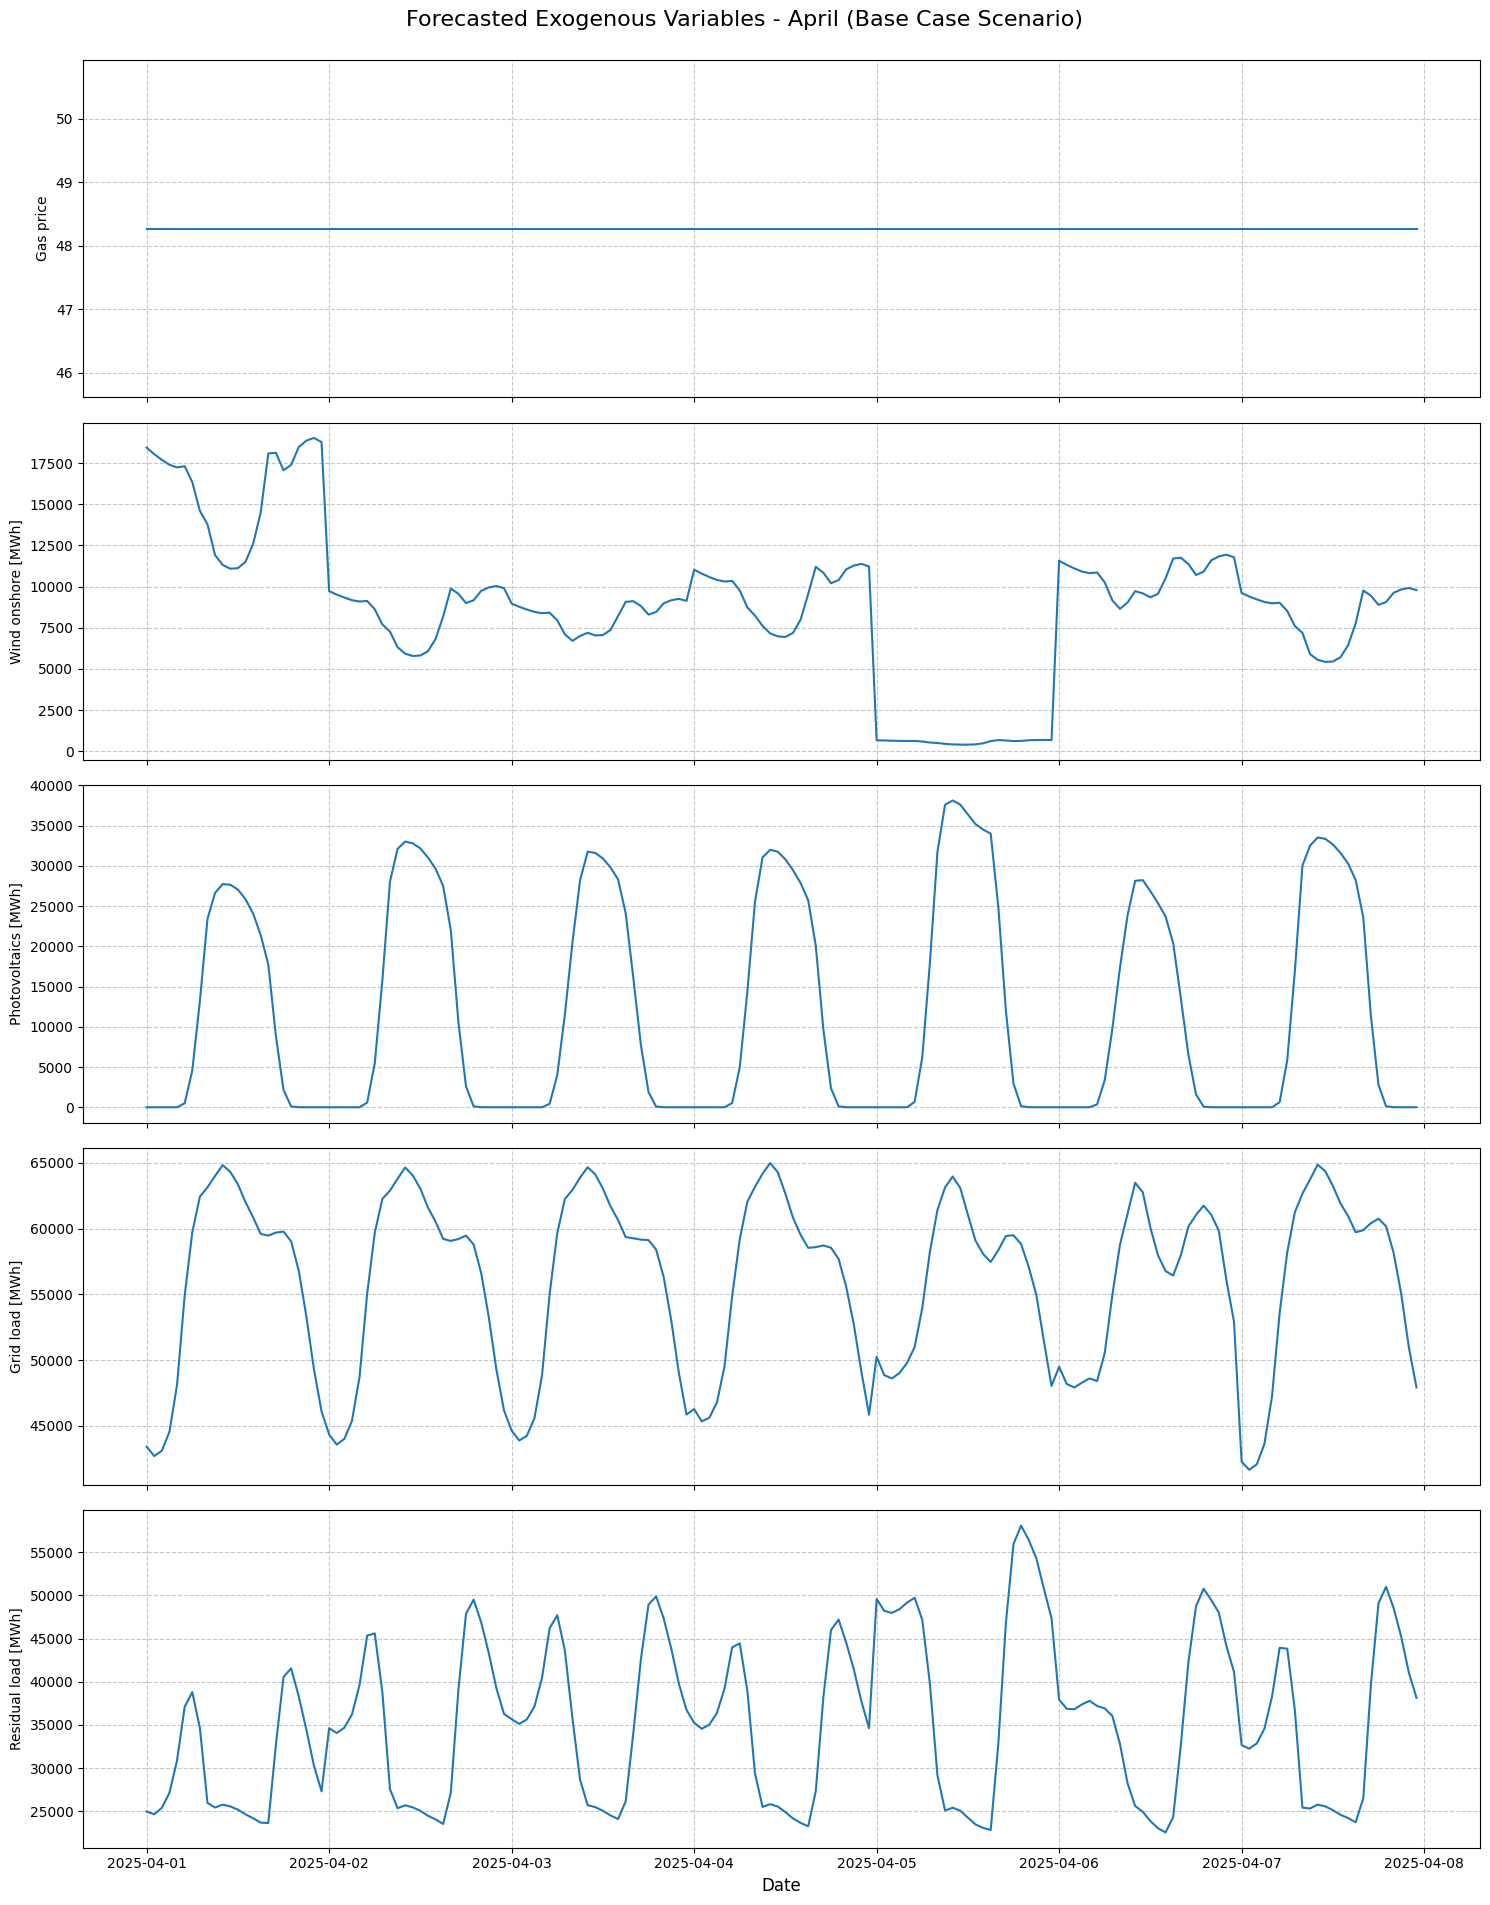

In [64]:
# --- Troubleshooting: Inspecting Spring Exogenous Variables in Forecast ---
print("\n--- Troubleshooting: Analyzing Forecasted Spring Exogenous Variables ---")

# Choose a scenario and a representative Spring month (e.g., April = Month 4)
scenario_to_inspect = 'Base Case'
spring_month_num = 4 # April
spring_month_name = 'April'

if scenario_to_inspect in generated_exog_data:
    exog_df_scenario = generated_exog_data[scenario_to_inspect]
    
    # Filter for the chosen spring month across all forecasted years (2025-2045)
    spring_exog_data = exog_df_scenario[exog_df_scenario.index.month == spring_month_num]

    if not spring_exog_data.empty:
        print(f"\nDescriptive Statistics for {spring_month_name} Exogenous Variables ({scenario_to_inspect} Scenario, 2025-2045):")
        
        # Select relevant columns for inspection
        cols_to_describe = ['Gas price', 'Wind onshore [MWh]', 'Photovoltaics [MWh]', 'Grid load [MWh]', 'Residual load [MWh]']
        print(spring_exog_data[cols_to_describe].describe())

        # Plot a sample week from this Spring month (e.g., first 7*24 hours if available)
        if len(spring_exog_data) > 7 * 24:
            print(f"\nPlotting a sample week of Exogenous Variables for {spring_month_name} ({scenario_to_inspect} Scenario):")
            sample_week_data = spring_exog_data.head(7 * 24)

            fig, axes = plt.subplots(len(cols_to_describe), 1, figsize=(15, 4 * len(cols_to_describe)), sharex=True)
            fig.suptitle(f'Forecasted Exogenous Variables - {spring_month_name} ({scenario_to_inspect} Scenario)', fontsize=16)

            for i, col in enumerate(cols_to_describe):
                axes[i].plot(sample_week_data.index, sample_week_data[col])
                axes[i].set_ylabel(col, fontsize=10)
                axes[i].grid(True, linestyle='--', alpha=0.7)
            
            plt.xlabel("Date", fontsize=12)
            plt.tight_layout(rect=[0, 0.03, 1, 0.98])
            plt.show()
        else:
            print(f"Not enough data for {spring_month_name} to plot a full week.")
    else:
        print(f"No forecasted exogenous data found for {spring_month_name} in the {scenario_to_inspect} scenario.")
else:
    print(f"Scenario '{scenario_to_inspect}' not found in generated_exog_data.")

In [ ]:
| Year | Wind CF | Solar CF |
| ---- | ------- | -------- |
| 2015 | 0.209   | 0.107    |
| 2016 | 0.181   | 0.102    |
| 2017 | 0.207   | 0.100    |
| 2018 | 0.197   | 0.110    |
| 2019 | 0.217   | 0.108    |
| 2020 | 0.220   | 0.109    |
| 2021 | 0.188   | 0.105    |
| 2022 | 0.209   | 0.110    |
| 2023 | 0.236   | 0.101    |
| 2024 | 0.215   | 0.094    |
Wind: 0.208

Solar: 0.105

In [ ]:
SCENARIO_DATA_TABLE_NEW = {
    "2025-2030": {
        "Optimistic":   {"Grid load [MWh]": 68000, "EU Carbon price [€/tCO₂]": 65,  "Gas price [€/MWh]": 30},
        "Base Case":    {"Grid load [MWh]": 65000, "EU Carbon price [€/tCO₂]": 75,  "Gas price [€/MWh]": 40},
        "Pessimistic":  {"Grid load [MWh]": 62000, "EU Carbon price [€/tCO₂]": 90, "Gas price [€/MWh]": 50}
    },
    "2030-2035": {
        "Optimistic":   {"Grid load [MWh]": 85000, "EU Carbon price [€/tCO₂]": 130, "Gas price [€/MWh]": 30},
        "Base Case":    {"Grid load [MWh]": 78000, "EU Carbon price [€/tCO₂]": 160, "Gas price [€/MWh]": 40},
        "Pessimistic":  {"Grid load [MWh]": 72000, "EU Carbon price [€/tCO₂]": 220,  "Gas price [€/MWh]": 55}
    },
    "2035-2040": {
        "Optimistic":   {"Grid load [MWh]": 100000, "EU Carbon price [€/tCO₂]": 250, "Gas price [€/MWh]": 35},
        "Base Case":    {"Grid load [MWh]": 92000, "EU Carbon price [€/tCO₂]": 300, "Gas price [€/MWh]": 45},
        "Pessimistic":  {"Grid load [MWh]": 85000, "EU Carbon price [€/tCO₂]": 350, "Gas price [€/MWh]": 60}
    },
    "2040-2045": {
        "Optimistic":   {"Grid load [MWh]": 110000, "EU Carbon price [€/tCO₂]": 350, "Gas price [€/MWh]": 40},
        "Base Case":    {"Grid load [MWh]": 102000, "EU Carbon price [€/tCO₂]": 400, "Gas price [€/MWh]": 50},
        "Pessimistic":  {"Grid load [MWh]": 95000, "EU Carbon price [€/tCO₂]": 450, "Gas price [€/MWh]": 65}
    }
}


In [ ]:
SCENARIO_DATA_TABLE_NEW = {
    "2025-2030": {
        "Optimistic":   {"Grid load [MWh]": 85000, "EU Carbon price [€/tCO₂]": 75, "Gas price [€/MWh]": 25},
        "Base Case":    {"Grid load [MWh]": 75000, "EU Carbon price [€/tCO₂]": 160,  "Gas price [€/MWh]": 40},
        "Pessimistic":  {"Grid load [MWh]": 65000, "EU Carbon price [€/tCO₂]": 260,  "Gas price [€/MWh]": 70}
    },
    "2030-2035": {
        "Optimistic":   {"Grid load [MWh]": 100000, "EU Carbon price [€/tCO₂]": 150, "Gas price [€/MWh]": 30},
        "Base Case":    {"Grid load [MWh]": 85000, "EU Carbon price [€/tCO₂]": 220, "Gas price [€/MWh]": 45},
        "Pessimistic":  {"Grid load [MWh]": 70000, "EU Carbon price [€/tCO₂]": 320, "Gas price [€/MWh]": 80}
    },
    "2035-2040": {
        "Optimistic":   {"Grid load [MWh]": 115000, "EU Carbon price [€/tCO₂]": 250, "Gas price [€/MWh]": 35},
        "Base Case":    {"Grid load [MWh]": 95000, "EU Carbon price [€/tCO₂]": 300, "Gas price [€/MWh]": 50},
        "Pessimistic":  {"Grid load [MWh]": 75000, "EU Carbon price [€/tCO₂]": 400, "Gas price [€/MWh]": 90}
    },
    "2040-2045": {
        "Optimistic":   {"Grid load [MWh]": 125000, "EU Carbon price [€/tCO₂]": 350, "Gas price [€/MWh]": 40},
        "Base Case":    {"Grid load [MWh]": 105000, "EU Carbon price [€/tCO₂]": 400, "Gas price [€/MWh]": 55},
        "Pessimistic":  {"Grid load [MWh]": 80000, "EU Carbon price [€/tCO₂]": 475, "Gas price [€/MWh]": 100}
    }
}


--- Starting Part 2: Scenario Forecasting (Revised) ---
--- Loading Data and Saved Objects ---
Columns in loaded historical data: ['Gas price', 'EU Carbon price', 'Spot market price(cents/kWh)', 'Wind onshore [MWh]', 'Photovoltaics [MWh]', 'Wind onshore installed [MW]', 'Photovoltaics installed [MW]', 'Grid load [MWh]', 'Residual load [MWh]']
All data and objects loaded successfully.
Data shape after filtering for 2015 onwards: (87672, 9)

--- Learning Historical Profiles ---
Columns in pv_data after subsetting: ['Photovoltaics [MWh]', 'Photovoltaics installed [MW]']
Columns in wind_data after subsetting: ['Wind onshore [MWh]', 'Wind onshore installed [MW]']
Historical profiles learned.
Using Max Historical Load Profile Factor: 1.191

--- Forecasting for scenario: Optimistic ---


Periods for Optimistic:   0%|          | 0/4 [00:00<?, ?it/s]


--- Forecasting for scenario: Base Case ---


Periods for Base Case:   0%|          | 0/4 [00:00<?, ?it/s]


--- Forecasting for scenario: Pessimistic ---


Periods for Pessimistic:   0%|          | 0/4 [00:00<?, ?it/s]


--- Saving Forecasts to spot_price_forecasts_hourly_2025_2045_p2_v32.xlsx ---
Price forecasts saved.

--- Saving Generated Exogenous Variables to generated_future_exogenous_variables_p2_v32.xlsx ---
Generated exogenous variables saved.

--- Generating Summary Report ---


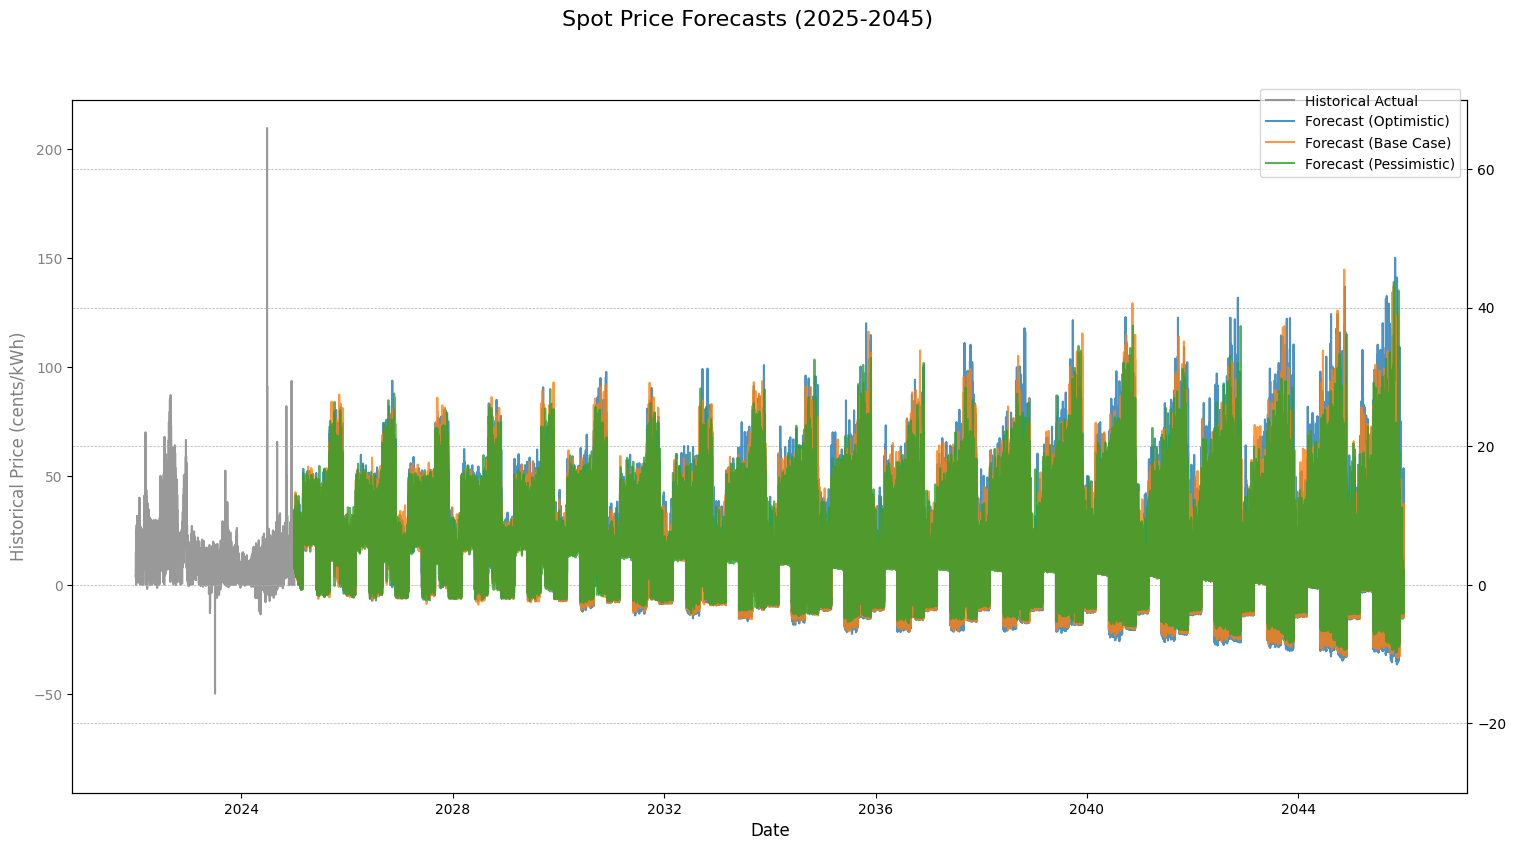

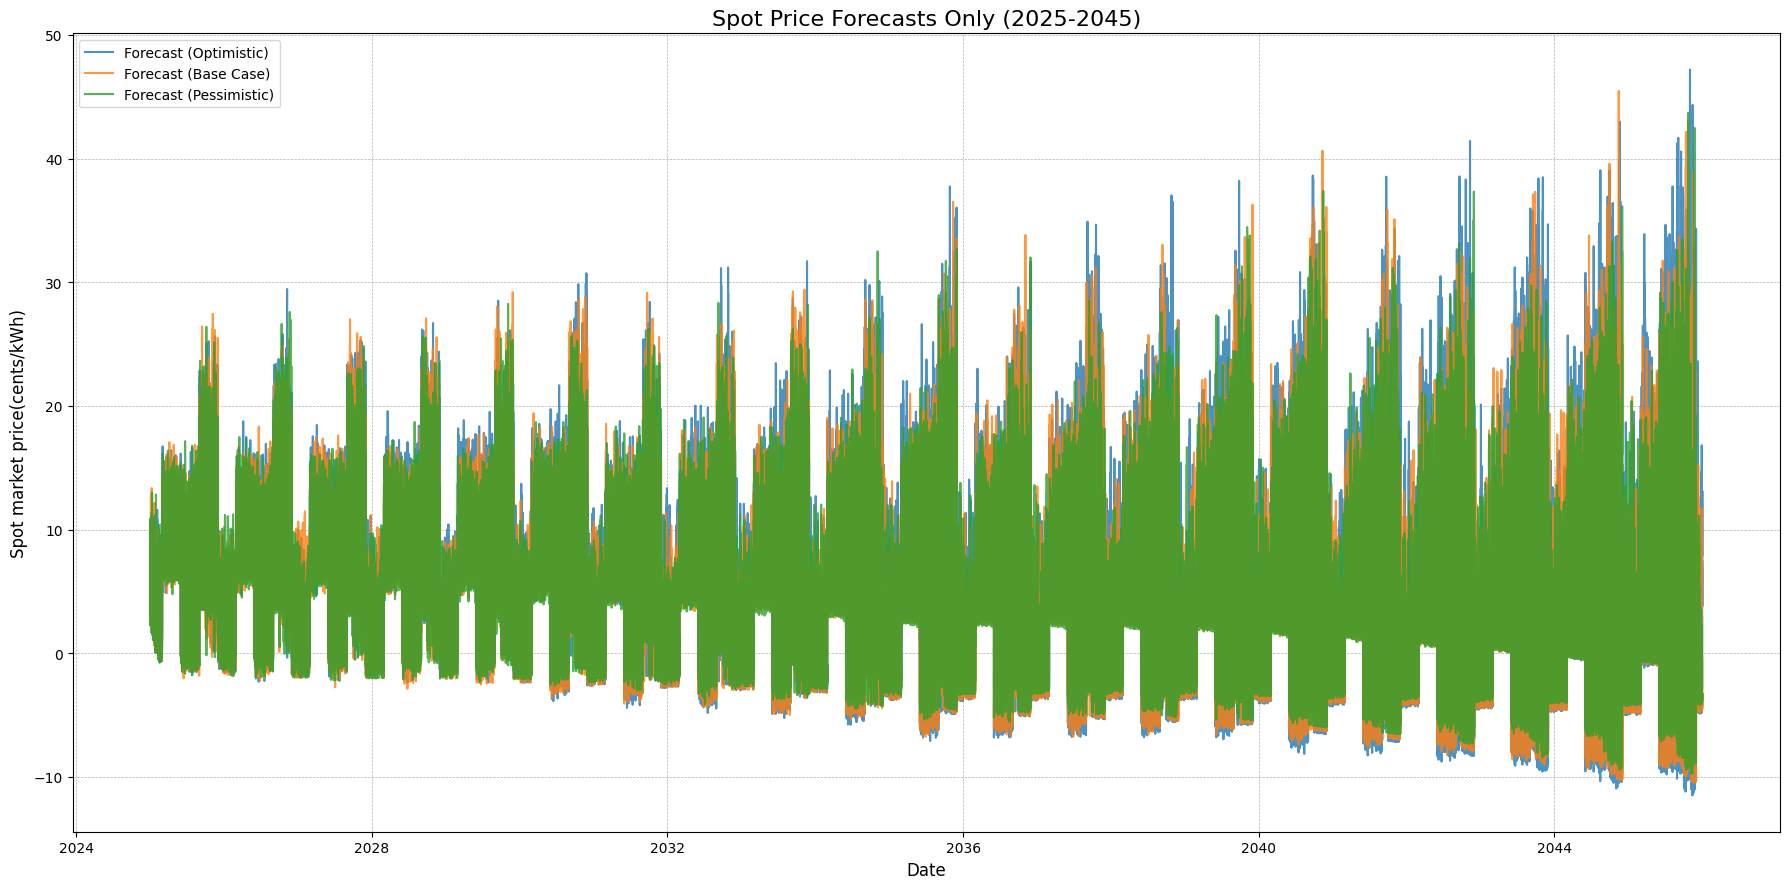

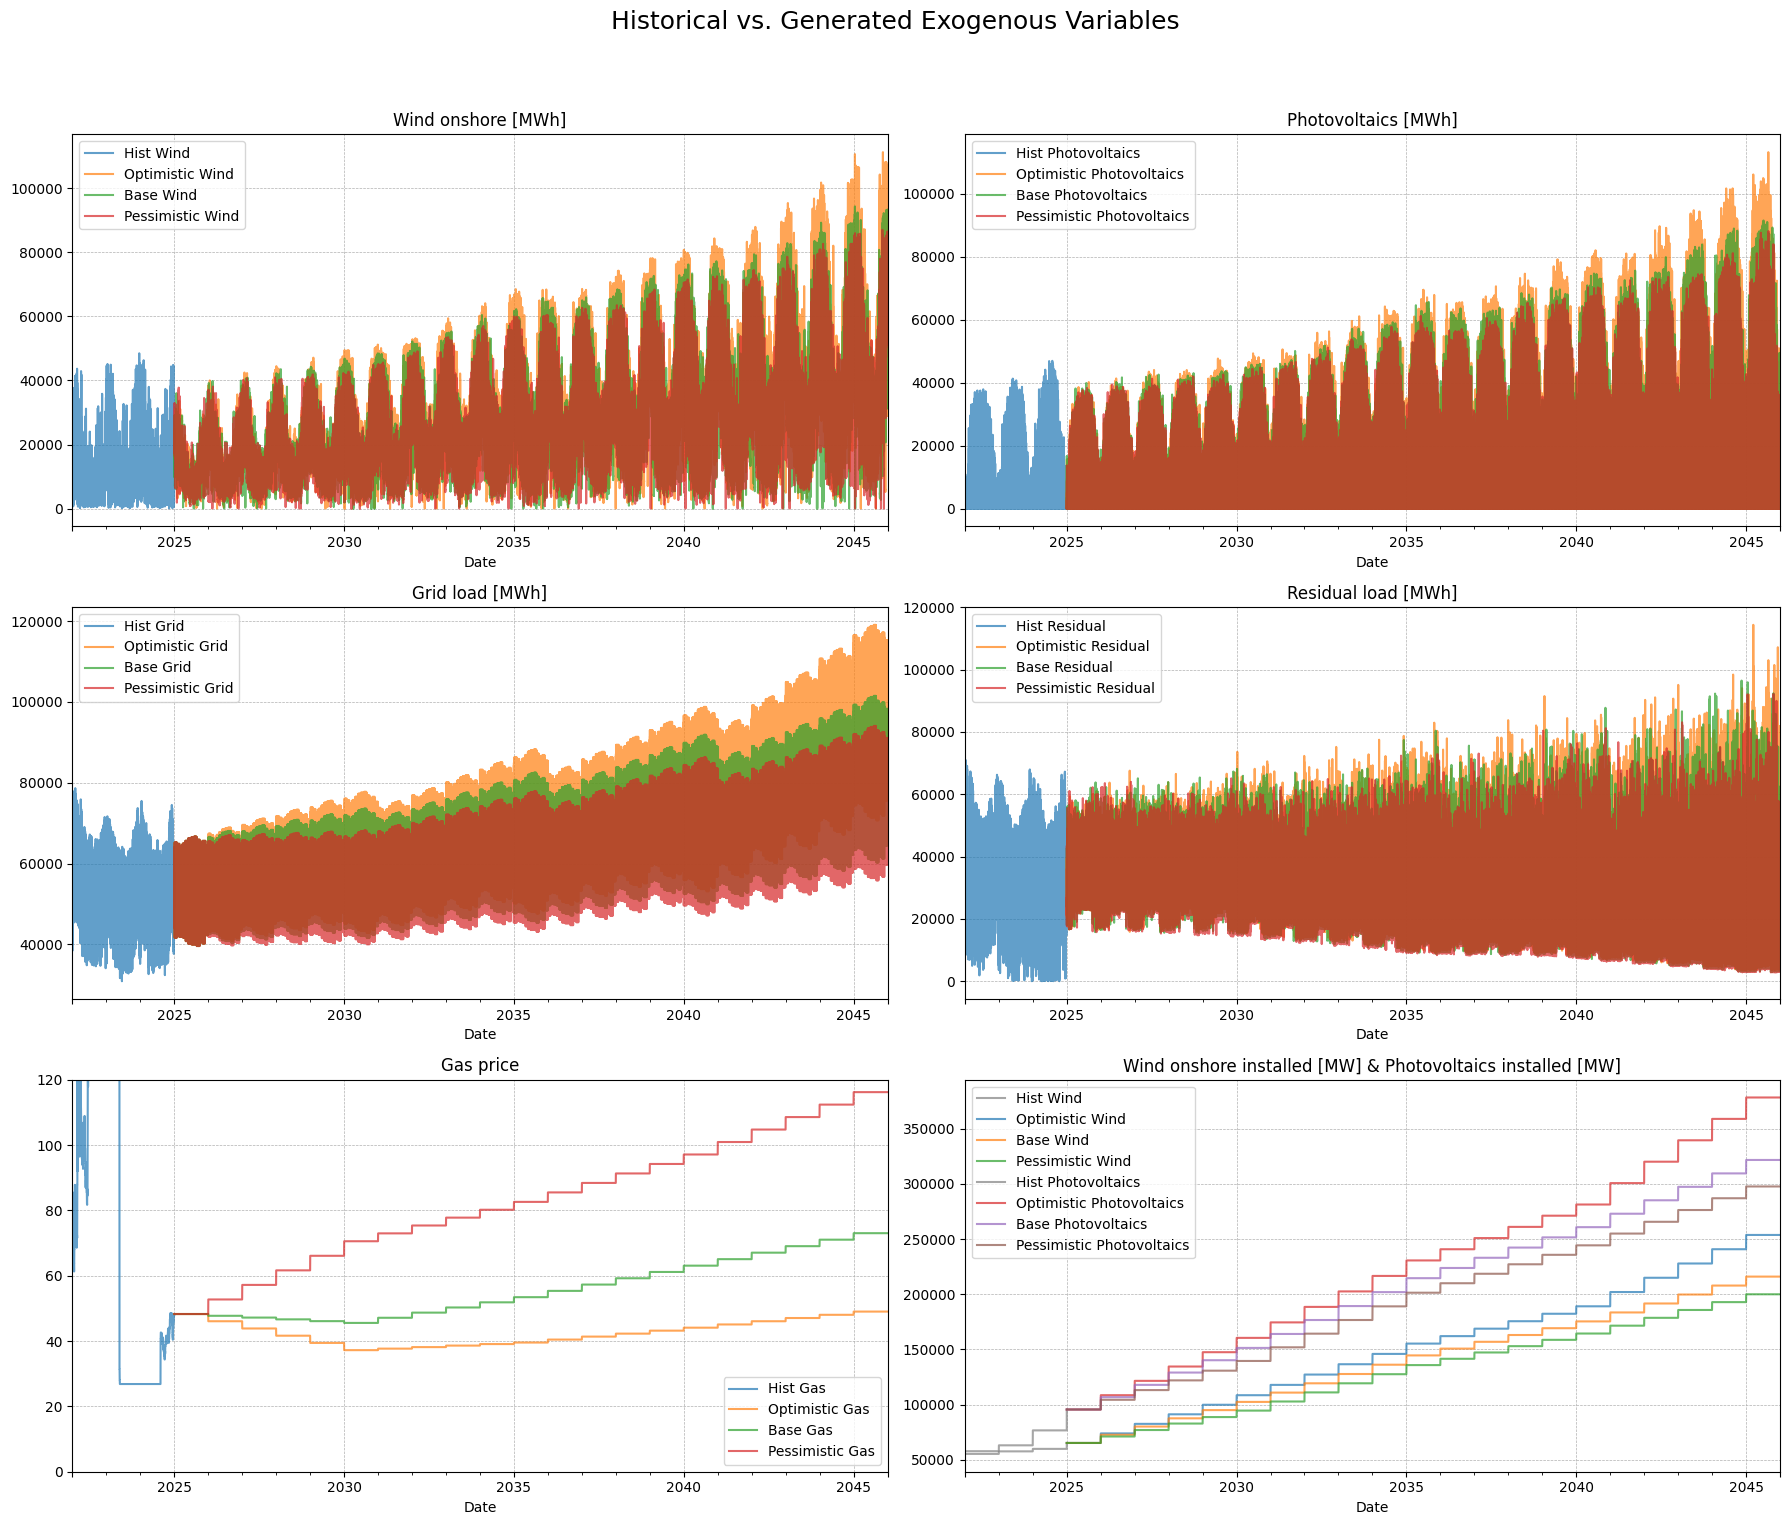


--- Plotting Forecasted Negative Price Hours by Season and Scenario ---


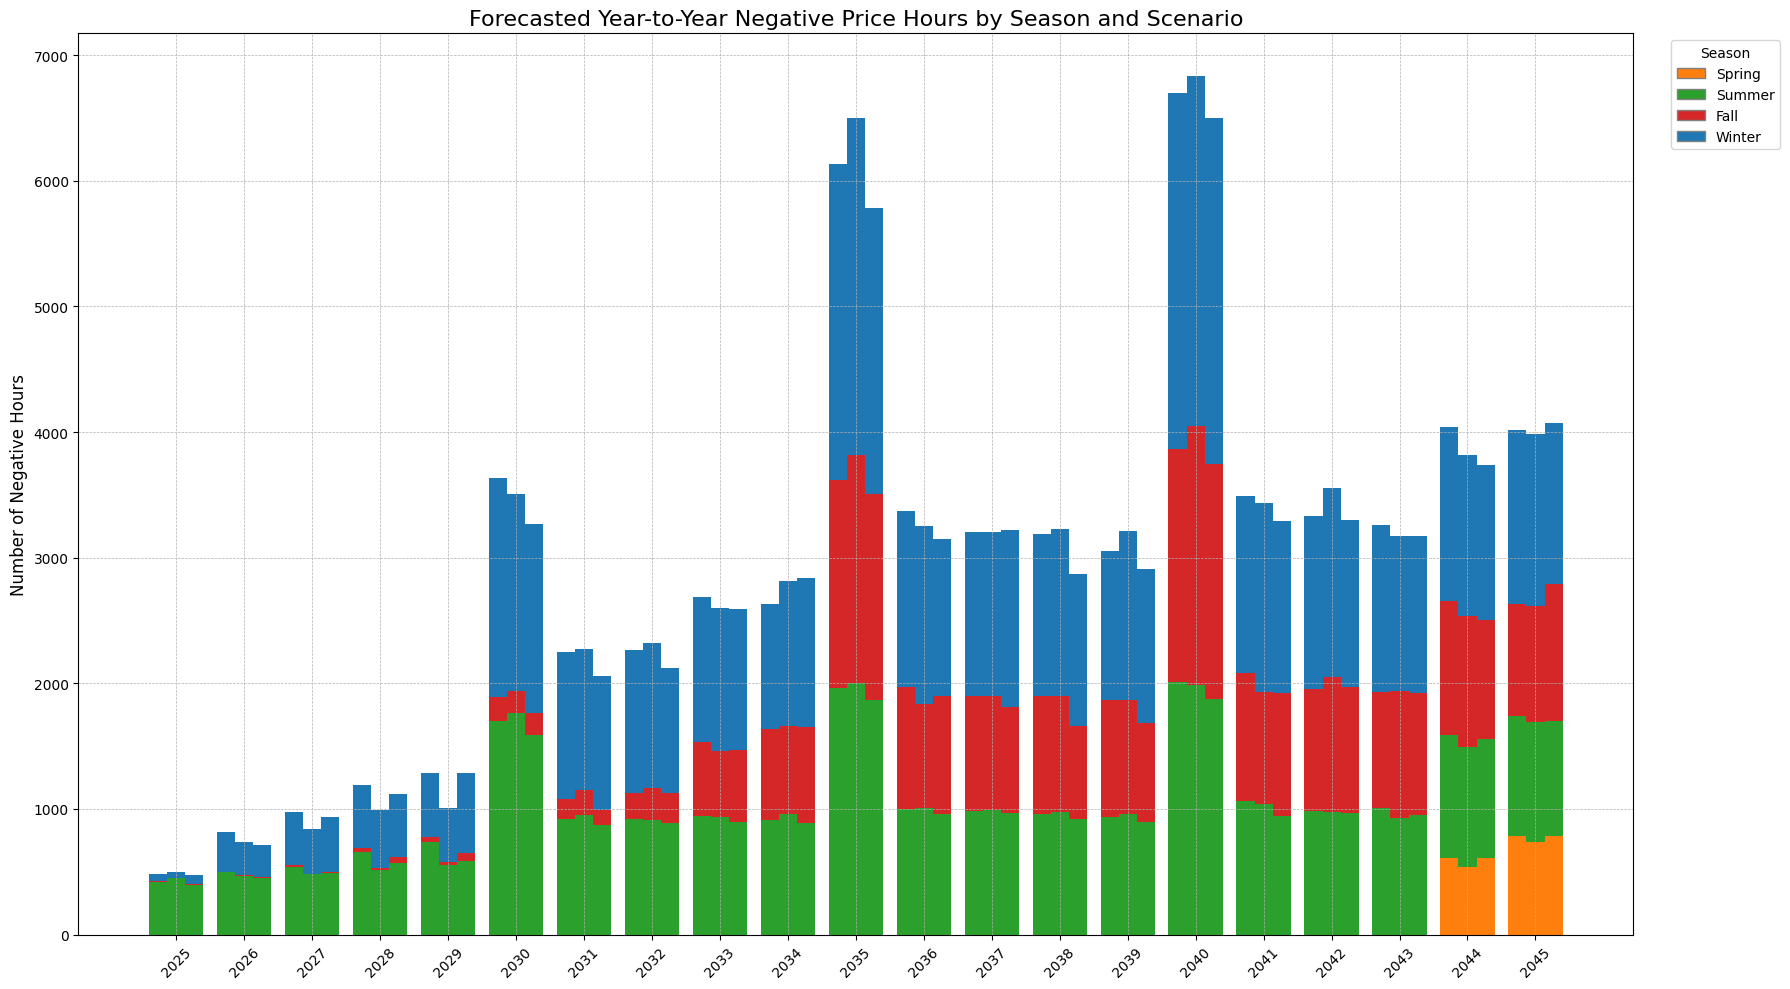


--- Plotting Seasonal Energy Profiles for Year 2026 ---


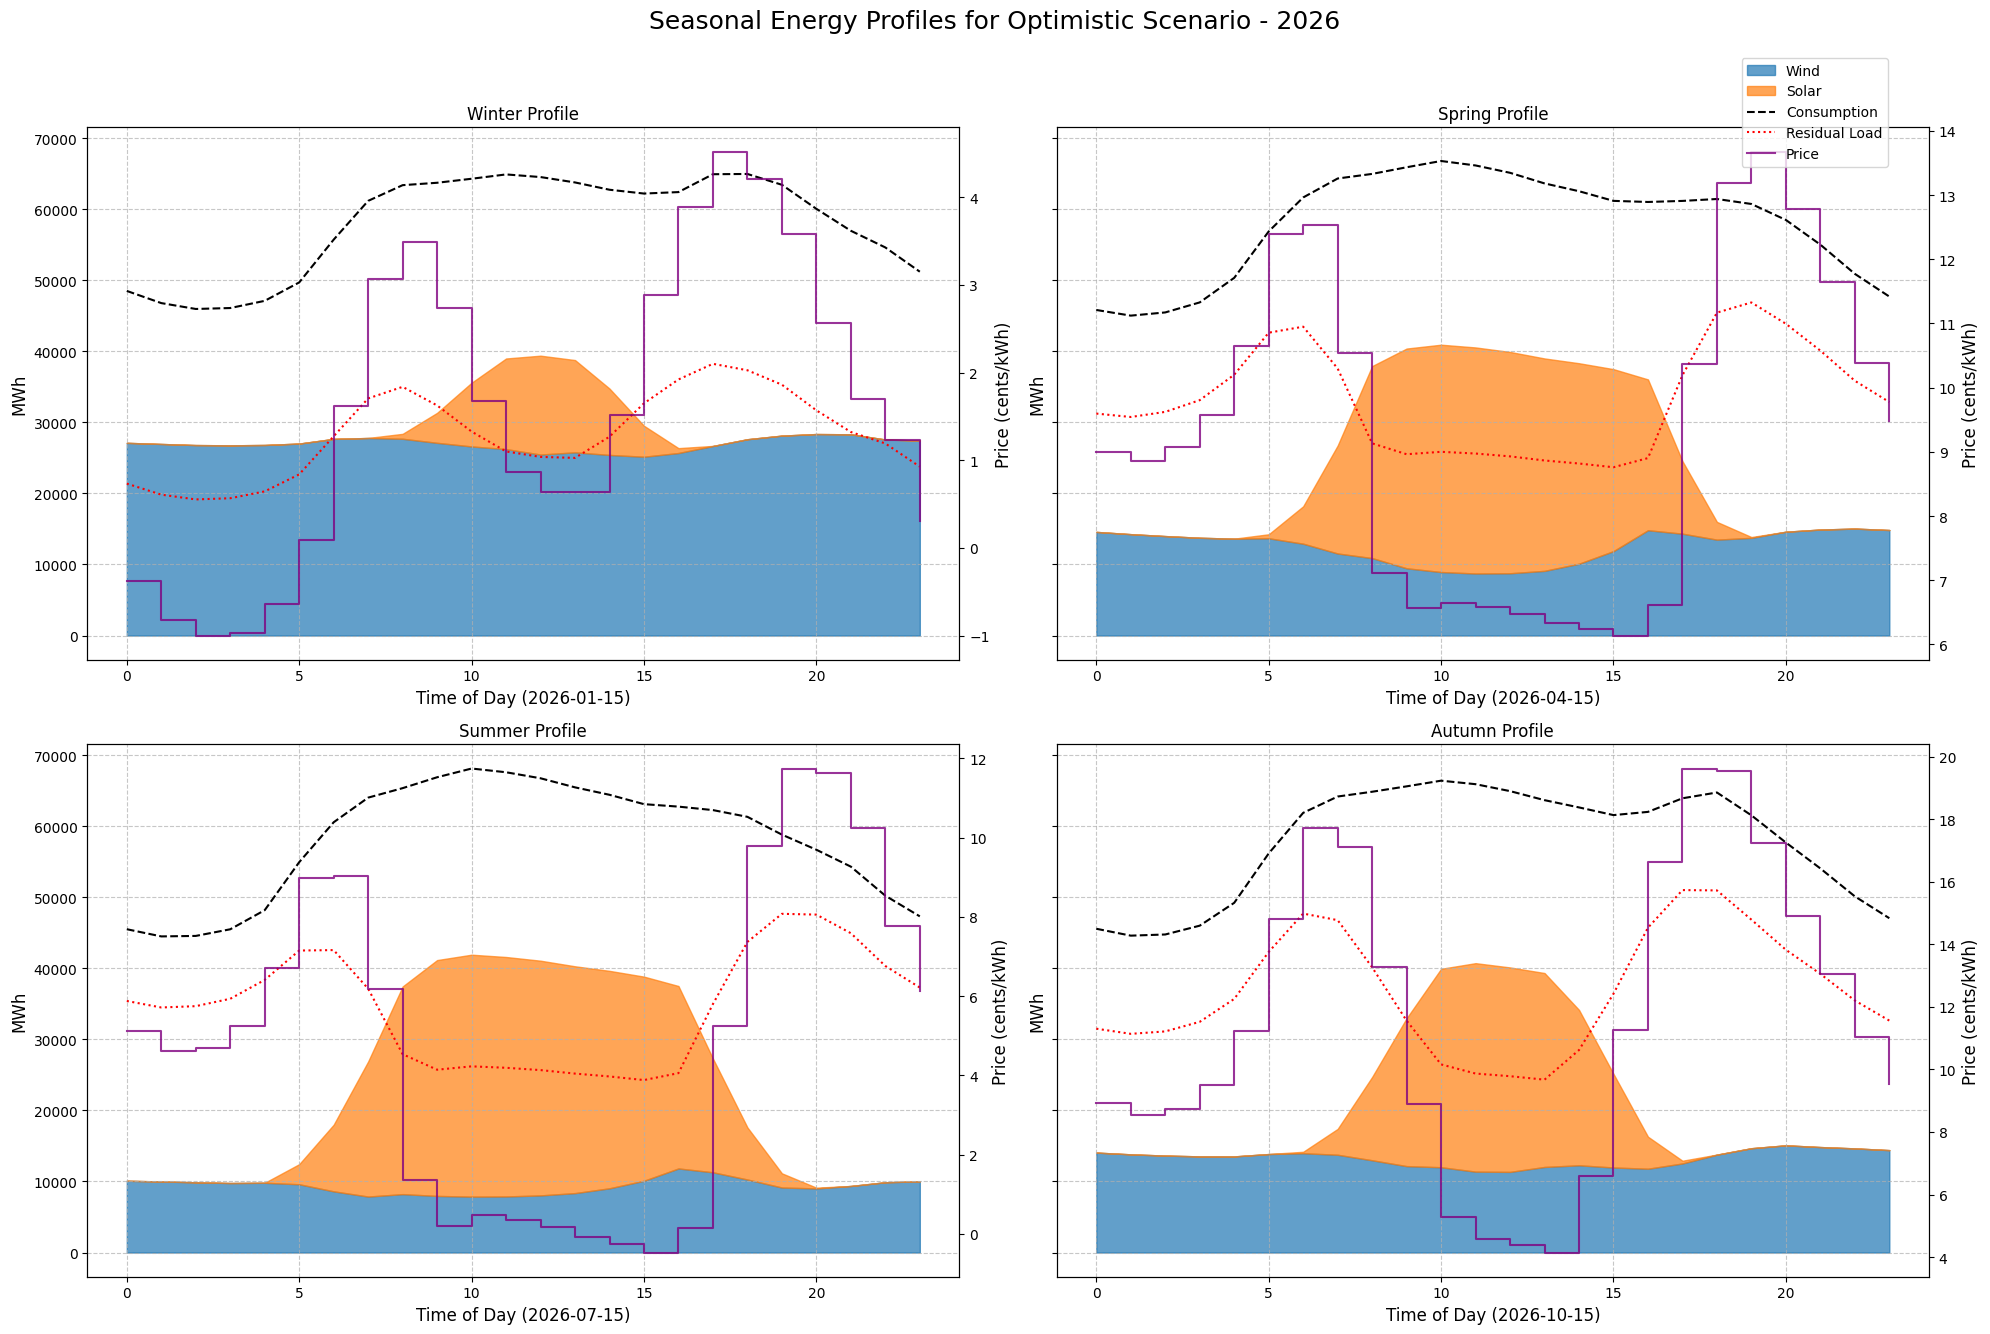

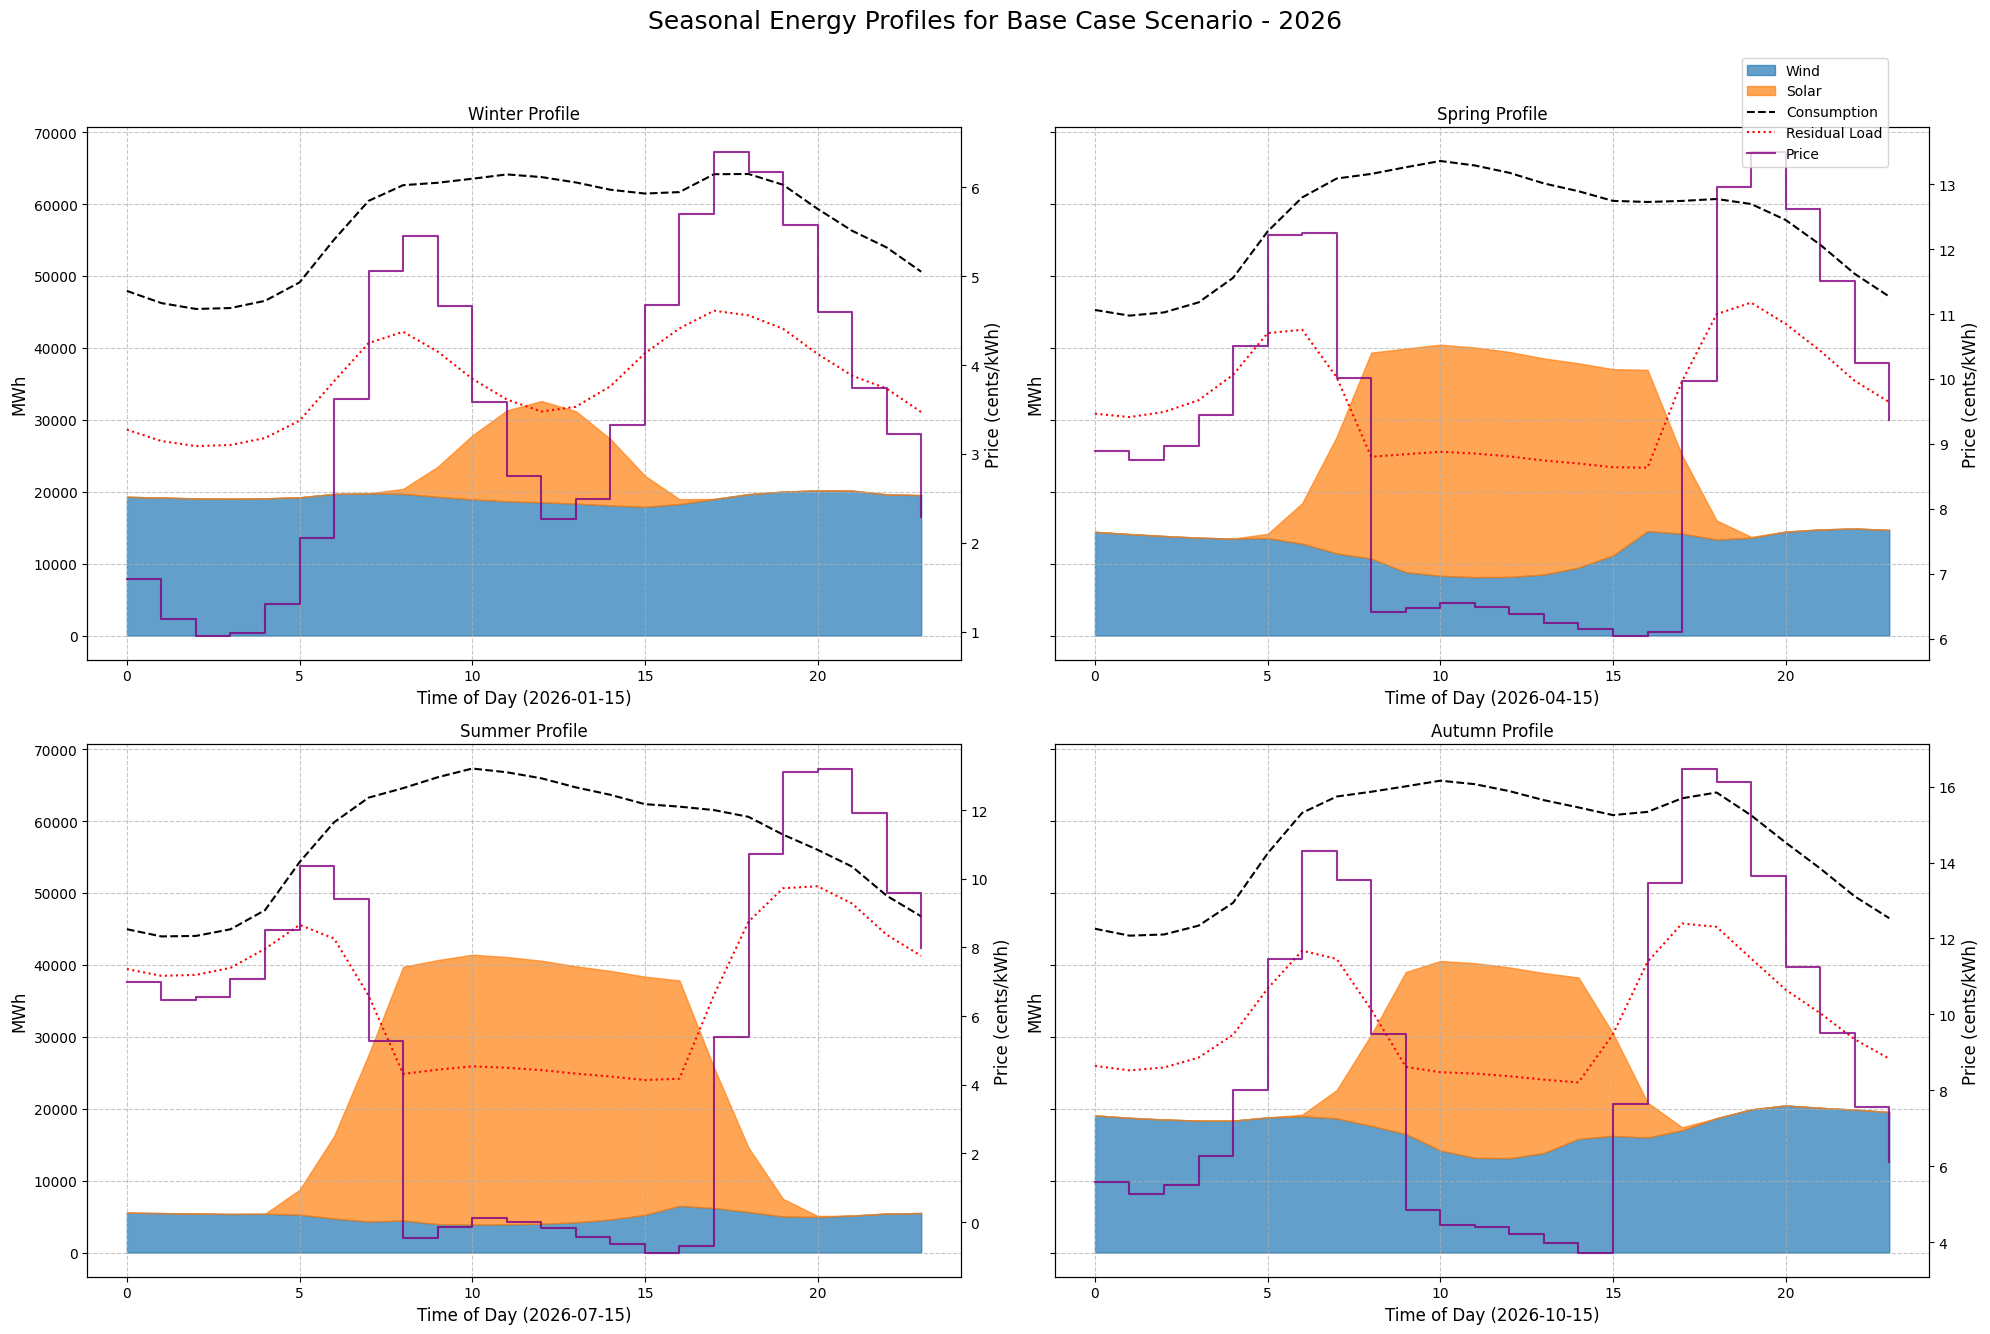

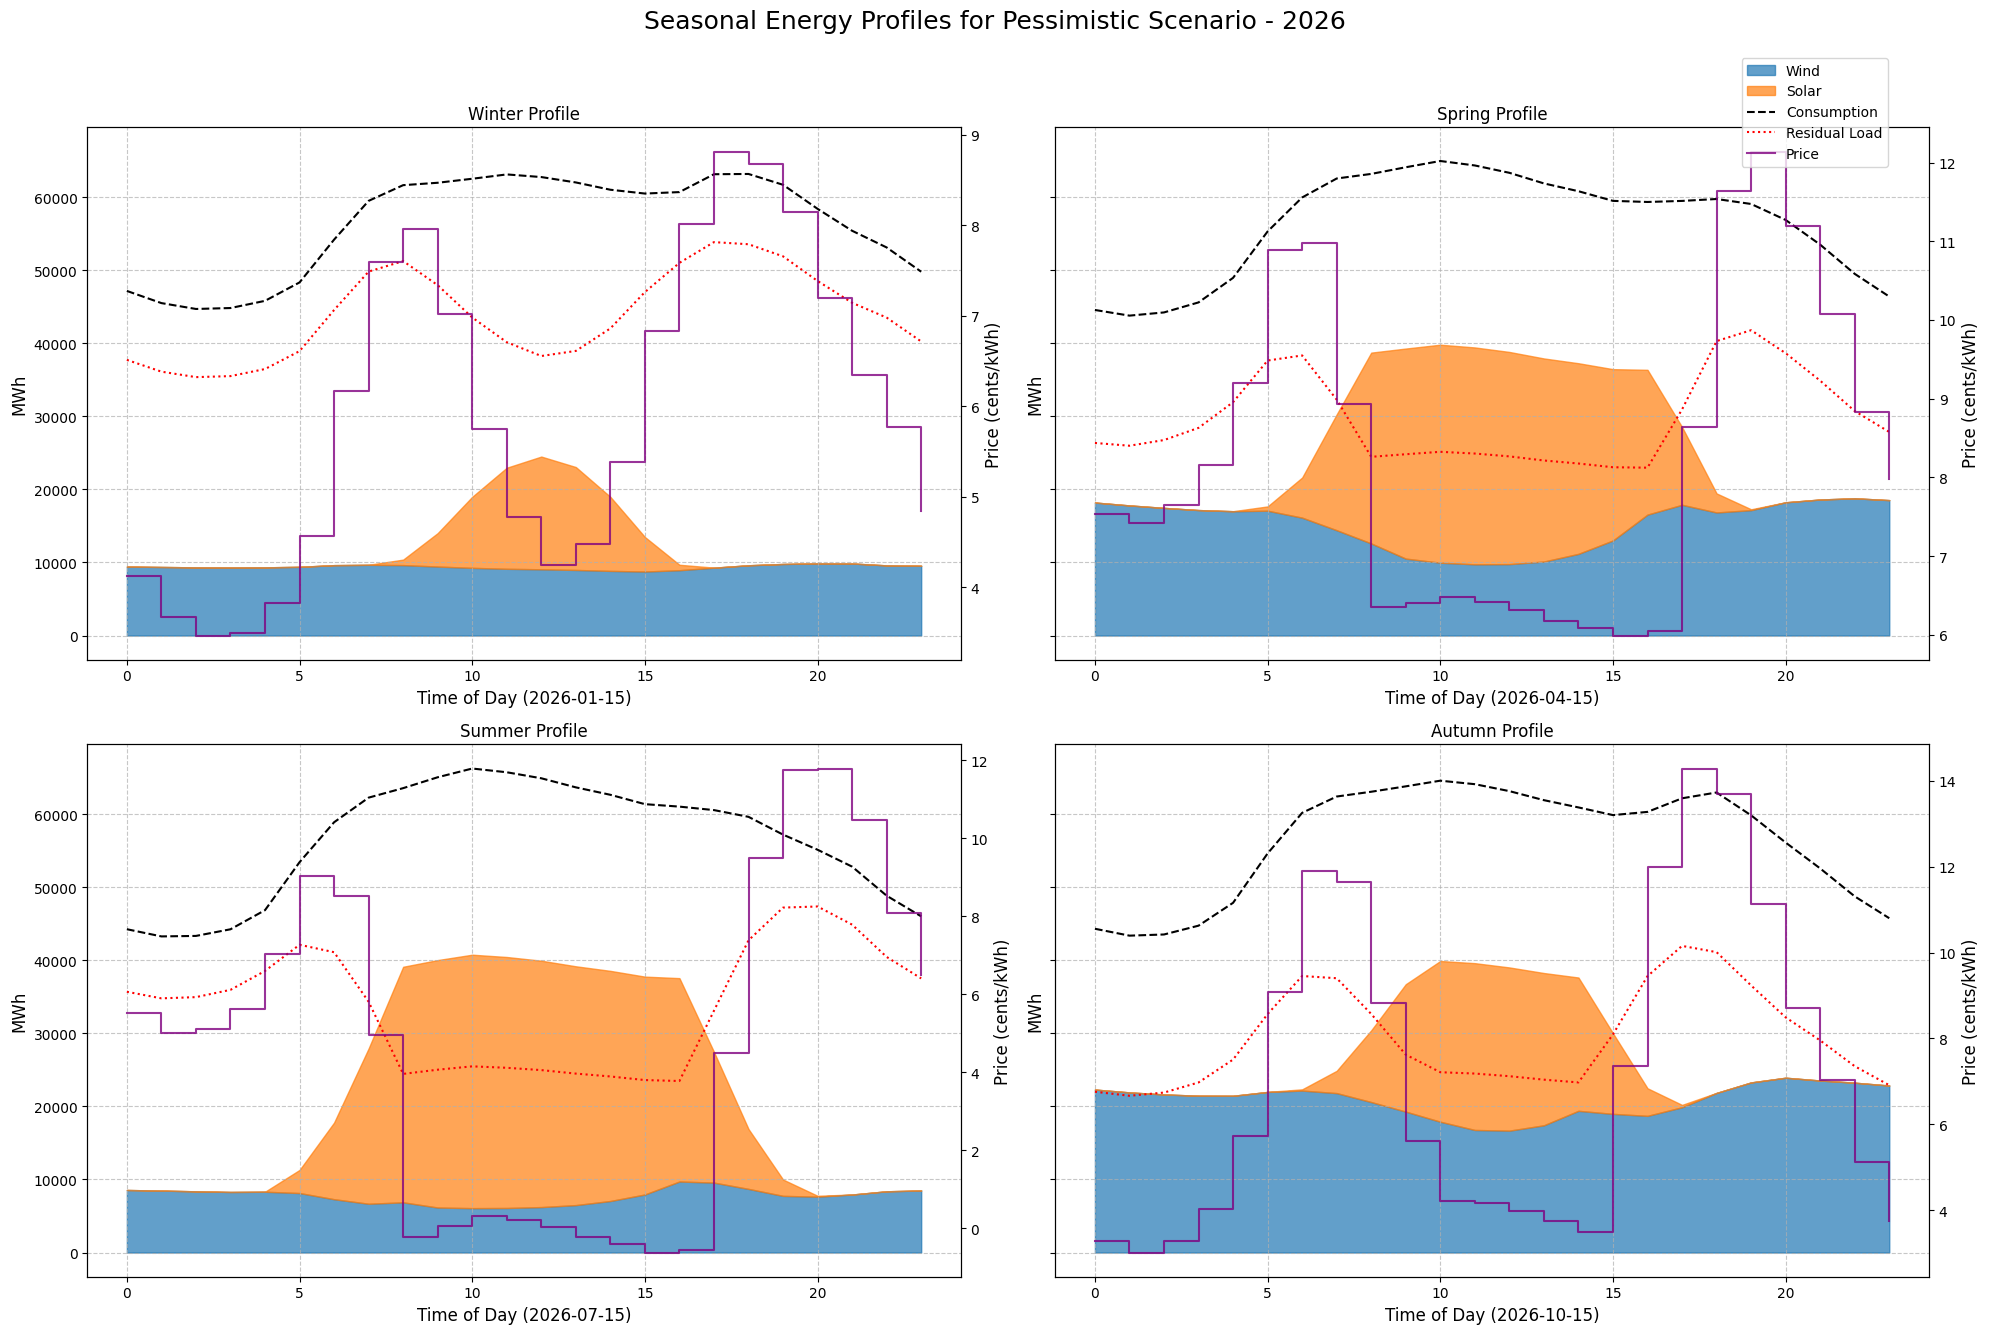


--- Plotting Correlation Heatmaps ---


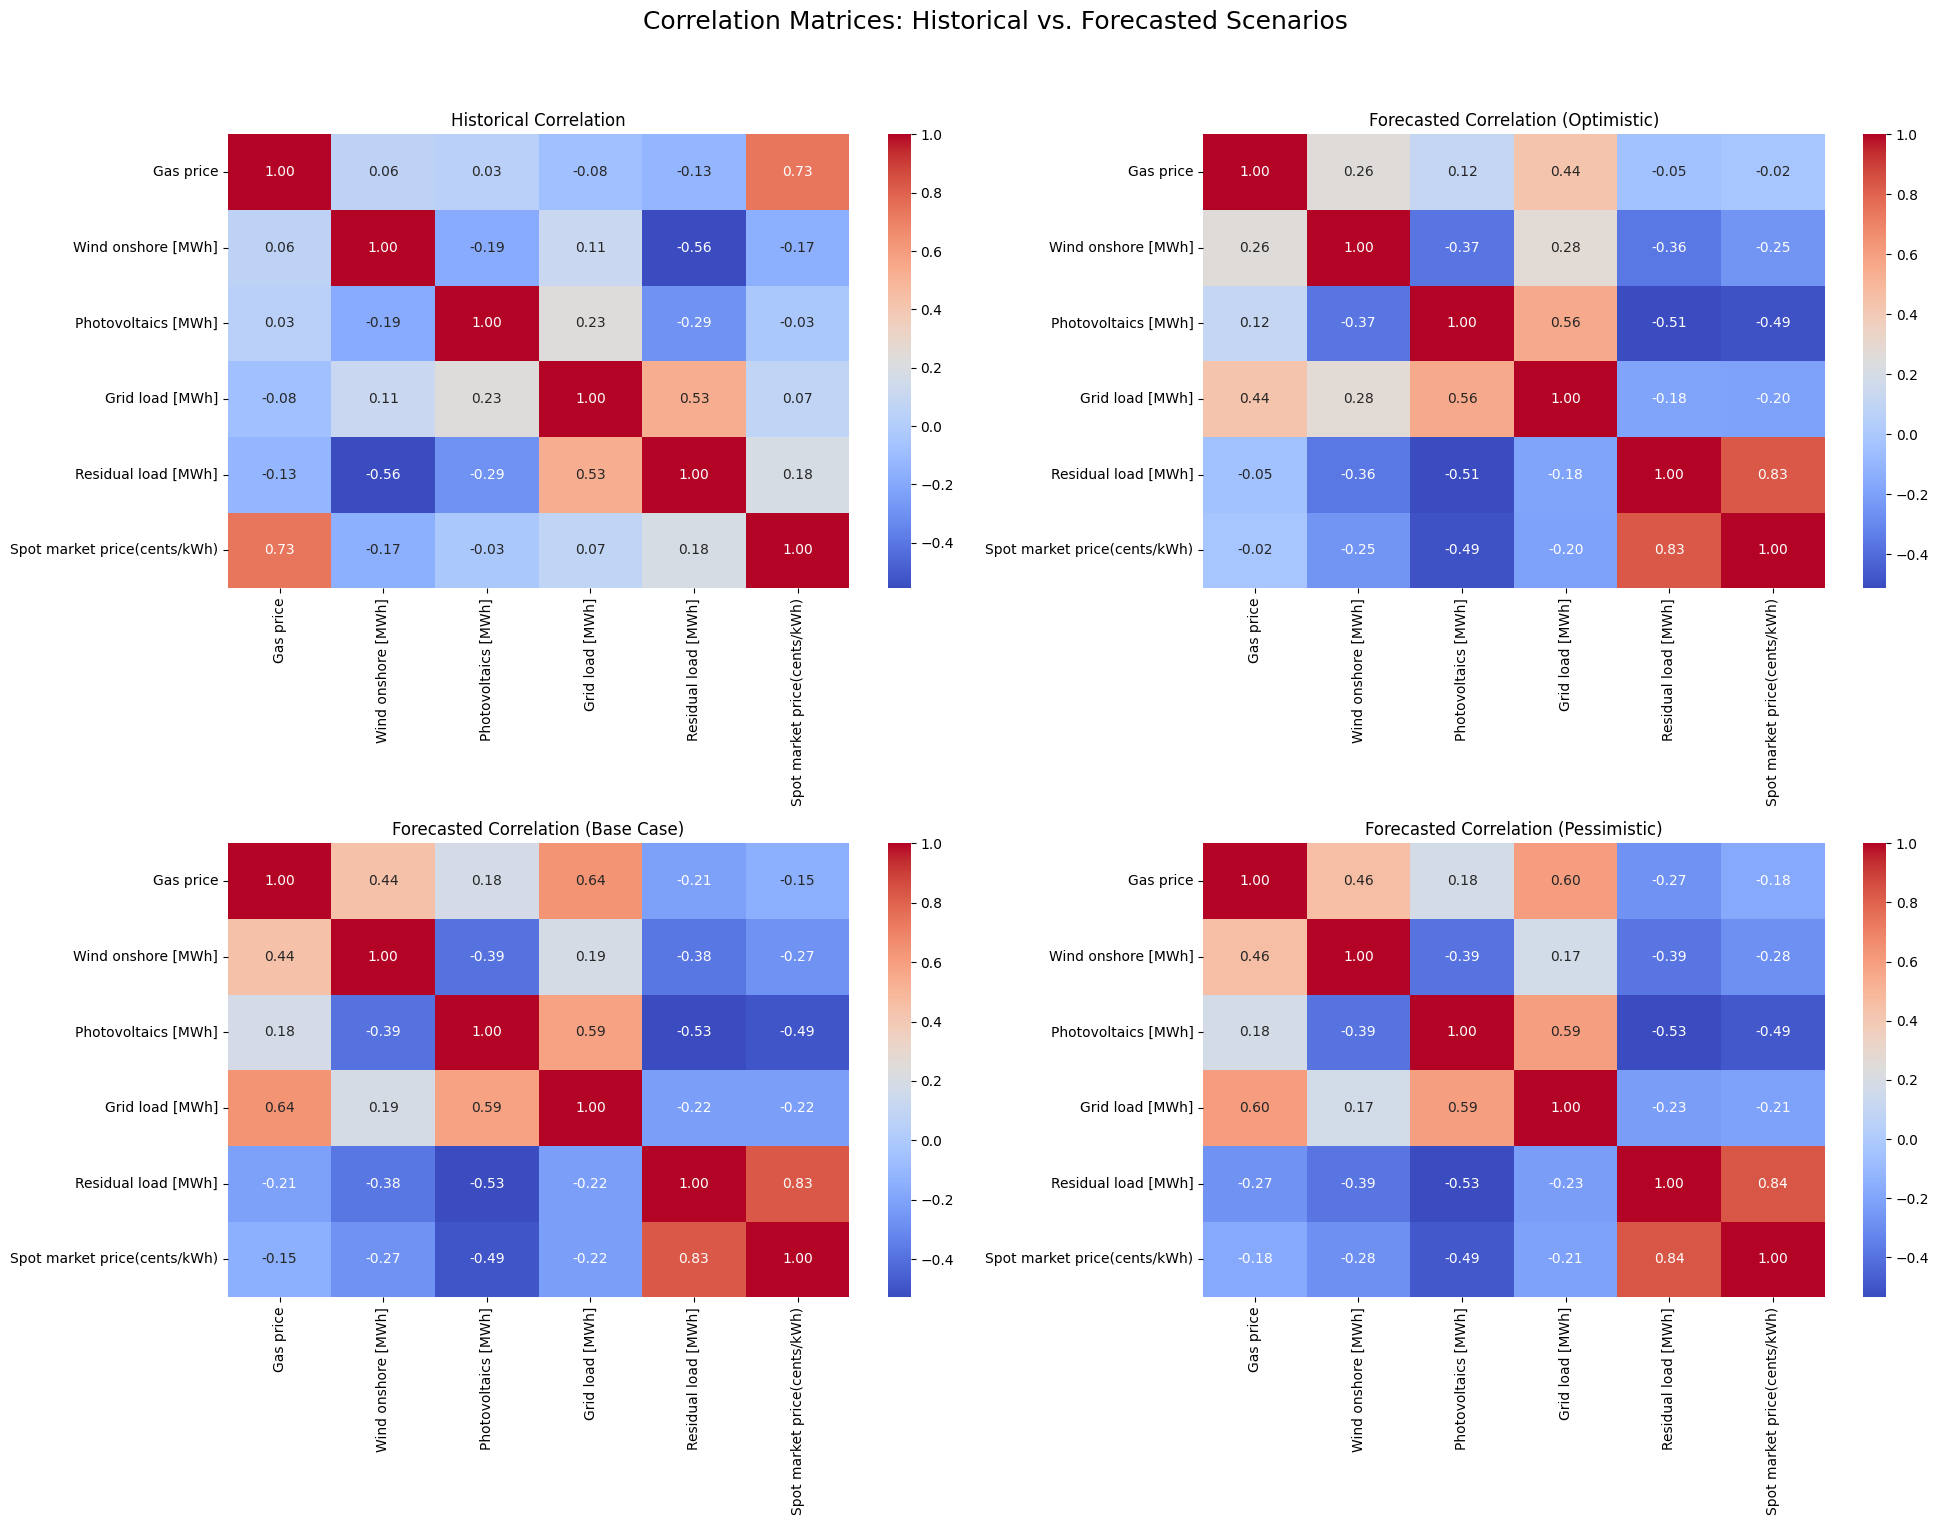


--- Part 2 Script Finished ---


In [63]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from sklearn.preprocessing import StandardScaler
import sys
import os
import joblib
from tqdm.auto import tqdm
import seaborn as sns
import statsmodels.api as sm

warnings.filterwarnings("ignore")

# --- Configuration for Part 2 ---
CONFIG_PART2 = {
    "target_variable": 'Spot market price(cents/kWh)',
    "exog_cols": [
        'Gas price', 'Wind onshore [MWh]', 'Photovoltaics [MWh]',
        'Grid load [MWh]', 'Residual load [MWh]',
        'Wind onshore installed [MW]', 'Photovoltaics installed [MW]'
    ],
    "historical_data_file": './Spot Price_less variables_Hourly_Data.csv',
    "models_file": 'fitted_seasonal_models.joblib',
    "scalers_file": 'seasonal_exog_scalers.joblib',
    "best_orders_file": 'best_orders_per_season.joblib',

    "output_price_forecast_excel": "spot_price_forecasts_hourly_2025_2045_p2_v32.xlsx",
    "output_exog_excel_file": "generated_future_exogenous_variables_p2_v32.xlsx",

    # REVISED: Replaced multiple plot flags with a single flag for a consolidated report
    "generate_summary_report": True,
    "seasonal_profile_plot_year": 2026,
    
    "RENEWABLE_PENETRATION_TARGETS_ANNUAL": {
        2025: 0.60, 
        2030: 0.65, 
        2035: 0.80, 
        2040: 0.85, 
        2045: 0.95
    },
    "PV_TO_WIND_CAPACITY_INSTALL_RATIO": 1.5,
    # MODIFIED: Increased planning CFs to ensure a smoother visual start for MWh generation
    # Increased AVG_CF_PV_PLANNING and AVG_CF_WIND_PLANNING slightly for higher overall generation
    "AVG_CF_PV_PLANNING": 0.11, 
    "AVG_CF_WIND_PLANNING": 0.21, 

    "apply_price_floor": True,
    "price_floor_value_cents_kwh": -20.0,
}

# --- SCENARIO_DATA_TABLE ---
SCENARIO_DATA_TABLE = {
    "2025-2030": {
        "Optimistic":   {"Grid load [MWh]": 80000, "Gas price [€/MWh]": 35}, 
        "Base Case":    {"Grid load [MWh]": 75000, "Gas price [€/MWh]": 45},
        "Pessimistic":  {"Grid load [MWh]": 68500, "Gas price [€/MWh]": 75} 
    },
    "2030-2035": {
        "Optimistic":   {"Grid load [MWh]": 91500, "Gas price [€/MWh]": 40}, 
        "Base Case":    {"Grid load [MWh]": 85000, "Gas price [€/MWh]": 55},
        "Pessimistic":  {"Grid load [MWh]": 80000, "Gas price [€/MWh]": 85}  
    },
    "2035-2040": {
        "Optimistic":   {"Grid load [MWh]": 102500, "Gas price [€/MWh]": 45}, 
        "Base Case":    {"Grid load [MWh]": 95000, "Gas price [€/MWh]": 65},
        "Pessimistic":  {"Grid load [MWh]": 89000, "Gas price [€/MWh]": 100} 
    },
    "2040-2045": {
        "Optimistic":   {"Grid load [MWh]": 125000, "Gas price [€/MWh]": 50}, 
        "Base Case":    {"Grid load [MWh]": 105000, "Gas price [€/MWh]": 75},
        "Pessimistic":  {"Grid load [MWh]": 97000, "Gas price [€/MWh]": 120}  
    }
}
# --- Helper Functions ---


def learn_all_historical_profiles(df_hist):
    """
    Learns detailed MONTHLY historical profiles for PV, Wind, and Load.
    This function calculates the capacity factors (CF) for Photovoltaics (PV)
    and Wind based on historical generation and installed capacity.
    It also learns the hourly load profile, normalized by the daily mean,
    for each month and day of the week.
    """
    print("\n--- Learning Historical Profiles ---")
    profiles = {}
    
    # PV Profiles: Calculate hourly capacity factor per month
    pv_data = df_hist[['Photovoltaics [MWh]', 'Photovoltaics installed [MW]']].copy()
    print(f"Columns in pv_data after subsetting: {pv_data.columns.tolist()}")
    pv_data = pv_data[pv_data['Photovoltaics installed [MW]'] > 1e-3]
    pv_data['CF'] = (pv_data['Photovoltaics [MWh]'] / pv_data['Photovoltaics installed [MW]']).clip(0, 1)
    profiles['pv_profile'] = {m: g.groupby(g.index.hour)['CF'].mean() for m, g in pv_data.groupby(pv_data.index.month)}
    
    # Wind Profiles: Calculate hourly capacity factor per month
    wind_data = df_hist[['Wind onshore [MWh]', 'Wind onshore installed [MW]']].copy()
    print(f"Columns in wind_data after subsetting: {wind_data.columns.tolist()}")
    wind_data = wind_data[wind_data['Wind onshore installed [MW]'] > 1e-3]
    wind_data['CF'] = (wind_data['Wind onshore [MWh]'] / wind_data['Wind onshore installed [MW]']).clip(0, 1)
    profiles['wind_profile'] = {m: g.groupby(g.index.hour)['CF'].mean() for m, g in wind_data.groupby(wind_data.index.month)}

    # Load Profile: Learn normalized hourly load profile per month and day of week
    load_data = df_hist['Grid load [MWh]'].copy()
    load_profiles_raw = load_data.groupby([load_data.index.month, load_data.index.dayofweek, load_data.index.hour]).mean()
    profiles['load_profile'] = {}
    
    # MODIFIED LINE: Use a list to store all maximum factors encountered
    all_max_factors = [] 

    for month in range(1, 13):
        profiles['load_profile'][month] = {}
        for dow in range(7): # Day of week (0=Monday, 6=Sunday)
            try:
                profile_slice = load_profiles_raw.loc[month, dow]
                normalized_profile = profile_slice / profile_slice.mean() if profile_slice.mean() > 1e-6 else pd.Series(1.0, index=range(24))
                profiles['load_profile'][month][dow] = normalized_profile
                
                # ADDED LINE: Append the maximum of this individual normalized profile to our list
                all_max_factors.append(normalized_profile.max())

                
            except KeyError:
                profiles['load_profile'][month][dow] = pd.Series(1.0, index=range(24))
                # ADDED LINE: Append 1.0 (from fallback) to the list
                all_max_factors.append(1.0)
    
    # MODIFIED LINE: Calculate the final max_load_factor from the collected list
    calculated_max_load_factor = max(all_max_factors) if all_max_factors else 1.0
    
    print("Historical profiles learned.")
    # MODIFIED LINE: Simplify the return, as calculated_max_load_factor should now be correct
    return profiles, calculated_max_load_factor
def calculate_required_renewable_capacities_for_target_year(target_year, avg_hourly_grid_load_mwh, penetration_targets_annual, pv_wind_install_ratio, avg_cf_pv, avg_cf_wind, current_pv_mw, current_wind_mw):
    """
    Calculates required PV and Wind capacity to meet renewable penetration targets for a target year.
    It interpolates the renewable penetration target for the given year.
    Then, it calculates the shortfall in renewable energy generation based on existing capacity
    and determines the new PV and Wind capacity needed to cover this shortfall,
    maintaining a specified PV to Wind installation ratio.
    """
    # Interpolate the renewable penetration target for the specific target_year
    target_years = sorted(penetration_targets_annual.keys())
    targets = [penetration_targets_annual[year] for year in target_years]
    penetration_target = np.interp(target_year, target_years, targets)
    
    # Calculate the total required renewable energy (MWh) for the target year
    required_re_MWh = (avg_hourly_grid_load_mwh * 8760) * penetration_target # 8760 hours in a year
    
    # Calculate the existing renewable energy generation from current capacities
    existing_re_MWh = (current_pv_mw * avg_cf_pv + current_wind_mw * avg_cf_wind) * 8760
    
    # Determine the shortfall in renewable energy generation
    shortfall_MWh = max(0, required_re_MWh - existing_re_MWh)
    
    # If no shortfall, return current capacities
    if shortfall_MWh == 0:
        return {'Wind onshore installed [MW]': current_wind_mw, 'Photovoltaics installed [MW]': current_pv_mw}
    
    # Calculate the energy generated per unit of new combined PV and Wind capacity (based on ratio)
    energy_per_unit_of_new_build = (pv_wind_install_ratio * avg_cf_pv + avg_cf_wind) * 8760
    
    # Avoid division by zero
    if energy_per_unit_of_new_build < 1e-6:
        return {'Wind onshore installed [MW]': current_wind_mw, 'Photovoltaics installed [MW]': current_pv_mw}
    
    # Calculate the new wind capacity needed to cover the shortfall
    new_wind_mw = shortfall_MWh / energy_per_unit_of_new_build
    # Calculate the new PV capacity based on the installation ratio
    new_pv_mw = new_wind_mw * pv_wind_install_ratio
    
    # Return the total required capacities (current + new)
    return {'Wind onshore installed [MW]': current_wind_mw + new_wind_mw, 'Photovoltaics installed [MW]': current_pv_mw + new_pv_mw}

def load_and_validate_data_objects(app_config):
    """
    Loads historical data from a CSV file and pre-trained model objects (SARIMAX models, scalers,
    and best orders) from joblib files.
    Performs basic validation to ensure files exist and can be loaded.
    """
    print("--- Loading Data and Saved Objects ---")
    try:
        # Load historical data
        df_loaded = pd.read_csv(app_config['historical_data_file'], index_col='Date', parse_dates=True)
        # Handle potential duplicate indices and sort
        df_loaded = df_loaded[~df_loaded.index.duplicated(keep='first')].sort_index()
        
        # --- DEBUGGING: Print columns to check for KeyError ---
        print(f"Columns in loaded historical data: {df_loaded.columns.tolist()}")
        # --- END DEBUGGING ---

        # Load pre-trained models, scalers, and best orders
        models_loaded = joblib.load(app_config['models_file'])
        scalers_loaded = joblib.load(app_config['scalers_file'])
        joblib.load(app_config['best_orders_file']) # Load to ensure it exists, but not used directly here
        
        print("All data and objects loaded successfully.")
        return df_loaded, models_loaded, scalers_loaded, app_config['target_variable'], app_config['exog_cols']
    except FileNotFoundError as e:
        sys.exit(f"FATAL ERROR: Required file not found - {e}. Please ensure all data and model files are in the correct directory.")
    except Exception as e:
        sys.exit(f"FATAL ERROR during data loading or object deserialization: {e}")

def generate_hourly_exog_for_period_simple(period_dates, scenario_data_period_block, exog_cols_config_list, historical_profiles, prev_period_avg_data, prev_block_end_capacities, app_config):
    """
    Generates hourly exogenous variables for a specific future period based on scenario data
    and learned historical profiles.
    This function simulates future values for gas price, grid load, PV generation,
    wind generation, and residual load, incorporating stochasticity for renewables.
    """
    df_temp = pd.DataFrame(index=period_dates)
    df_temp['year'] = df_temp.index.year
    num_years = df_temp['year'].nunique()
    
    def get_targets_ramp(start_val, end_val):
        """Helper to create a linear ramp for yearly targets."""
        if num_years == 0: return []
        return np.linspace(start_val, end_val, num_years + 1)[:-1]

    # Calculate yearly targets for installed capacities, gas price, and grid load
    yearly_targets = {
        'Photovoltaics installed [MW]': get_targets_ramp(prev_block_end_capacities['Photovoltaics installed [MW]'], scenario_data_period_block['Photovoltaics installed [MW]']),
        'Wind onshore installed [MW]': get_targets_ramp(prev_block_end_capacities['Wind onshore installed [MW]'], scenario_data_period_block['Wind onshore installed [MW]']),
        'Gas price': get_targets_ramp(prev_period_avg_data['Gas price'], scenario_data_period_block['Gas price [€/MWh]']),
        'Grid load [MWh]_target': get_targets_ramp(prev_period_avg_data['Grid load [MWh]'], scenario_data_period_block['Grid load [MWh]'])
    }
    
    # Apply yearly targets to the temporary DataFrame
    for col, targets in yearly_targets.items():
        if len(targets) > 0:
            year_map = dict(zip(sorted(df_temp['year'].unique()), targets))
            df_temp[col] = df_temp['year'].map(year_map)

    # Generate hourly Grid Load based on historical profiles and yearly target
    df_temp['Grid load [MWh]'] = [historical_profiles['load_profile'][ts.month][ts.dayofweek][ts.hour] for ts in df_temp.index] * df_temp['Grid load [MWh]_target']
    df_temp['Grid load [MWh]'] = df_temp['Grid load [MWh]'].clip(lower=0)

    # Add daily stochasticity for PV and Wind generation
    stochasticity_dates = df_temp.index.normalize().unique()
    num_stochastic_days = len(stochasticity_dates)

    # Initialize stochastic factors with randomness from day one
    pv_factors = np.random.normal(1.0, 0.25, num_stochastic_days)
    wind_factors = np.random.normal(1.0, 0.35, num_stochastic_days)

    # Removed the block that set pv_factors[0] and wind_factors[0] to 1.0
    # The stochasticity will now apply from the very first day.

    stochasticity = pd.DataFrame({
        'pv_factor': pv_factors,
        'wind_factor': wind_factors
    }, index=stochasticity_dates)
    df_temp = df_temp.join(stochasticity, on=df_temp.index.normalize())
    
    # Calculate potential PV and Wind generation using historical CF profiles and stochasticity
    df_temp['potential_pv'] = [historical_profiles['pv_profile'][ts.month].get(ts.hour, 0.0) for ts in df_temp.index] * df_temp['Photovoltaics installed [MW]'] * df_temp['pv_factor']
    df_temp['potential_wind'] = [historical_profiles['wind_profile'][ts.month].get(ts.hour, 0.0) for ts in df_temp.index] * df_temp['Wind onshore installed [MW]'] * df_temp['wind_factor']
    
    # Clip renewable generation to ensure it's non-negative and doesn't exceed installed capacity
    df_temp['potential_pv'] = df_temp['potential_pv'].clip(lower=0, upper=df_temp['Photovoltaics installed [MW]'])
    df_temp['potential_wind'] = df_temp['potential_wind'].clip(lower=0, upper=df_temp['Wind onshore installed [MW]'])

    # --- NEW: Continuously interpolated renewable penetration target ---
    # Create target timestamps (e.g., 2025-01-01, 2030-01-01, etc.)
    target_years = sorted(list(app_config["RENEWABLE_PENETRATION_TARGETS_ANNUAL"].keys()))
    target_timestamps = [pd.Timestamp(f'{year}-01-01') for year in target_years]
    target_values = [app_config["RENEWABLE_PENETRATION_TARGETS_ANNUAL"][year] for year in target_years]

    # Convert timestamps to numbers for interpolation
    x_points = [ts.value for ts in target_timestamps]
    # Get the numerical value of every single hour in the forecast
    x_to_interp = df_temp.index.astype(np.int64)

    # Interpolate the penetration target for each hour
    df_temp['re_penetration_target'] = np.interp(x_to_interp, x_points, target_values)

    # Apply the new smoothly ramped target
    df_temp['potential_total_re'] = df_temp['potential_pv'] + df_temp['potential_wind']
    df_temp['max_re_gen_allowed'] = df_temp['Grid load [MWh]'] * df_temp['re_penetration_target']
# --- END NEW ---
    # Scale down renewable generation if it exceeds the penetration target
    scaling_factor = (df_temp['max_re_gen_allowed'] / df_temp['potential_total_re']).clip(upper=1.0).fillna(1.0)
    df_temp['Photovoltaics [MWh]'] = (df_temp['potential_pv'] * scaling_factor).clip(lower=0).where(df_temp.index.hour.isin(range(5, 21)), 0) # PV only during daylight hours
    df_temp['Wind onshore [MWh]'] = (df_temp['potential_wind'] * scaling_factor).clip(lower=0)
    
    # Calculate Residual Load
    df_temp['Residual load [MWh]'] = (df_temp['Grid load [MWh]'] - df_temp['Photovoltaics [MWh]'] - df_temp['Wind onshore [MWh]']).clip(lower=0)
    
    # Return only the required exogenous columns
    return df_temp[[col for col in exog_cols_config_list if col in df_temp.columns]]

def forecast_seasonal_sarimax_simple(fitted_models, historical_df, scenario_table_input, exog_cols_list, seasonal_scalers, app_config, historical_profiles):
    """
    Orchestrates seasonal SARIMAX forecasting for multiple scenarios.
    This function iterates through defined scenarios, generates future exogenous variables
    for each period within the scenario, and then uses pre-trained seasonal SARIMAX models
    to forecast spot prices.
    """
    all_forecasts, all_generated_exogs = {}, {}
    last_hist_date = historical_df.index.max()
    # Define the full future index for forecasting
    future_idx = pd.date_range(start=last_hist_date + pd.Timedelta(hours=1), end="2045-12-31 23:00:00", freq="H")
    
    # Get the last historical values for ramping
    last_hist_vals = {
        'Photovoltaics installed [MW]': historical_df['Photovoltaics installed [MW]'].iloc[-1],
        'Wind onshore installed [MW]': historical_df['Wind onshore installed [MW]'].iloc[-1],
        'Gas price': historical_df['Gas price'].iloc[-1],
        'Grid load [MWh]': historical_df['Grid load [MWh]'].mean() # Using mean for load as a starting point for future avg load
    }

    # Iterate through each scenario (Optimistic, Base Case, Pessimistic)
    for scenario in ["Optimistic", "Base Case", "Pessimistic"]:
        print(f"\n--- Forecasting for scenario: {scenario} ---")
        current_caps = last_hist_vals.copy() # Initialize capacities for the start of the first period
        current_avgs = last_hist_vals.copy() # Initialize averages for the start of the first period
        exog_parts = [] # To store exogenous data for each period within the scenario
        
        # Iterate through each defined period (e.g., "2025-2030") within the scenario table
        for period, data in tqdm(sorted(scenario_table_input.items()), desc=f"Periods for {scenario}"):
            start_yr, end_yr = map(int, period.split('-'))
            # Filter the future index for the current period's dates
            period_dates = future_idx[(future_idx.year >= start_yr) & (future_idx.year <= end_yr)]
            if period_dates.empty: continue

            # Calculate target renewable capacities for the end of the current period
            target_caps = calculate_required_renewable_capacities_for_target_year(
                end_yr, data[scenario]['Grid load [MWh]'], app_config["RENEWABLE_PENETRATION_TARGETS_ANNUAL"], 
                app_config["PV_TO_WIND_CAPACITY_INSTALL_RATIO"], app_config["AVG_CF_PV_PLANNING"], 
                app_config["AVG_CF_WIND_PLANNING"], current_caps['Photovoltaics installed [MW]'], 
                current_caps['Wind onshore installed [MW]']
            )
            
            # Generate hourly exogenous variables for the current period
            exog_df = generate_hourly_exog_for_period_simple(
                period_dates, {**data[scenario], **target_caps}, exog_cols_list, 
                historical_profiles, current_avgs, current_caps, app_config
            )
            exog_parts.append(exog_df)
            
            # Update current capacities and averages for the next period's ramp calculation
            current_caps.update(exog_df[['Photovoltaics installed [MW]', 'Wind onshore installed [MW]']].iloc[-1].to_dict())
            current_avgs.update({'Gas price': exog_df['Gas price'].iloc[-1], 'Grid load [MWh]': exog_df['Grid load [MWh]'].mean()})
            
        # Concatenate all generated exogenous data for the current scenario
        full_exog_df = pd.concat(exog_parts).sort_index()
        all_generated_exogs[scenario] = full_exog_df
        
        fc_parts = [] # To store forecast parts for each season
        # Iterate through seasons to apply seasonal SARIMAX models
        for season_num, months in {1:[12,1,2], 2:[3,4,5], 3:[6,7,8], 4:[9,10,11]}.items():
            model, scaler = fitted_models.get(season_num), seasonal_scalers.get(season_num)
            if not model: continue # Skip if no model for this season
            
            # Filter exogenous data for the current season's months
            exog_to_fc = full_exog_df[full_exog_df.index.month.isin(months)].copy()
            if exog_to_fc.empty: continue

            # Scale exogenous variables if a scaler exists for the season
            if scaler:
                # Ensure only columns used by the scaler are transformed
                cols_to_scale = [c for c in getattr(scaler, 'feature_names_in_', []) if c in exog_to_fc.columns]
                if cols_to_scale:
                    exog_to_fc[cols_to_scale] = scaler.transform(exog_to_fc[cols_to_scale])
            
            # Select only the exogenous columns that the model was trained with
            model_exog_names = model.model.exog_names
            exog_for_model = exog_to_fc[[col for col in model_exog_names if col in exog_to_fc.columns]]
            
            # Perform the forecast
            fc = model.forecast(steps=len(exog_for_model), exog=exog_for_model)
            fc.index = exog_to_fc.index # Assign the correct index to the forecast
            fc_parts.append(fc)
            
        # Concatenate seasonal forecasts and apply price floor
        final_fc = pd.concat(fc_parts).sort_index().clip(lower=app_config.get("price_floor_value_cents_kwh"))
        all_forecasts[scenario] = final_fc
    return all_forecasts, all_generated_exogs

# --- REVISED: Consolidated Reporting and Plotting ---
def generate_summary_report(price_forecasts, generated_exog_data, df_hist, target_variable, config):
    """
    Generates a consolidated report with the most important plots for the forecasting results.
    Includes:
    1. Main Price Forecast (Historical vs. Forecasted with dual Y-axis)
    2. Forecast-Only Plot
    3. Expanded Exogenous Variables (3x2 Grid) - Historical vs. Generated
    4. Grouped and Stacked Negative Price Hours by Season and Scenario
    5. Seasonal Energy Profiles (Generation, Consumption, Residual Load, Price)
    6. Correlation Heatmaps (Historical vs. Forecasted)
    """
    print("\n--- Generating Summary Report ---")

    # Plot 1: Main Price Forecast with Dual Y-axis (Historical vs. Forecast)
    fig, ax1 = plt.subplots(figsize=(18, 9))
    # Plot historical data on the first Y-axis
    hist_slice = df_hist[target_variable].loc['2022-01-01':]
    ax1.plot(hist_slice.index, hist_slice, label='Historical Actual', color='gray', alpha=0.8)
    ax1.set_xlabel("Date", fontsize=12)
    ax1.set_ylabel("Historical Price (cents/kWh)", fontsize=12, color='gray')
    ax1.tick_params(axis='y', labelcolor='gray')
    
    ax2 = ax1.twinx() # Create a second Y-axis sharing the same X-axis
    # Plot forecasted data on the second Y-axis
    for scenario, forecasts in price_forecasts.items():
        ax2.plot(forecasts.index, forecasts, label=f'Forecast ({scenario})', alpha=0.8)
    
    # CORRECTED: Align the zero points of the two axes for better comparison
    b1, t1 = ax1.get_ylim() # Get historical Y-axis limits
    b2, t2 = -30, 70  # Desired forecast Y-axis limits (can be adjusted)
    ax2.set_ylim(b2, t2) # Set forecast Y-axis limits
    
    # Adjust historical Y-axis limits to align zero if it crosses zero
    if b1 * t1 < 0: # Check if historical y-axis crosses zero
        ratio = abs(b2 / t2) # Ratio of negative to positive range for forecast
        if abs(b1 / t1) > ratio: # If historical negative range is proportionally larger
            ax1.set_ylim(b1, abs(b1 / ratio)) # Extend positive range of historical axis
        else: # If historical positive range is proportionally larger
            ax1.set_ylim(-abs(t1 * ratio), t1) # Extend negative range of historical axis

    fig.suptitle("Spot Price Forecasts (2025-2045)", fontsize=16)
    fig.legend(loc="upper right", bbox_to_anchor=(0.9, 0.9)) # Consolidated legend
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

    # Plot 1b: Forecast-Only Plot (for clearer view of future trends)
    plt.figure(figsize=(18, 9))
    for scenario, forecasts in price_forecasts.items():
        plt.plot(forecasts.index, forecasts, label=f'Forecast ({scenario})', alpha=0.8)
    plt.title("Spot Price Forecasts Only (2025-2045)", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel(target_variable, fontsize=12)
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

    # Plot 2: Expanded Exogenous Variables (3x2 Grid) - Historical vs. Generated
    fig, axes = plt.subplots(3, 2, figsize=(18, 16))
    fig.suptitle('Historical vs. Generated Exogenous Variables', fontsize=18)
    
    # Define which variables go into which subplot
    plot_map = {
        (0, 0): ['Wind onshore [MWh]'],
        (0, 1): ['Photovoltaics [MWh]'],
        (1, 0): ['Grid load [MWh]'],
        (1, 1): ['Residual load [MWh]'],
        (2, 0): ['Gas price'],
        (2, 1): ['Wind onshore installed [MW]', 'Photovoltaics installed [MW]'] # Combine installed capacities
    }

    for (row, col), variables in plot_map.items():
        ax = axes[row, col]
        for var in variables:
            # Plot historical data if available
            if var in df_hist.columns:
                df_hist[var].loc['2022-01-01':].plot(ax=ax, label=f'Hist {var.split(" ")[0]}', alpha=0.7, color='gray' if len(variables) > 1 else None)
            # Plot generated data for each scenario
            for scenario, exog_df in generated_exog_data.items():
                if var in exog_df.columns:
                    exog_df[var].plot(ax=ax, label=f'{scenario.split(" ")[0]} {var.split(" ")[0]}', alpha=0.7)
        ax.set_title(' & '.join(variables)) # Set subplot title
        ax.legend()
        ax.grid(True, linestyle='--', linewidth=0.5)
        # --- Specific Y-axis limit for Gas price plot ---
        if variables == ['Gas price']:
            # Set a fixed y-limit that better shows the forecasted gas price range
            ax.set_ylim(0, 120) # Adjust this range as needed based on your scenario table targets
        # --- End specific Y-axis limit ---
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
    plt.show()

    # Plot 3: Grouped and Stacked Negative Price Hours by Season and Scenario
        # Plot 3: Grouped and Stacked Negative Price Hours by Season and Scenario
    # This section is configured to produce a single plot with grouped bars per scenario, stacked by season.
    print("\n--- Plotting Forecasted Negative Price Hours by Season and Scenario ---")
    # Define season mapping and order for consistent plotting
    season_map = {m: 'Winter' if m in [12, 1, 2] else 'Spring' if m in [3, 4, 5] else 'Summer' if m in [6, 7, 8] else 'Fall' for m in range(1, 13)}
    season_order = ['Spring', 'Summer', 'Fall', 'Winter']
    # Define colors for each season
    colors = {'Spring': '#ff7f0e', 'Summer': '#2ca02c', 'Fall': '#d62728', 'Winter': '#1f77b4'}
    
    all_counts = []
    # Process each scenario's price forecasts
    for scenario, prices in price_forecasts.items():
        # Filter for negative prices
        negative_prices = prices[prices < 0].to_frame(name='price')
        
        # REMOVED DEBUG PRINT: Debug prints related to negative_prices were removed from here.

        if not negative_prices.empty:
            negative_prices['year'] = negative_prices.index.year
            negative_prices['season'] = negative_prices.index.month.map(season_map)
            # Count negative hours per year and season
            counts = negative_prices.groupby(['year', 'season']).size().reset_index(name='hours')
            counts['scenario'] = scenario
            all_counts.append(counts)

    # REMOVED DEBUG PRINT: Debug prints related to all_counts were removed from here.

    if not all_counts:
        print("No negative prices found in any scenario to plot.")
    else:
        df_counts = pd.concat(all_counts)
        # REMOVED DEBUG PRINT: Debug prints related to df_counts were removed from here.

        # Pivot table to prepare data for stacked bar chart: year as index, scenario/season as columns
        pivot_df = df_counts.pivot_table(index='year', columns=['scenario', 'season'], values='hours', fill_value=0)
        
        # Ensure all scenarios and seasons are present in columns, even if they have zero values
        all_scenarios = sorted(list(df_counts['scenario'].unique()))
        all_years = sorted(list(df_counts['year'].unique()))
        multi_index = pd.MultiIndex.from_product([all_scenarios, season_order], names=['scenario', 'season'])
        pivot_df = pivot_df.reindex(index=all_years, columns=multi_index, fill_value=0)

        # REMOVED DEBUG PRINT: General debug prints for pivot_df, sum, and breakdown were removed from here.

        n_scenarios, n_years = len(all_scenarios), len(all_years)
        x = np.arange(n_years) # X-axis positions for years
        width = 0.8 / n_scenarios # Width for each scenario's group of bars
        
        fig, ax = plt.subplots(figsize=(20, 10))
        
        # Loop through each scenario to create grouped bars
        for i, scenario in enumerate(all_scenarios):
            # Calculate position for the current scenario's group of bars
            pos = x - (width * n_scenarios / 2) + (i * width) + width / 2
            bottom = np.zeros(n_years) # Initialize bottom for stacking
            
            # Loop through each season to stack bars
            for season in season_order:
                # Get values for the current scenario and season
                values = pivot_df.loc[:, (scenario, season)].values
                # Plot stacked bar segment
                ax.bar(pos, values, width, bottom=bottom, color=colors[season], label=f'{scenario} {season}' if i == 0 else "") # Only add label for first scenario to avoid duplicates in legend
                bottom += values # Update bottom for the next stack

        ax.set_ylabel('Number of Negative Hours', fontsize=12)
        ax.set_title('Forecasted Year-to-Year Negative Price Hours by Season and Scenario', fontsize=16)
        ax.set_xticks(x)
        ax.set_xticklabels(all_years, rotation=45) # Set year labels with rotation
        ax.grid(True, which='both', linestyle='--', linewidth=0.5) # Add horizontal grid lines
        
        # Create a custom legend for seasons only (as scenarios are grouped visually)
        legend_elements = [Patch(facecolor=colors[s], edgecolor='gray', label=s) for s in season_order]
        ax.legend(handles=legend_elements, title='Season', bbox_to_anchor=(1.02, 1), loc='upper left')
        plt.tight_layout(rect=[0, 0, 0.9, 1]) # Adjust layout to make space for legend
        plt.show()

    # Plot 4: Seasonal Energy Profiles (One grid per scenario)
    print(f"\n--- Plotting Seasonal Energy Profiles for Year {config['seasonal_profile_plot_year']} ---")
    seasons_plot_info = {"Winter": 1, "Spring": 4, "Summer": 7, "Autumn": 10} # Representative month for each season
    
    for scenario in price_forecasts.keys():
        fig, axes = plt.subplots(2, 2, figsize=(20, 14), sharey=True)
        fig.suptitle(f'Seasonal Energy Profiles for {scenario} Scenario - {config["seasonal_profile_plot_year"]}', fontsize=18)
        
        for ax, (season_name, month) in zip(axes.flatten(), seasons_plot_info.items()):
            target_date = pd.Timestamp(year=config['seasonal_profile_plot_year'], month=month, day=15) # Pick a mid-month day
            # Get daily data for the target date from generated exogenous variables and price forecasts
            day_data = generated_exog_data[scenario].loc[target_date.date().strftime('%Y-%m-%d')]
            price_data = price_forecasts[scenario].loc[target_date.date().strftime('%Y-%m-%d')]

            if day_data.empty: continue # Skip if no data for the day
            
            # Plot stacked area for Wind and Solar generation
            ax.fill_between(day_data.index.hour, 0, day_data['Wind onshore [MWh]'], color='#1f77b4', alpha=0.7, label='Wind')
            ax.fill_between(day_data.index.hour, day_data['Wind onshore [MWh]'], day_data['Wind onshore [MWh]'] + day_data['Photovoltaics [MWh]'], color='#ff7f0e', alpha=0.7, label='Solar')
            
            # Plot Grid Load (Consumption) and Residual Load
            ax.plot(day_data.index.hour, day_data['Grid load [MWh]'], color='k', ls='--', label='Consumption')
            ax.plot(day_data.index.hour, day_data['Residual load [MWh]'], color='r', ls=':', label='Residual Load')
            
            ax.set_title(f'{season_name} Profile')
            ax.set_ylabel('MWh', fontsize=12)
            ax.set_xlabel(f'Time of Day ({target_date.date()})', fontsize=12)
            ax.grid(True, linestyle='--', alpha=0.7)

            # Create a twin Y-axis for price data
            ax2 = ax.twinx()
            if not price_data.empty:
                ax2.step(price_data.index.hour, price_data, label=f'Price', where='post', alpha=0.8, color='purple')
            ax2.set_ylabel(f'Price ({target_variable.split("(")[-1].replace(")", "")})', fontsize=12)

        # CORRECTED: Create a single, consolidated legend for the entire figure
        handles, labels = [], []
        # Collect handles and labels from all subplots, avoiding duplicates
        for ax_ in fig.axes:
            if ax_.get_legend_handles_labels()[1]: # Check if there are labels to avoid duplicates from twinx
                h, l = ax_.get_legend_handles_labels()
                for i, label in enumerate(l):
                    if label not in labels:
                        labels.append(label)
                        handles.append(h[i])
        fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(0.95, 0.95))
        plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout
        plt.show()

    # Plot 5: Correlation Heatmaps (Grid Layout)
    print("\n--- Plotting Correlation Heatmaps ---")
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    fig.suptitle('Correlation Matrices: Historical vs. Forecasted Scenarios', fontsize=18)
    # Columns to include in correlation analysis (excluding installed capacities for clarity)
    cols_for_corr = [col for col in config['exog_cols'] if 'installed' not in col] + [target_variable]
    
    # Historical Correlation Heatmap
    corr_hist = df_hist[cols_for_corr].corr()
    sns.heatmap(corr_hist, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0,0])
    axes[0,0].set_title('Historical Correlation')

    # Forecasted Correlations Heatmaps for Optimistic, Base Case, Pessimistic scenarios
    scenarios_to_plot = ['Optimistic', 'Base Case', 'Pessimistic']
    ax_map = {(0,1): 'Optimistic', (1,0): 'Base Case', (1,1): 'Pessimistic'}
    
    for (r,c), scenario in ax_map.items():
        if scenario in generated_exog_data:
            # Combine generated exogenous data with price forecasts for correlation
            combined_df = generated_exog_data[scenario].join(price_forecasts[scenario].to_frame(name=target_variable))
            corr_fc = combined_df[cols_for_corr].corr()
            sns.heatmap(corr_fc, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[r,c])
            axes[r,c].set_title(f'Forecasted Correlation ({scenario})')
        else:
            axes[r,c].set_visible(False) # Hide subplot if scenario data is missing

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# --- Main Execution Block ---
if __name__ == "__main__":
    print("\n--- Starting Part 2: Scenario Forecasting (Revised) ---")

    # Load data and model objects
    df_main, models_main, scalers_main, target_variable_main, exog_cols_main = load_and_validate_data_objects(CONFIG_PART2)
    
    # IMPORTANT FIX: Ensure df_main is filtered for 2021 onwards for consistent historical data usage
    # The line `df = df.loc['2021-01-01':]` was incorrect. It should be `df_main = df_main.loc['2021-01-01':]`
    df_main = df_main.loc['2015-01-01':] 
    print(f"Data shape after filtering for 2015 onwards: {df_main.shape}")
    
    # Learn historical profiles for exogenous variable generation
    historical_profiles, max_load_factor = learn_all_historical_profiles(df_main)
    print(f"Using Max Historical Load Profile Factor: {max_load_factor:.3f}")

    # Dynamically create SCENARIO_DATA_TABLE by scaling USER_DEFINED_SCENARIO_DATA_TABLE
    
    for period, scenarios in list(SCENARIO_DATA_TABLE.items()):
        
        for scenario_name, values in scenarios.items():
            # Scale down the user-defined Grid load by the max_load_factor
            scaled_grid_load = values["Grid load [MWh]"] / max_load_factor
            SCENARIO_DATA_TABLE[period][scenario_name]["Grid load [MWh]"] = scaled_grid_load
    # Perform seasonal SARIMAX forecasting for all scenarios
    price_forecasts, generated_exog_data = forecast_seasonal_sarimax_simple(
        fitted_models=models_main,
        historical_df=df_main,
        scenario_table_input=SCENARIO_DATA_TABLE,
        exog_cols_list=exog_cols_main,
        seasonal_scalers=scalers_main,
        app_config=CONFIG_PART2,
        historical_profiles=historical_profiles
    )

    # Save price forecasts to Excel
    if price_forecasts:
        print(f"\n--- Saving Forecasts to {CONFIG_PART2['output_price_forecast_excel']} ---")
        try:
            with pd.ExcelWriter(CONFIG_PART2['output_price_forecast_excel']) as writer:
                for scenario, forecasts in price_forecasts.items():
                    if not forecasts.empty:
                        forecasts.to_frame(name=CONFIG_PART2['target_variable']).to_excel(writer, sheet_name=scenario)
            print("Price forecasts saved.")
        except Exception as e:
            print(f"Error saving price forecasts: {e}")

    # Save generated exogenous variables to Excel
    if generated_exog_data:
        print(f"\n--- Saving Generated Exogenous Variables to {CONFIG_PART2['output_exog_excel_file']} ---")
        try:
            with pd.ExcelWriter(CONFIG_PART2['output_exog_excel_file']) as writer:
                for scenario, exog_df_out in generated_exog_data.items():
                    if not exog_df_out.empty:
                        exog_df_out.to_excel(writer, sheet_name=scenario)
            print("Generated exogenous variables saved.")
        except Exception as e:
            print(f"Error saving generated exogs: {e}")

    # Generate the consolidated summary report with plots
    if CONFIG_PART2.get("generate_summary_report", False):
        generate_summary_report(price_forecasts, generated_exog_data, df_main, target_variable_main, CONFIG_PART2)

    print("\n--- Part 2 Script Finished ---")


In [ ]:
import pandas as pd
import numpy as np
import numpy_financial as npf
import warnings
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.cm as cm
from tqdm.auto import tqdm
import matplotlib.dates as mdates
from scipy.stats import pearsonr
import seaborn as sns
from matplotlib.lines import Line2D

warnings.filterwarnings("ignore")

# --- Configuration ---
CONFIG_PART3 = {
    # File Paths
    "price_forecast_file": "spot_price_forecasts_hourly_2025_2045_p2_v32.xlsx",
    "pv_tmy_file": "pv_tmy_data.csv",
    "farm_load_file": "farm_load_hourly.csv",
    "monthly_marktwert_file": "monthly_marktwert.csv",

    # Monte Carlo Simulation Parameters
    "monte_carlo_iterations": 700, # Set to a lower number for faster testing
    "project_lifetime_years": 20,
    "start_year": 2025,
    "plant_sizes_kwp": [102, 400, 999],

    # Financial Parameters
    "wacc_mean": 0.05, "wacc_std_dev": 0.01,
    "debt_equity_ratio": 0.70,
    "loan_term_years": 15,
    "loan_interest_rate_min_annual": 0.03, "loan_interest_rate_ml_annual": 0.045, "loan_interest_rate_max_annual": 0.06,

    # Stochastic Project Parameters
    "capex_pv_min_eur_per_kwp": 1120, "capex_pv_ml_eur_per_kwp": 1250, "capex_pv_max_eur_per_kwp": 1400,
    "opex_pv_eur_per_kwp_per_year_mean": 15, "opex_pv_std_dev_factor": 0.1,
    "insurance_eur_per_kwp_per_year_min": 1.8, "insurance_eur_per_kwp_per_year_ml": 2, "insurance_eur_per_kwp_per_year_max": 2.2,
    "land_lease_eur_per_kwp_per_year_min": 4.5, "land_lease_eur_per_kwp_per_year_ml": 5, "land_lease_eur_per_kwp_per_year_max": 7,
    "degradation_rate_annual_min": 0.003, "degradation_rate_annual_ml": 0.005, "degradation_rate_annual_max": 0.007,
    "pv_yield_variability_std_dev": 0.05,
    "farm_load_variability_std_dev": 0.05,
    "avoided_grid_purchase_price_eur_per_kwh": 0.20,
    "avoided_grid_price_escalation_min_annual": 0.01, "avoided_grid_price_escalation_ml_annual": 0.02, "avoided_grid_price_escalation_max_annual": 0.03,
    "aw_agri_pv_min_eur_per_kwh": 0.0652, "aw_agri_pv_ml_eur_per_kwh": 0.0672, "aw_agri_pv_max_eur_per_kwh": 0.095,
    "marktwert_variability_std_dev": 0.10,

    # Battery System Parameters
    "battery_capacity_kwh_per_kwp": 0.5,
    "battery_power_kw_per_kwp": 0.5,
    "battery_charge_efficiency": 0.90,
    "battery_discharge_efficiency": 0.90,
    "battery_soc_min_factor": 0.10,
    "battery_soc_max_factor": 0.90,
    "battery_capex_min_eur_per_kwh": 250, "battery_capex_ml_eur_per_kwh": 350, "battery_capex_max_eur_per_kwh": 450,
    "battery_opex_min_eur_per_kwh_per_year": 4, "battery_opex_ml_eur_per_kwh_per_year": 5, "battery_opex_max_eur_per_kwh_per_year": 6,
    "battery_degradation_cost_min_eur_per_kwh_cycled": 0.005, "battery_degradation_cost_ml_eur_per_kwh_cycled": 0.008, "battery_degradation_cost_max_eur_per_kwh_cycled": 0.012,
    "battery_replacement_year_min": 10, "battery_replacement_year_max": 15,
    "battery_replacement_cost_min_eur_per_kwh": 150, "battery_replacement_cost_ml_eur_per_kwh": 200, "battery_replacement_cost_max_eur_per_kwh": 300,
    "battery_initial_soc_factor": 0.5,

    # Arbitrage Parameters
    "arbitrage_grid_charge_spot_price_threshold_eur_per_kwh": 0.02,
    "arbitrage_grid_discharge_spot_price_threshold_eur_per_kwh": 0.10,
    "arbitrage_min_profit_margin_eur_per_kwh": 0.03,
    "arbitrage_soc_buffer_factor": 0.10,

    # Tax Parameters
    "vat_rate": 0.19,
    "income_tax_rate": 0.30,
    "tax_depreciation_period_pv_years": 20,
    "tax_depreciation_period_battery_years": 10,

    # Output and Plotting
    "results_file": "financial_results_final.xlsx",
    "plot_npv_distributions": True,
    "plot_irr_distributions": True,
    "plot_lcoe_distribution": True,
    "plot_payback_distribution": True,
    "plot_annual_metrics": True,
    "plot_daily_seasonal_snapshots": True,
    "plot_monthly_marktwert_profiles": True,
    "plot_deterministic_sensitivity_plots": True,

    # Deterministic Sensitivity Analysis Parameters
    "sensitivity_params": {
        "spot_price_multiplier": {"base": 1.0, "variations_percent": [-0.20, -0.10, 0.10, 0.20]},
        "marktwert_multiplier": {"base": 1.0, "variations_percent": [-0.20, -0.10, 0.10, 0.20]},
        "aw_agri_pv_ml_eur_per_kwh": {"base": 0.067, "variations_percent": [-0.20, -0.10, 0.10, 0.20]},
        "WACC": {"base": 0.05, "variations_percent": [-0.20, -0.10, 0.10, 0.20]},
        "capex_pv_ml_eur_per_kwp": {"base": 1200, "variations_percent": [-0.20, -0.10, 0.10, 0.20]},
        "opex_pv_eur_per_kwp_per_year_mean": {"base": 15, "variations_percent": [-0.20, -0.10, 0.10, 0.20]},
        "pv_yield_variability_multiplier_for_sensitivity": {"base": 1.0, "variations_percent": [-0.20, -0.10, 0.10, 0.20]},
        "battery_capex_ml_eur_per_kwh": {"base": 350, "variations_percent": [-0.20, -0.10, 0.10, 0.20]},
    },
    "sensitivity_param_labels": {
        "spot_price_multiplier": "Spot Price Level",
        "marktwert_multiplier": "Marktwert Level",
        "aw_agri_pv_ml_eur_per_kwh": "Anzulegender Wert",
        "WACC": "WACC",
        "capex_pv_ml_eur_per_kwp": "PV CAPEX",
        "opex_pv_eur_per_kwp_per_year_mean": "PV OPEX",
        "pv_yield_variability_multiplier_for_sensitivity": "Solar Yield",
        "battery_capex_ml_eur_per_kwh": "Battery CAPEX",
    },
    "deterministic_sensitivity_price_scenario": "Base Case",
    "deterministic_plot_target_metric": "NPV_EUR"
}


# --- Helper Functions ---
def get_degradation_factor(year, rate):
    return (1 - rate) ** year

def calculate_marktpramie(anzulegender_wert_eur_kwh, marktwert_solar_eur_kwh, total_eligible_feed_in_kwh):
    marktpramie_eur_per_kwh = np.maximum(0, anzulegender_wert_eur_kwh - marktwert_solar_eur_kwh)
    return marktpramie_eur_per_kwh * total_eligible_feed_in_kwh

def calculate_lcoe(total_discounted_costs, total_discounted_energy_kwh):
    if total_discounted_energy_kwh == 0: return np.nan
    return total_discounted_costs / total_discounted_energy_kwh

def calculate_payback_period(initial_investment, annual_net_cash_flows_after_year0):
    if initial_investment <= 0: return 0
    cumulative_cash_flow = 0
    for year_idx, cash_flow in enumerate(annual_net_cash_flows_after_year0):
        cumulative_cash_flow += cash_flow
        if cumulative_cash_flow >= initial_investment:
            if cash_flow == 0: return year_idx + 1
            fraction_of_year = (initial_investment - (cumulative_cash_flow - cash_flow)) / cash_flow
            return (year_idx) + fraction_of_year
    return np.nan


# --- Simulation Functions ---
def simulate_hour_variant1(epv_h, p_spot_h, aw_agri_pv, config):
    e_feed_in_h = epv_h
    revenue_market_h = e_feed_in_h * p_spot_h if p_spot_h >= 0 else 0
    emp_eligible_h = e_feed_in_h if p_spot_h >= 0 else 0
    vat_on_sales_h = revenue_market_h * config["vat_rate"] if revenue_market_h > 0 else 0
    return {"E_FeedIn_kWh": e_feed_in_h, "Revenue_Market_EUR": revenue_market_h,
            "EMP_Eligible_kWh": emp_eligible_h, "Total_PV_Gen_kWh": epv_h,
            "VAT_on_Sales_EUR": vat_on_sales_h, "VAT_on_SelfConsumption_EUR": 0.0}

def simulate_hour_variant2(epv_h, load_farm_h, p_spot_h, p_avoided_purchase_h, soc_batt_prev_h, battery_params, config):
    c_batt_kwh, p_ch_max_kW, p_dis_max_kW = battery_params["C_batt_kWh"], battery_params["P_ch_max_kW"], battery_params["P_dis_max_kW"]
    eta_ch, eta_dis = battery_params["eta_ch"], battery_params["eta_dis"]
    soc_min_kwh, soc_max_kwh = battery_params["SoC_min_kWh"], battery_params["SoC_max_kWh"]
    s_batt_to_load_h, c_grid_import_load_h, r_market_pv_h, vat_on_sales_h, vat_on_self_consumption_h = 0.0, 0.0, 0.0, 0.0, 0.0
    soc_batt_current_h = soc_batt_prev_h
    epv_to_load_h = min(epv_h, load_farm_h)
    s_pv_self_h = epv_to_load_h * p_avoided_purchase_h
    vat_on_self_consumption_h += epv_to_load_h * p_avoided_purchase_h * config["vat_rate"]
    epv_surplus1_h = epv_h - epv_to_load_h
    load_farm_remaining_h = load_farm_h - epv_to_load_h
    epv_to_batt_drawn_h, epv_to_batt_stored_h = 0, 0
    if epv_surplus1_h > 0 and soc_batt_current_h < soc_max_kwh:
        energy_to_store_potential = (soc_max_kwh - soc_batt_current_h) / eta_ch
        max_chargeable_by_power = p_ch_max_kW * 1.0
        epv_to_batt_drawn_h = min(epv_surplus1_h, max_chargeable_by_power, energy_to_store_potential)
        epv_to_batt_stored_h = epv_to_batt_drawn_h * eta_ch
        soc_batt_current_h += epv_to_batt_stored_h
    epv_surplus2_h = epv_surplus1_h - epv_to_batt_drawn_h
    ebatt_to_load_delivered_h, ebatt_to_load_drawn_h = 0, 0
    if load_farm_remaining_h > 0 and soc_batt_current_h > soc_min_kwh:
        energy_needed_by_load_at_batt_terminals = load_farm_remaining_h / eta_dis
        max_dischargeable_by_power = p_dis_max_kW * 1.0
        energy_available_in_batt = soc_batt_current_h - soc_min_kwh
        ebatt_to_load_drawn_h = min(energy_needed_by_load_at_batt_terminals, max_dischargeable_by_power, energy_available_in_batt)
        ebatt_to_load_delivered_h = ebatt_to_load_drawn_h * eta_dis
        s_batt_to_load_h = ebatt_to_load_delivered_h * p_avoided_purchase_h
        vat_on_self_consumption_h += ebatt_to_load_delivered_h * p_avoided_purchase_h * config["vat_rate"]
        soc_batt_current_h -= ebatt_to_load_drawn_h
        load_farm_remaining_h -= ebatt_to_load_delivered_h
    egrid_to_load_h = 0
    if load_farm_remaining_h > 0:
        egrid_to_load_h = load_farm_remaining_h
        c_grid_import_load_h = egrid_to_load_h * p_avoided_purchase_h
    e_feed_in_pv_h = max(0, epv_surplus2_h)
    r_market_pv_h = e_feed_in_pv_h * p_spot_h if p_spot_h >= 0 else 0
    vat_on_sales_h = r_market_pv_h * config["vat_rate"] if r_market_pv_h > 0 else 0
    emp_eligible_pv_h = e_feed_in_pv_h if p_spot_h >= 0 else 0
    return {"SoC_batt_kWh_end": soc_batt_current_h, "E_PV_to_Load_kWh": epv_to_load_h,
            "E_PV_to_Batt_kWh": epv_to_batt_stored_h, "E_Batt_to_Load_kWh": ebatt_to_load_delivered_h,
            "E_Grid_to_Load_kWh": egrid_to_load_h, "E_PV_FeedIn_kWh": e_feed_in_pv_h,
            "Savings_PV_Self_EUR": s_pv_self_h, "Savings_Batt_to_Load_EUR": s_batt_to_load_h,
            "Revenue_PV_Market_EUR": r_market_pv_h, "Cost_Grid_Import_Load_EUR": c_grid_import_load_h,
            "EMP_Eligible_PV_kWh": emp_eligible_pv_h,
            "E_Batt_Charge_kWh": epv_to_batt_stored_h, "E_Batt_Discharge_kWh": ebatt_to_load_drawn_h,
            "VAT_on_Sales_EUR": vat_on_sales_h, "VAT_on_SelfConsumption_EUR": vat_on_self_consumption_h,
            "Total_PV_Gen_kWh": epv_h}

def simulate_hour_variant3(epv_h, load_farm_h, p_spot_h, p_avoided_purchase_h, soc_batt_prev_h, battery_params, config):
    c_batt_kwh, p_ch_max_kW, p_dis_max_kW = battery_params["C_batt_kWh"], battery_params["P_ch_max_kW"], battery_params["P_dis_max_kW"]
    eta_ch, eta_dis = battery_params["eta_ch"], battery_params["eta_dis"]
    soc_min_kwh, soc_max_kwh = battery_params["SoC_min_kWh"], battery_params["SoC_max_kWh"]
    p_buy_thresh = config["arbitrage_grid_charge_spot_price_threshold_eur_per_kwh"]
    p_sell_thresh = config["arbitrage_grid_discharge_spot_price_threshold_eur_per_kwh"]
    soc_buffer_abs = battery_params["C_batt_kWh"] * config["arbitrage_soc_buffer_factor"]
    s_pv_self_h, s_batt_to_load_h, r_batt_to_grid_h, c_grid_to_batt_h, c_grid_import_load_h, r_market_pv_h, emp_eligible_pv_h = 0.0,0.0,0.0,0.0,0.0,0.0,0.0
    vat_on_sales_h, vat_on_self_consumption_h = 0.0, 0.0
    e_batt_charge_total_h, e_batt_discharge_total_h = 0.0, 0.0
    soc_batt_current_h = soc_batt_prev_h
    epv_to_load_h = min(epv_h, load_farm_h)
    s_pv_self_h = epv_to_load_h * p_avoided_purchase_h
    vat_on_self_consumption_h += epv_to_load_h * p_avoided_purchase_h * config["vat_rate"]
    epv_surplus1_h = epv_h - epv_to_load_h
    load_farm_remaining1_h = load_farm_h - epv_to_load_h
    ebatt_to_load_delivered_h, ebatt_to_load_drawn_h = 0,0
    if load_farm_remaining1_h > 0 and soc_batt_current_h > soc_min_kwh:
        energy_needed = load_farm_remaining1_h / eta_dis
        max_power = p_dis_max_kW
        available_soc = soc_batt_current_h - soc_min_kwh
        ebatt_to_load_drawn_h = min(energy_needed, max_power, available_soc)
        ebatt_to_load_delivered_h = ebatt_to_load_drawn_h * eta_dis
        s_batt_to_load_h = ebatt_to_load_delivered_h * p_avoided_purchase_h
        vat_on_self_consumption_h += ebatt_to_load_delivered_h * p_avoided_purchase_h * config["vat_rate"]
        soc_batt_current_h -= ebatt_to_load_drawn_h
        e_batt_discharge_total_h += ebatt_to_load_drawn_h
        load_farm_remaining2_h = load_farm_remaining1_h - ebatt_to_load_delivered_h
    else: load_farm_remaining2_h = load_farm_remaining1_h
    e_batt_to_grid_drawn_h, e_batt_to_grid_delivered_h = 0,0
    if p_spot_h > p_sell_thresh and soc_batt_current_h > (soc_min_kwh + soc_buffer_abs):
        remaining_discharge_power_kw = p_dis_max_kW - (ebatt_to_load_drawn_h / 1.0)
        max_discharge_arbitrage_kwh = max(0, remaining_discharge_power_kw) * 1.0
        available_for_arbitrage_discharge = soc_batt_current_h - (soc_min_kwh + soc_buffer_abs)
        e_batt_to_grid_drawn_h = min(max_discharge_arbitrage_kwh, available_for_arbitrage_discharge)
        e_batt_to_grid_delivered_h = e_batt_to_grid_drawn_h * eta_dis
        r_batt_to_grid_h = e_batt_to_grid_delivered_h * p_spot_h
        soc_batt_current_h -= e_batt_to_grid_drawn_h
        e_batt_discharge_total_h += e_batt_to_grid_drawn_h
    epv_to_batt_stored_h, epv_to_batt_drawn_h_for_charge = 0, 0
    if epv_surplus1_h > 0 and soc_batt_current_h < soc_max_kwh:
        max_charge_pv_kwh = p_ch_max_kW * 1.0
        potential_store_pv = (soc_max_kwh - soc_batt_current_h) / eta_ch
        epv_to_batt_drawn_h_for_charge = min(epv_surplus1_h, max_charge_pv_kwh, potential_store_pv)
        epv_to_batt_stored_h = epv_to_batt_drawn_h_for_charge * eta_ch
        soc_batt_current_h += epv_to_batt_stored_h
        e_batt_charge_total_h += epv_to_batt_stored_h
    epv_surplus2_h = epv_surplus1_h - epv_to_batt_drawn_h_for_charge
    e_grid_to_batt_drawn_h, e_grid_to_batt_stored_h = 0,0
    if (p_spot_h < p_buy_thresh) and soc_batt_current_h < (soc_max_kwh - soc_buffer_abs):
        max_charge_grid_kwh = p_ch_max_kW * 1.0 - (epv_to_batt_drawn_h_for_charge / 1.0)
        potential_store_grid = (soc_max_kwh - soc_buffer_abs - soc_batt_current_h) / eta_ch
        e_grid_to_batt_drawn_h = min(max_charge_grid_kwh, potential_store_grid)
        if e_grid_to_batt_drawn_h > 0:
            e_grid_to_batt_stored_h = e_grid_to_batt_drawn_h * eta_ch
            c_grid_to_batt_h = e_grid_to_batt_drawn_h * p_spot_h
            soc_batt_current_h += e_grid_to_batt_stored_h
            e_batt_charge_total_h += e_grid_to_batt_stored_h
    egrid_to_load_h = 0
    if load_farm_remaining2_h > 0:
        egrid_to_load_h = load_farm_remaining2_h
        c_grid_import_load_h = egrid_to_load_h * p_avoided_purchase_h
    e_feed_in_pv_h = max(0, epv_surplus2_h)
    r_market_pv_h = e_feed_in_pv_h * p_spot_h if p_spot_h >= 0 else 0
    vat_on_sales_h = (r_market_pv_h + r_batt_to_grid_h) * config["vat_rate"] if (r_market_pv_h + r_batt_to_grid_h) > 0 else 0
    emp_eligible_pv_h = e_feed_in_pv_h if p_spot_h >= 0 else 0
    return {"SoC_batt_kWh_end": soc_batt_current_h, "E_PV_to_Load_kWh": epv_to_load_h,
            "E_PV_to_Batt_kWh": epv_to_batt_stored_h, "E_Batt_to_Load_kWh": ebatt_to_load_delivered_h,
            "E_Grid_to_Load_kWh": egrid_to_load_h, "E_PV_FeedIn_kWh": e_feed_in_pv_h,
            "E_Batt_to_Grid_kWh": e_batt_to_grid_delivered_h, "E_Grid_to_Batt_kWh": e_grid_to_batt_stored_h,
            "Savings_PV_Self_EUR": s_pv_self_h, "Savings_Batt_to_Load_EUR": s_batt_to_load_h,
            "Revenue_PV_Market_EUR": r_market_pv_h, "Revenue_Batt_Arbitrage_EUR": r_batt_to_grid_h,
            "Cost_Grid_Import_Load_EUR": c_grid_import_load_h, "Cost_Grid_to_Batt_EUR": c_grid_to_batt_h,
            "EMP_Eligible_PV_kWh": emp_eligible_pv_h,
            "E_Batt_Charge_kWh": e_batt_charge_total_h, "E_Batt_Discharge_kWh": e_batt_discharge_total_h,
            "VAT_on_Sales_EUR": vat_on_sales_h, "VAT_on_SelfConsumption_EUR": vat_on_self_consumption_h,
            "Total_PV_Gen_kWh": epv_h}

def simulate_hour_variant4(epv_h, load_farm_h, p_spot_h, p_avoided_purchase_h, aw_agri_pv, config):
    s_pv_self_h, c_grid_import_load_h, r_market_pv_h, emp_eligible_pv_h = 0.0, 0.0, 0.0, 0.0
    epv_to_load_h = min(epv_h, load_farm_h)
    s_pv_self_h = epv_to_load_h * p_avoided_purchase_h
    vat_on_self_consumption_h = epv_to_load_h * p_avoided_purchase_h * config["vat_rate"]
    epv_surplus_h = epv_h - epv_to_load_h
    load_farm_remaining_h = load_farm_h - epv_to_load_h
    egrid_to_load_h = 0
    if load_farm_remaining_h > 0:
        egrid_to_load_h = load_farm_remaining_h
        c_grid_import_load_h = egrid_to_load_h * p_avoided_purchase_h
    e_feed_in_pv_h = max(0, epv_surplus_h)
    r_market_pv_h = e_feed_in_pv_h * p_spot_h if p_spot_h >= 0 else 0
    emp_eligible_pv_h = e_feed_in_pv_h if p_spot_h >= 0 else 0
    return {"E_PV_to_Load_kWh": epv_to_load_h, "E_Grid_to_Load_kWh": egrid_to_load_h,
            "E_PV_FeedIn_kWh": e_feed_in_pv_h, "Savings_PV_Self_EUR": s_pv_self_h,
            "Revenue_PV_Market_EUR": r_market_pv_h, "Cost_Grid_Import_Load_EUR": c_grid_import_load_h,
            "EMP_Eligible_PV_kWh": emp_eligible_pv_h,
            "VAT_on_Sales_EUR": r_market_pv_h * config["vat_rate"] if r_market_pv_h > 0 else 0,
            "VAT_on_SelfConsumption_EUR": vat_on_self_consumption_h,
            "Total_PV_Gen_kWh": epv_h}


# --- Monte Carlo Simulation Function ---
def run_monte_carlo_simulation(config, price_scenarios_eur_per_kwh, pv_tmy_profile, farm_load_profile, monthly_seasonal_profile, annual_marktwert_avg, annual_marktwert_std):
    """
    Runs the Monte Carlo simulation for the PV project, iterating through plant sizes and variants.
    """
    all_results = []
    first_iter_hourly_data = {}
    first_iter_annual_data = {}
    first_iter_marktwert_ref = {}
    first_iter_adjusted_monthly_marktwert_full_series = {}
    first_iter_annual_cash_flows = {}

    price_scenario_names = list(price_scenarios_eur_per_kwh.keys())

    for i in tqdm(range(config["monte_carlo_iterations"]), desc="Running Monte Carlo"):
        # Sample stochastic parameters for the entire simulation run
        current_price_scenario_name = np.random.choice(price_scenario_names)
        base_spot_price_profile = price_scenarios_eur_per_kwh[current_price_scenario_name]
        wacc = np.random.normal(config["wacc_mean"], config["wacc_std_dev"])
        capex_pv_per_kwp = np.random.triangular(config["capex_pv_min_eur_per_kwp"], config["capex_pv_ml_eur_per_kwp"], config["capex_pv_max_eur_per_kwp"])
        opex_pv_per_kwp_per_year = np.random.normal(config["opex_pv_eur_per_kwp_per_year_mean"], config["opex_pv_eur_per_kwp_per_year_mean"] * config["opex_pv_std_dev_factor"])
        degradation_rate_annual = np.random.triangular(config["degradation_rate_annual_min"], config["degradation_rate_annual_ml"], config["degradation_rate_annual_max"])
        pv_yield_multiplier = np.random.normal(1.0, config["pv_yield_variability_std_dev"])
        farm_load_multiplier = np.random.normal(1.0, config["farm_load_variability_std_dev"])
        avoided_grid_price_escalation = np.random.triangular(config["avoided_grid_price_escalation_min_annual"], config["avoided_grid_price_escalation_ml_annual"], config["avoided_grid_price_escalation_max_annual"])
        aw_agri_pv = np.random.triangular(config["aw_agri_pv_min_eur_per_kwh"], config["aw_agri_pv_ml_eur_per_kwh"], config["aw_agri_pv_max_eur_per_kwh"])
        
        # Create a new stochastic forecast for the annual Marktwert
        future_annual_marktwert = np.random.normal(annual_marktwert_avg, annual_marktwert_std, config["project_lifetime_years"])
        
        # Combine the annual forecast with the monthly seasonal shape
        full_marktwert_profile = {}
        for year_idx in range(config["project_lifetime_years"]):
            for month_idx in range(1, 13):
                # The key is a tuple of (year, month) for easy lookup
                full_marktwert_profile[(config["start_year"] + year_idx, month_idx)] = future_annual_marktwert[year_idx] * monthly_seasonal_profile[month_idx]
        
        battery_capex_per_kwh = np.random.triangular(config["battery_capex_min_eur_per_kwh"], config["battery_capex_ml_eur_per_kwh"], config["battery_capex_max_eur_per_kwh"])
        battery_replacement_year = np.random.randint(config["battery_replacement_year_min"], config["battery_replacement_year_max"] + 1)
        battery_replacement_cost_per_kwh = np.random.triangular(config["battery_replacement_cost_min_eur_per_kwh"], config["battery_replacement_cost_ml_eur_per_kwh"], config["battery_replacement_cost_max_eur_per_kwh"])
        loan_interest_rate = np.random.triangular(config["loan_interest_rate_min_annual"], config["loan_interest_rate_ml_annual"], config["loan_interest_rate_max_annual"])
        insurance_per_kwp_per_year = np.random.triangular(config["insurance_eur_per_kwp_per_year_min"], config["insurance_eur_per_kwp_per_year_ml"], config["insurance_eur_per_kwp_per_year_max"])
        land_lease_per_kwp_per_year = np.random.triangular(config["land_lease_eur_per_kwp_per_year_min"], config["land_lease_eur_per_kwp_per_year_ml"], config["land_lease_eur_per_kwp_per_year_max"])
        battery_opex_per_kwh_per_year = np.random.triangular(config["battery_opex_min_eur_per_kwh_per_year"], config["battery_opex_ml_eur_per_kwh_per_year"], config["battery_opex_max_eur_per_kwh_per_year"])
        battery_degradation_cost_per_kwh_cycled = np.random.triangular(config["battery_degradation_cost_min_eur_per_kwh_cycled"], config["battery_degradation_cost_ml_eur_per_kwh_cycled"], config["battery_degradation_cost_max_eur_per_kwh_cycled"])

        for plant_size_kwp in config["plant_sizes_kwp"]:
            for variant_code in [1, 2, 3, 4]:
                project_cash_flows = np.zeros(config["project_lifetime_years"] + 1)
                total_discounted_costs_lcoe = 0
                total_discounted_energy_kwh_lcoe = 0
                pv_capex = plant_size_kwp * capex_pv_per_kwp
                battery_capex = 0
                battery_capacity_kwh = 0
                if variant_code in [2, 3]:
                    battery_capacity_kwh = config["battery_capacity_kwh_per_kwp"] * plant_size_kwp
                    battery_capex = battery_capacity_kwh * battery_capex_per_kwh
                initial_investment = pv_capex + battery_capex
                project_cash_flows[0] = -initial_investment
                annual_depreciation_pv = pv_capex / config["tax_depreciation_period_pv_years"] if config["tax_depreciation_period_pv_years"] > 0 else 0
                annual_depreciation_battery = battery_capex / config["tax_depreciation_period_battery_years"] if config["tax_depreciation_period_battery_years"] > 0 else 0
                
                soc_batt_end_prev_year = config["battery_initial_soc_factor"] * battery_capacity_kwh if variant_code in [2, 3] else 0
                battery_sim_params = {"C_batt_kWh": battery_capacity_kwh, "P_ch_max_kW": config["battery_power_kw_per_kwp"] * plant_size_kwp, "P_dis_max_kW": config["battery_power_kw_per_kwp"] * plant_size_kwp, "eta_ch": config["battery_charge_efficiency"], "eta_dis": config["battery_discharge_efficiency"], "SoC_min_kWh": config["battery_soc_min_factor"] * battery_capacity_kwh, "SoC_max_kWh": config["battery_soc_max_factor"] * battery_capacity_kwh, "cost_deg_eur_per_kwh": battery_degradation_cost_per_kwh_cycled}

                if i == 0:
                    if plant_size_kwp not in first_iter_hourly_data:
                        first_iter_hourly_data[plant_size_kwp] = {}
                        first_iter_annual_data[plant_size_kwp] = {}
                        first_iter_annual_cash_flows[plant_size_kwp] = {}
                    
                    first_iter_hourly_data[plant_size_kwp][variant_code] = pd.DataFrame()
                    first_iter_annual_data[plant_size_kwp][variant_code] = {}
                    first_iter_annual_cash_flows[plant_size_kwp][variant_code] = []


                for year_idx in range(config["project_lifetime_years"]):
                    current_year_abs = config["start_year"] + year_idx
                    degradation_factor = get_degradation_factor(year_idx, degradation_rate_annual)
                    p_avoided_purchase_escalated = config["avoided_grid_purchase_price_eur_per_kwh"] * ((1 + avoided_grid_price_escalation) ** year_idx)
                    
                    hourly_data_year = pd.DataFrame(index=pd.to_datetime(pd.date_range(start=f"{current_year_abs}-01-01 00:00:00", end=f"{current_year_abs}-12-31 23:00:00", freq='H'), utc=True).tz_localize(None))
                    num_hours_in_year = len(hourly_data_year)
                    
                    hourly_data_year['PV_kWh_per_kWp_base'] = np.tile(pv_tmy_profile.values, num_hours_in_year // 8760 + 1)[:num_hours_in_year]
                    hourly_data_year['FarmLoad_kWh_base'] = np.tile(farm_load_profile.values, num_hours_in_year // 8760 + 1)[:num_hours_in_year]
                    
                    price_year_offset = (current_year_abs - config['start_year']) % (base_spot_price_profile.index.year.max() - config['start_year'] + 1)
                    price_year_to_use = config['start_year'] + price_year_offset
                    hourly_data_year['SpotPrice_EUR_kWh'] = base_spot_price_profile[base_spot_price_profile.index.year == price_year_to_use].values[:num_hours_in_year]
                    
                    # Map the new full Marktwert profile to the hourly data
                    hourly_data_year['Marktwert_Solar_EUR_kWh_base'] = [full_marktwert_profile[(year, month)] for year, month in zip(hourly_data_year.index.year, hourly_data_year.index.month)]

                    hourly_data_year['Total_PV_Gen_kWh'] = hourly_data_year['PV_kWh_per_kWp_base'] * plant_size_kwp * degradation_factor * pv_yield_multiplier
                    hourly_data_year['FarmLoad_kWh'] = hourly_data_year['FarmLoad_kWh_base'] * farm_load_multiplier
                    
                    soc_batt_h = soc_batt_end_prev_year
                    annual_total_pv_gen_kwh, annual_savings_pv_self, annual_savings_batt_to_load, annual_revenue_pv_market, annual_revenue_batt_arbitrage, annual_cost_grid_import_load, annual_cost_grid_to_batt, annual_emp_eligible_pv_kwh, annual_e_batt_charge_kwh, annual_e_batt_discharge_kwh = 0,0,0,0,0,0,0,0,0,0
                    annual_total_revenue = 0
                    annual_total_costs = 0
                    
                    if i == 0:
                        hourly_results_list_current_year = []

                    for hour_index, row in hourly_data_year.iterrows():
                        results_h = {}
                        if variant_code == 1: results_h = simulate_hour_variant1(row['Total_PV_Gen_kWh'], row['SpotPrice_EUR_kWh'], aw_agri_pv, config)
                        elif variant_code == 2: 
                            results_h = simulate_hour_variant2(row['Total_PV_Gen_kWh'], row['FarmLoad_kWh'], row['SpotPrice_EUR_kWh'], p_avoided_purchase_escalated, soc_batt_h, battery_sim_params, config)
                            soc_batt_h = results_h.get("SoC_batt_kWh_end", soc_batt_h)
                        elif variant_code == 3: 
                            results_h = simulate_hour_variant3(row['Total_PV_Gen_kWh'], row['FarmLoad_kWh'], row['SpotPrice_EUR_kWh'], p_avoided_purchase_escalated, soc_batt_h, battery_sim_params, config)
                            soc_batt_h = results_h.get("SoC_batt_kWh_end", soc_batt_h)
                        elif variant_code == 4: results_h = simulate_hour_variant4(row['Total_PV_Gen_kWh'], row['FarmLoad_kWh'], row['SpotPrice_EUR_kWh'], p_avoided_purchase_escalated, aw_agri_pv, config)
                        
                        if i == 0:
                            hourly_results_list_current_year.append({**results_h, 'Timestamp': hour_index, 'SpotPrice_EUR_kWh': row['SpotPrice_EUR_kWh'], 'FarmLoad_kWh': row['FarmLoad_kWh'], 'Total_PV_Gen_kWh': row['Total_PV_Gen_kWh'], 'SoC_batt_kWh_end': soc_batt_h if variant_code in [2, 3] else np.nan})

                        annual_total_pv_gen_kwh += results_h["Total_PV_Gen_kWh"]
                        annual_savings_pv_self += results_h.get("Savings_PV_Self_EUR", 0)
                        annual_savings_batt_to_load += results_h.get("Savings_Batt_to_Load_EUR", 0)
                        annual_revenue_pv_market += results_h.get("Revenue_PV_Market_EUR", 0) if variant_code != 1 else results_h.get("Revenue_Market_EUR", 0)
                        annual_revenue_batt_arbitrage += results_h.get("Revenue_Batt_Arbitrage_EUR", 0)
                        annual_cost_grid_import_load += results_h.get("Cost_Grid_Import_Load_EUR", 0)
                        annual_cost_grid_to_batt += results_h.get("Cost_Grid_to_Batt_EUR", 0)
                        annual_emp_eligible_pv_kwh += results_h.get("EMP_Eligible_kWh", 0) if variant_code == 1 else results_h.get("EMP_Eligible_PV_kWh", 0)
                        annual_e_batt_charge_kwh += results_h.get("E_Batt_Charge_kWh", 0)
                        annual_e_batt_discharge_kwh += results_h.get("E_Batt_Discharge_kWh", 0)

                    soc_batt_end_prev_year = soc_batt_h
                    annual_marktwert_adjusted = hourly_data_year['Marktwert_Solar_EUR_kWh_base'].mean()
                    annual_marktpramie_revenue = calculate_marktpramie(aw_agri_pv, annual_marktwert_adjusted, annual_emp_eligible_pv_kwh)
                    
                    total_annual_revenue_pre_tax = (annual_savings_pv_self + annual_savings_batt_to_load + annual_revenue_pv_market + annual_revenue_batt_arbitrage + annual_marktpramie_revenue)
                    
                    opex_pv_annual = plant_size_kwp * opex_pv_per_kwp_per_year
                    opex_batt_annual = battery_capacity_kwh * battery_opex_per_kwh_per_year if variant_code in [2,3] else 0
                    cost_batt_repl = battery_capacity_kwh * battery_replacement_cost_per_kwh if variant_code in [2,3] and year_idx + 1 == battery_replacement_year else 0
                    
                    total_annual_opex_pre_tax = opex_pv_annual + opex_batt_annual + cost_batt_repl
                    total_annual_cost_pre_tax = annual_cost_grid_import_load + annual_cost_grid_to_batt + total_annual_opex_pre_tax
                    
                    ebit = total_annual_revenue_pre_tax - total_annual_cost_pre_tax - annual_depreciation_pv - (annual_depreciation_battery if year_idx < config['tax_depreciation_period_battery_years'] else 0)
                    income_tax = max(0, ebit) * config["income_tax_rate"]
                    project_cash_flows[year_idx+1] = ebit - income_tax + annual_depreciation_pv + (annual_depreciation_battery if year_idx < config['tax_depreciation_period_battery_years'] else 0)
                    
                    total_discounted_costs_lcoe += total_annual_cost_pre_tax / ((1 + wacc) ** (year_idx + 1))
                    total_discounted_energy_kwh_lcoe += annual_total_pv_gen_kwh / ((1 + wacc) ** (year_idx + 1))
                    
                    if i == 0:
                        first_iter_annual_data[plant_size_kwp][variant_code][year_idx] = {"CapturePrice": total_annual_revenue_pre_tax / annual_total_pv_gen_kwh if annual_total_pv_gen_kwh > 0 else 0, "Marktpramie": annual_marktpramie_revenue, "AdjustedMarktwertAnnualAvg": annual_marktwert_adjusted, "AnzulegenderWert": aw_agri_pv}
                        first_iter_hourly_data[plant_size_kwp][variant_code] = pd.concat([first_iter_hourly_data[plant_size_kwp][variant_code], pd.DataFrame(hourly_results_list_current_year).set_index('Timestamp')], ignore_index=False)
                        first_iter_annual_cash_flows[plant_size_kwp][variant_code].append({
                            "Year": current_year_abs, "Revenue_Savings": annual_savings_pv_self + annual_savings_batt_to_load, "Revenue_Market": annual_revenue_pv_market + annual_revenue_batt_arbitrage, "Revenue_Marktpramie": annual_marktpramie_revenue,
                            "Cost_Grid": annual_cost_grid_import_load + annual_cost_grid_to_batt, "Cost_OPEX": total_annual_opex_pre_tax, "Cost_Taxes": income_tax
                        })

                npv_eur = npf.npv(wacc, project_cash_flows)
                try: irr = npf.irr(project_cash_flows)
                except ValueError: irr = np.nan
                lcoe_eur_kwh = calculate_lcoe(initial_investment + total_discounted_costs_lcoe, total_discounted_energy_kwh_lcoe)
                payback_period_years = calculate_payback_period(initial_investment, project_cash_flows[1:])
                all_results.append({"Iteration": i, "Plant_Size_kWp": plant_size_kwp, "Variant": variant_code, "NPV_EUR": npv_eur, "IRR": irr, "LCOE_EUR_kWh": lcoe_eur_kwh, "Payback_Period_Years": payback_period_years})
        
        if i == 0:
            for plant_size in config["plant_sizes_kwp"]:
                for variant_code in [1, 2, 3, 4]:
                    full_monthly_series = pd.Series(dtype='float64')
                    for year_offset in range(config["project_lifetime_years"]):
                        current_year_start = pd.Timestamp(f"{config['start_year'] + year_offset}-01-01")
                        monthly_index = pd.date_range(start=current_year_start, periods=12, freq='MS')
                        # Use the detailed full_marktwert_profile for the first iteration plot
                        monthly_values = [full_marktwert_profile[(current_year_start.year, month)] for month in range(1, 13)]
                        full_monthly_series = pd.concat([full_monthly_series, pd.Series(monthly_values, index=monthly_index)])
                    if plant_size not in first_iter_adjusted_monthly_marktwert_full_series:
                        first_iter_adjusted_monthly_marktwert_full_series[plant_size] = {}
                    first_iter_adjusted_monthly_marktwert_full_series[plant_size][variant_code] = full_monthly_series

    return pd.DataFrame(all_results), first_iter_hourly_data, first_iter_annual_data, first_iter_adjusted_monthly_marktwert_full_series, first_iter_annual_cash_flows
# --- Deterministic Sensitivity Analysis Function (Full Implementation) ---
def run_deterministic_sensitivity_analysis(config, price_scenarios_eur_per_kwh, pv_tmy_profile, farm_load_profile, monthly_seasonal_profile, annual_marktwert_avg, annual_marktwert_std):
    """
    Performs deterministic sensitivity analysis by varying one parameter at a time from its base case.
    """
    sensitivity_results = []
    
    PARAM_MAP = {
        "WACC": "wacc", "capex_pv_ml_eur_per_kwp": "capex_pv_per_kwp",
        "opex_pv_eur_per_kwp_per_year_mean": "opex_pv_per_kwp_per_year", "aw_agri_pv_ml_eur_per_kwh": "aw_agri_pv",
        "pv_yield_variability_multiplier_for_sensitivity": "pv_yield_multiplier",
        "marktwert_multiplier": "marktwert_variability_multiplier", "battery_capex_ml_eur_per_kwh": "battery_capex_per_kwh",
    }
    
    base_params = {
        "wacc": config["wacc_mean"], "loan_interest_rate": config["loan_interest_rate_ml_annual"],
        "capex_pv_per_kwp": config["capex_pv_ml_eur_per_kwp"], "opex_pv_per_kwp_per_year": config["opex_pv_eur_per_kwp_per_year_mean"],
        "insurance_eur_per_kwp_per_year": config["insurance_eur_per_kwp_per_year_ml"], "land_lease_eur_per_kwp_per_year": config["land_lease_eur_per_kwp_per_year_ml"],
        "degradation_rate_annual": config["degradation_rate_annual_ml"], "pv_yield_multiplier": 1.0, "farm_load_multiplier": 1.0,
        "avoided_grid_price_escalation": config["avoided_grid_price_escalation_ml_annual"], "aw_agri_pv": config["aw_agri_pv_ml_eur_per_kwh"],
        "marktwert_variability_multiplier": 1.0, "battery_capex_per_kwh": config["battery_capex_ml_eur_per_kwh"],
        "battery_opex_per_kwh_per_year": config["battery_opex_ml_eur_per_kwh_per_year"], "battery_degradation_cost_per_kwh_cycled": config["battery_degradation_cost_ml_eur_per_kwh_cycled"],
        "battery_replacement_year": int(np.mean([config["battery_replacement_year_min"], config["battery_replacement_year_max"]])),
        "battery_replacement_cost_per_kwh": config["battery_replacement_cost_ml_eur_per_kwh"], "spot_price_multiplier": 1.0
    }

    base_spot_price_profile_det = price_scenarios_eur_per_kwh[config["deterministic_sensitivity_price_scenario"]]

    def run_single_sim(params, plant_size, variant_code):
        project_cash_flows = np.zeros(config["project_lifetime_years"] + 1)
        total_discounted_costs_lcoe = 0
        total_discounted_energy_kwh_lcoe = 0
        pv_capex = plant_size * params["capex_pv_per_kwp"]
        battery_capex = 0
        battery_capacity_kwh = 0
        if variant_code in [2, 3]:
            battery_capacity_kwh = config["battery_capacity_kwh_per_kwp"] * plant_size
            battery_capex = battery_capacity_kwh * params["battery_capex_per_kwh"]
        initial_investment = pv_capex + battery_capex
        project_cash_flows[0] = -initial_investment
        annual_depreciation_pv = pv_capex / config["tax_depreciation_period_pv_years"] if config["tax_depreciation_period_pv_years"] > 0 else 0
        annual_depreciation_battery = battery_capex / config["tax_depreciation_period_battery_years"] if variant_code in [2,3] and config["tax_depreciation_period_battery_years"] > 0 else 0
        
        # Base case uses the non-volatile average
        future_annual_marktwert = [annual_marktwert_avg * params['marktwert_variability_multiplier']] * config["project_lifetime_years"]
        full_marktwert_profile = {}
        for year_idx in range(config["project_lifetime_years"]):
            for month_idx in range(1, 13):
                full_marktwert_profile[(config["start_year"] + year_idx, month_idx)] = future_annual_marktwert[year_idx] * monthly_seasonal_profile[month_idx]

        soc_batt_end_prev_year = config["battery_initial_soc_factor"] * battery_capacity_kwh if variant_code in [2, 3] else 0
        battery_sim_params = {"C_batt_kWh": battery_capacity_kwh, "P_ch_max_kW": config["battery_power_kw_per_kwp"] * plant_size, "P_dis_max_kW": config["battery_power_kw_per_kwp"] * plant_size, "eta_ch": config["battery_charge_efficiency"], "eta_dis": config["battery_discharge_efficiency"], "SoC_min_kWh": config["battery_soc_min_factor"] * battery_capacity_kwh, "SoC_max_kWh": config["battery_soc_max_factor"] * battery_capacity_kwh, "cost_deg_eur_per_kwh": params["battery_degradation_cost_per_kwh_cycled"]}

        for year_idx in range(config["project_lifetime_years"]):
            current_year_abs = config["start_year"] + year_idx
            degradation_factor = get_degradation_factor(year_idx, params["degradation_rate_annual"])
            p_avoided_purchase_escalated = config["avoided_grid_purchase_price_eur_per_kwh"] * ((1 + params["avoided_grid_price_escalation"]) ** year_idx)
            hourly_data_year = pd.DataFrame(index=pd.to_datetime(pd.date_range(start=f"{current_year_abs}-01-01 00:00:00", end=f"{current_year_abs}-12-31 23:00:00", freq='H'), utc=True).tz_localize(None))
            num_hours_in_year = len(hourly_data_year)
            hourly_data_year['PV_kWh_per_kWp_base'] = np.tile(pv_tmy_profile.values, num_hours_in_year // 8760 + 1)[:num_hours_in_year]
            hourly_data_year['FarmLoad_kWh_base'] = np.tile(farm_load_profile.values, num_hours_in_year // 8760 + 1)[:num_hours_in_year]
            price_year_offset = (current_year_abs - config['start_year']) % (base_spot_price_profile_det.index.year.max() - config['start_year'] + 1)
            price_year_to_use = config['start_year'] + price_year_offset
            hourly_data_year['SpotPrice_EUR_kWh'] = base_spot_price_profile_det[base_spot_price_profile_det.index.year == price_year_to_use].values[:num_hours_in_year] * params["spot_price_multiplier"]
            
            hourly_data_year['Marktwert_Solar_EUR_kWh_base'] = [full_marktwert_profile[(year, month)] for year, month in zip(hourly_data_year.index.year, hourly_data_year.index.month)]
            
            hourly_data_year['Total_PV_Gen_kWh'] = hourly_data_year['PV_kWh_per_kWp_base'] * plant_size * degradation_factor * params["pv_yield_multiplier"]
            hourly_data_year['FarmLoad_kWh'] = hourly_data_year['FarmLoad_kWh_base'] * params["farm_load_multiplier"]
            soc_batt_h = soc_batt_end_prev_year
            annual_total_pv_gen_kwh, annual_savings_pv_self, annual_savings_batt_to_load, annual_revenue_pv_market, annual_revenue_batt_arbitrage, annual_cost_grid_import_load, annual_cost_grid_to_batt, annual_emp_eligible_pv_kwh = 0,0,0,0,0,0,0,0
            for _, row in hourly_data_year.iterrows():
                if variant_code == 1: results_h = simulate_hour_variant1(row['Total_PV_Gen_kWh'], row['SpotPrice_EUR_kWh'], params["aw_agri_pv"], config)
                elif variant_code == 2: results_h = simulate_hour_variant2(row['Total_PV_Gen_kWh'], row['FarmLoad_kWh'], row['SpotPrice_EUR_kWh'], p_avoided_purchase_escalated, soc_batt_h, battery_sim_params, config); soc_batt_h = results_h.get("SoC_batt_kWh_end", soc_batt_h)
                elif variant_code == 3: results_h = simulate_hour_variant3(row['Total_PV_Gen_kWh'], row['FarmLoad_kWh'], row['SpotPrice_EUR_kWh'], p_avoided_purchase_escalated, soc_batt_h, battery_sim_params, config); soc_batt_h = results_h.get("SoC_batt_kWh_end", soc_batt_h)
                elif variant_code == 4: results_h = simulate_hour_variant4(row['Total_PV_Gen_kWh'], row['FarmLoad_kWh'], row['SpotPrice_EUR_kWh'], p_avoided_purchase_escalated, params["aw_agri_pv"], config)
                annual_total_pv_gen_kwh += results_h.get("Total_PV_Gen_kWh", 0)
                annual_savings_pv_self += results_h.get("Savings_PV_Self_EUR", 0)
                annual_savings_batt_to_load += results_h.get("Savings_Batt_to_Load_EUR", 0)
                annual_revenue_pv_market += results_h.get("Revenue_PV_Market_EUR", 0) if variant_code != 1 else results_h.get("Revenue_Market_EUR", 0)
                annual_revenue_batt_arbitrage += results_h.get("Revenue_Batt_Arbitrage_EUR", 0)
                annual_cost_grid_import_load += results_h.get("Cost_Grid_Import_Load_EUR", 0)
                annual_cost_grid_to_batt += results_h.get("Cost_Grid_to_Batt_EUR", 0)
                annual_emp_eligible_pv_kwh += results_h.get("EMP_Eligible_kWh", 0) if variant_code == 1 else results_h.get("EMP_Eligible_PV_kWh", 0)
            soc_batt_end_prev_year = soc_batt_h
            current_year_marktwert_solar_avg = hourly_data_year['Marktwert_Solar_EUR_kWh_base'].mean()
            annual_marktpramie_revenue = calculate_marktpramie(params["aw_agri_pv"], current_year_marktwert_solar_avg, annual_emp_eligible_pv_kwh)
            total_annual_revenue_pre_tax = (annual_savings_pv_self + annual_savings_batt_to_load + annual_revenue_pv_market + annual_revenue_batt_arbitrage + annual_marktpramie_revenue)
            total_annual_opex_pre_tax = (plant_size * params["opex_pv_per_kwp_per_year"]) + (battery_capacity_kwh * params["battery_opex_per_kwh_per_year"] if variant_code in [2,3] else 0)
            if variant_code in [2,3] and year_idx + 1 == params["battery_replacement_year"]: total_annual_opex_pre_tax += battery_capacity_kwh * params["battery_replacement_cost_per_kwh"]
            total_annual_cost_pre_tax = annual_cost_grid_import_load + annual_cost_grid_to_batt + total_annual_opex_pre_tax
            ebit = total_annual_revenue_pre_tax - total_annual_cost_pre_tax - annual_depreciation_pv - (annual_depreciation_battery if year_idx < config['tax_depreciation_period_battery_years'] else 0)
            income_tax = max(0, ebit) * config["income_tax_rate"]
            project_cash_flows[year_idx+1] = ebit - income_tax + annual_depreciation_pv + (annual_depreciation_battery if year_idx < config['tax_depreciation_period_battery_years'] else 0)
            total_discounted_costs_lcoe += total_annual_cost_pre_tax / ((1 + params["wacc"]) ** (year_idx + 1))
            total_discounted_energy_kwh_lcoe += annual_total_pv_gen_kwh / ((1 + params["wacc"]) ** (year_idx + 1))
        
        npv = npf.npv(params["wacc"], project_cash_flows)
        lcoe = calculate_lcoe(initial_investment + total_discounted_costs_lcoe, total_discounted_energy_kwh_lcoe)
        try: irr = npf.irr(project_cash_flows)
        except ValueError: irr = np.nan
        payback = calculate_payback_period(initial_investment, project_cash_flows[1:])
        return {"NPV_EUR": npv, "LCOE_EUR_kWh": lcoe, "IRR": irr, "Payback_Period_Years": payback}

    # Run for Base Case
    for plant_size in config["plant_sizes_kwp"]:
        for variant_code in [1, 2, 3, 4]:
            metrics = run_single_sim(base_params, plant_size, variant_code)
            sensitivity_results.append({
                "Parameter": "Base Case", "Variation_Percent": 0, "Plant_Size_kWp": plant_size,
                "Variant": variant_code, **metrics
            })

    # Iterate through each parameter and its variations
    for param_name, param_info in tqdm(config["sensitivity_params"].items(), desc="Running Deterministic Sensitivity"):
        base_val = param_info["base"]
        for var_percent in param_info["variations_percent"]:
            if var_percent == 0: continue
            for plant_size in config["plant_sizes_kwp"]:
                for variant_code in [1, 2, 3, 4]:
                    current_params = base_params.copy()
                    internal_param_name = PARAM_MAP.get(param_name, param_name)
                    current_params[internal_param_name] = base_val * (1 + var_percent)
                    metrics = run_single_sim(current_params, plant_size, variant_code)
                    sensitivity_results.append({
                        "Parameter": param_name, "Variation_Percent": var_percent, "Plant_Size_kWp": plant_size,
                        "Variant": variant_code, **metrics
                    })
    
    return pd.DataFrame(sensitivity_results)

# --- Plotting and Analysis Functions ---
def generate_financial_summary_df(results_df, config):
    summary_records = []
    variant_names = {1: "V1: Full Feed-in", 2: "V2: Self-Con + Batt", 3: "V3: Self-Con + Batt + Arbitrage", 4: "V4: Self-Con (No Batt)"}

    for plant_size in config["plant_sizes_kwp"]:
        for variant_code in sorted(results_df['Variant'].unique()):
            if variant_code not in variant_names: continue
            variant_data = results_df[(results_df["Plant_Size_kWp"] == plant_size) & (results_df["Variant"] == variant_code)]
            if variant_data.empty: continue
            npv_values = variant_data["NPV_EUR"]
            irr_values = variant_data["IRR"].replace([-np.inf, np.inf], np.nan).dropna()
            lcoe_values = variant_data["LCOE_EUR_kWh"].dropna()
            payback_values = variant_data["Payback_Period_Years"].dropna()
            
            summary_records.append({
                "Plant_Size_kWp": plant_size, "Variant_Name": variant_names[variant_code],
                "NPV_Mean_EUR": npv_values.mean(), "NPV_P10_EUR": npv_values.quantile(0.10), "NPV_P50_EUR": npv_values.quantile(0.50), "NPV_P90_EUR": npv_values.quantile(0.90),
                "Risk_of_Loss_Percent": (npv_values < 0).mean() * 100,
                "IRR_Mean_Percent": irr_values.mean() * 100 if not irr_values.empty else np.nan, 
                "IRR_P10_Percent": irr_values.quantile(0.10) * 100 if not irr_values.empty else np.nan, 
                "IRR_P50_Percent": irr_values.quantile(0.50) * 100 if not irr_values.empty else np.nan, 
                "IRR_P90_Percent": irr_values.quantile(0.90) * 100 if not irr_values.empty else np.nan,
                "LCOE_Mean_EUR_kWh": lcoe_values.mean(), "LCOE_P10_EUR_kWh": lcoe_values.quantile(0.10), "LCOE_P50_EUR_kWh": lcoe_values.quantile(0.50), "LCOE_P90_EUR_kWh": lcoe_values.quantile(0.90),
                "Payback_Mean_Years": payback_values.mean(), "Payback_P10_Years": payback_values.quantile(0.10), "Payback_P50_Years": payback_values.quantile(0.50), "Payback_P90_Years": payback_values.quantile(0.90)
            })
    return pd.DataFrame(summary_records)

def print_financial_summary(results_df, config):
    summary_df = generate_financial_summary_df(results_df, config)
    print("\n\n--- Financial Summary Statistics (Post-Tax) ---")
    for plant_size in config["plant_sizes_kwp"]:
        print(f"\n--- Plant Size: {plant_size} kWp ---")
        for i, row in summary_df[summary_df['Plant_Size_kWp'] == plant_size].iterrows():
            print(f"\n    {row['Variant_Name']} ---")
            print(f"      NPV - Mean: {row['NPV_Mean_EUR']:,.0f} € | P10: {row['NPV_P10_EUR']:,.0f} € | P50: {row['NPV_P50_EUR']:,.0f} € | P90: {row['NPV_P90_EUR']:,.0f} €")
            print(f"        Risk of Loss (NPV < 0): {row['Risk_of_Loss_Percent']:.1f}%")
            print(f"      IRR - Mean: {row['IRR_Mean_Percent']:.1f}% | P10: {row['IRR_P10_Percent']:.1f}% | P50: {row['IRR_P50_Percent']:.1f}% | P90: {row['IRR_P90_Percent']:.1f}%")
            print(f"      LCOE - Mean: {row['LCOE_Mean_EUR_kWh']:.3f} €/kWh | P10: {row['LCOE_P10_EUR_kWh']:.3f} €/kWh | P50: {row['LCOE_P50_EUR_kWh']:.3f} €/kWh | P90: {row['LCOE_P90_EUR_kWh']:.3f} €/kWh")
            print(f"      Payback - Mean: {row['Payback_Mean_Years']:.1f} yrs | P10: {row['Payback_P10_Years']:.1f} yrs | P50: {row['Payback_P50_Years']:.1f} yrs | P90: {row['Payback_P90_Years']:.1f} yrs")

def _plot_distribution_template(results_df, config, metric, title, x_label):
    variant_names = {1: "V1: Full Feed-in", 2: "V2: Self-Con + Batt", 3: "V3: Self-Con + Batt + Arbitrage", 4: "V4: Self-Con (No Batt)"}
    
    def format_value(x, pos):
        if abs(x) >= 1e6: return f'{x*1e-6:1.1f}M'
        if abs(x) >= 1e3: return f'{x*1e-3:1.0f}k'
        return f'{x:g}'
    
    g = sns.FacetGrid(results_df, col="Plant_Size_kWp", hue="Variant", col_wrap=3, height=5, aspect=1.3, sharex=False, sharey=False, legend_out=True)
    g.map(sns.kdeplot, metric, fill=True, alpha=0.5, bw_adjust=.5)
    
    # Add vertical lines for P50 and P90
    for ax, col_val in zip(g.axes.flat, g.col_names):
        plant_size = col_val
        for variant_code, color in zip(sorted(results_df['Variant'].unique()), sns.color_palette()):
            subset = results_df[(results_df['Plant_Size_kWp'] == plant_size) & (results_df['Variant'] == variant_code)]
            if subset.empty or subset[metric].isnull().all(): continue
            
            p50 = subset[metric].quantile(0.5)
            p90 = subset[metric].quantile(0.9)
            
            ax.axvline(x=p50, color=color, linestyle='--', linewidth=1.5, alpha=0.9)
            ax.axvline(x=p90, color=color, linestyle=':', linewidth=1.5, alpha=0.9)

    # Add a single, consolidated legend
    handles = [Line2D([0], [0], color=c, lw=4, label=n) for c, n in zip(sns.color_palette(), variant_names.values())]
    handles.append(Line2D([0], [0], color='grey', linestyle='--', lw=1.5, label='P50 (Median)'))
    handles.append(Line2D([0], [0], color='grey', linestyle=':', lw=1.5, label='P90'))
    
    g.fig.legend(handles=handles, title='Variant & Metrics', loc='center right', bbox_to_anchor=(1.0, 0.5))
    
    g.fig.suptitle(title, y=1.03, fontsize=16)
    g.set_axis_labels(x_label, "Density")
    g.set_titles("Plant Size: {col_name} kWp")
    
    for ax in g.axes.flat:
        if metric == 'NPV_EUR':
            ax.xaxis.set_major_formatter(mtick.FuncFormatter(format_value))
        elif "%" in x_label:
            ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
        ax.axvline(x=0, color='r', linestyle='--', linewidth=1)
        plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

    g.fig.subplots_adjust(right=0.85) # Make space for the legend
    plt.show()

def plot_npv_distributions(results_df, config):
    print("\n--- Generating NPV Distribution Plots ---")
    _plot_distribution_template(results_df, config, "NPV_EUR", "NPV Distributions by Plant Size and Variant", "NPV (€)")

def plot_irr_distributions(results_df, config):
    print("\n--- Generating IRR Distribution Plots ---")
    df = results_df.copy()
    df["IRR"] = df["IRR"].replace([np.inf, -np.inf], np.nan).dropna()
    _plot_distribution_template(df, config, "IRR", "IRR Distributions by Plant Size and Variant", "IRR (%)")

def plot_lcoe_distribution(results_df, config):
    print("\n--- Generating LCOE Distribution Plots ---")
    _plot_distribution_template(results_df, config, "LCOE_EUR_kWh", "LCOE Distributions by Plant Size and Variant", "LCOE (€/kWh)")

def plot_payback_distribution(results_df, config):
    print("\n--- Generating Payback Period Distribution Plots ---")
    _plot_distribution_template(results_df, config, "Payback_Period_Years", "Payback Period Distributions by Plant Size and Variant", "Payback Period (Years)")

def plot_deterministic_spider_chart(deterministic_results_df, config):
    print("\n--- Generating Deterministic Sensitivity Spider Charts ---")
    target_metric = config['deterministic_plot_target_metric']
    param_labels = config['sensitivity_param_labels']
    variant_names = {1: "V1", 2: "V2", 3: "V3", 4: "V4"}

    for plant_size in config['plant_sizes_kwp']:
        fig, axes = plt.subplots(2, 2, figsize=(16, 12), sharex=True, sharey=True)
        axes = axes.flatten()
        fig.suptitle(f"Sensitivity Spider Plot - {plant_size} kWp Plant", fontsize=16)

        handles, labels = [], []

        for i, (variant_code, variant_name) in enumerate(variant_names.items()):
            ax = axes[i]
            data = deterministic_results_df[(deterministic_results_df['Plant_Size_kWp'] == plant_size) & (deterministic_results_df['Variant'] == variant_code)]
            
            if data.empty:
                ax.set_title(f"Variant {variant_name}\n(No Data)")
                continue
            
            base_case = data[data['Parameter'] == 'Base Case']
            if base_case.empty: continue
            
            base_case_val = base_case[target_metric].iloc[0]
            params = data[data['Parameter'] != 'Base Case']['Parameter'].unique()

            for param_code in params:
                param_label = param_labels.get(param_code, param_code)
                param_data = data[data['Parameter'] == param_code]
                plot_data = pd.concat([base_case, param_data]).sort_values(by="Variation_Percent")
                line, = ax.plot(plot_data['Variation_Percent'] * 100, plot_data[target_metric], 'o-', label=param_label)
                if param_label not in labels:
                    handles.append(line)
                    labels.append(param_label)

            ax.axhline(base_case_val, color='black', linestyle='--', label=f'Base NPV')
            ax.axvline(0, color='grey', linestyle=':', linewidth=0.8)
            ax.set_title(f"Variant: {variant_name}")
            ax.grid(True, linestyle=':', alpha=0.6)
            ax.xaxis.set_major_formatter(mtick.PercentFormatter())
            ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: f'{x/1e3:,.0f}k'))

            if i // 2 == 1: # Bottom row
                ax.set_xlabel("Parameter Variation from Base (%)")
            if i % 2 == 0: # Left column
                ax.set_ylabel(f"Net Present Value (€)")
        
        # Add a single legend for the entire figure
        fig.legend(handles, labels, title="Sensitivity Factor", loc='upper right')
        plt.tight_layout(rect=[0, 0, 0.85, 0.95])
        plt.show()

def plot_deterministic_tornado_chart(deterministic_results_df, config):
    print("\n--- Generating Deterministic Sensitivity Tornado Charts ---")
    target_metric = config['deterministic_plot_target_metric']
    param_labels = config['sensitivity_param_labels']
    variant_names = {1: "V1", 2: "V2", 3: "V3", 4: "V4"}

    for plant_size in config['plant_sizes_kwp']:
        fig, axes = plt.subplots(2, 2, figsize=(14, 12), sharex=True)
        axes = axes.flatten()
        fig.suptitle(f'Tornado Chart for {plant_size} kWp Plant ({target_metric})', fontsize=16, y=0.98)

        for i, (variant_code, variant_name) in enumerate(variant_names.items()):
            ax = axes[i]
            data = deterministic_results_df[(deterministic_results_df['Plant_Size_kWp'] == plant_size) & (deterministic_results_df['Variant'] == variant_code)].copy()
            base_case_val = data[data['Parameter'] == 'Base Case'][target_metric].iloc[0]
            
            sensitivity_data = []
            for param_code in data[data['Parameter'] != 'Base Case']['Parameter'].unique():
                param_label = param_labels.get(param_code, param_code)
                param_data = data[data['Parameter'] == param_code]
                low_val = param_data[target_metric].min()
                high_val = param_data[target_metric].max()
                sensitivity_data.append({'Parameter': param_label, 'Low': low_val, 'High': high_val, 'Range': high_val - low_val})
            
            if not sensitivity_data: continue

            sens_df = pd.DataFrame(sensitivity_data).sort_values(by='Range', ascending=True)
            
            y_pos = np.arange(len(sens_df))
            ax.barh(y_pos, sens_df['High'] - base_case_val, left=base_case_val, color='cornflowerblue', label='High Variation')
            ax.barh(y_pos, sens_df['Low'] - base_case_val, left=base_case_val, color='salmon', label='Low Variation')

            ax.axvline(base_case_val, color='black', linestyle='--', label='Base Case')
            ax.set_yticks(y_pos)
            ax.set_yticklabels(sens_df['Parameter'])
            ax.set_title(f"Variant: {variant_name}")
            ax.tick_params(axis='x', labelrotation=45)
            ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: f'{x/1e6:.2f}M' if abs(x) > 1e6 else f'{x/1e3:.0f}k'))

        handles, labels = ax.get_legend_handles_labels()
        fig.legend(handles, labels, loc='upper right')
        fig.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

def plot_annual_metrics_from_data(annual_data, plant_size, config, marktwert_ref):
    print(f"\n--- Generating Annual Metrics Plot for {plant_size} kWp (First Iteration) ---")
    variant_names = {1: "V1", 2: "V2", 3: "V3", 4: "V4"}
    num_variants = len(annual_data[plant_size])
    fig, axes = plt.subplots(num_variants, 1, figsize=(12, 4 * num_variants), sharex=True)
    if num_variants == 1: axes = [axes]

    years = range(config['start_year'], config['start_year'] + config['project_lifetime_years'])

    for i, variant_code in enumerate(sorted(annual_data[plant_size].keys())):
        ax = axes[i]
        data = annual_data[plant_size][variant_code]
        
        marktpramien = [data[y]['Marktpramie'] for y in range(config['project_lifetime_years'])]
        avg_marktwert = [data[y]['AdjustedMarktwertAnnualAvg'] for y in range(config['project_lifetime_years'])]
        aw_values = [data[y]['AnzulegenderWert'] for y in range(config['project_lifetime_years'])]

        # Plot €/kWh values on the primary (left) axis
        p1, = ax.plot(years, avg_marktwert, 's--', label='Avg. Marktwert Solar (€/kWh)', color='orange')
        p2, = ax.plot(years, aw_values, 'd-.', label='Anzulegender Wert (€/kWh)', color='purple')
        ax.set_ylabel('Price (€/kWh)', color='black')
        ax.tick_params(axis='y', labelcolor='black')
        ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3f'))
        
        # Create a secondary (right) axis for the total € values
        ax2 = ax.twinx()
        p3 = ax2.bar(years, marktpramien, alpha=0.5, color='b', label='Total Marktprämie (€)')
        ax2.set_ylabel('Total Marktprämie (€)', color='b')
        ax2.tick_params(axis='y', labelcolor='b')
        ax2.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
        
        ax.set_title(f"Annual Subsidy Metrics for {plant_size} kWp - {variant_names.get(variant_code, f'V{variant_code}')}")
        ax.legend(handles=[p1, p2, p3], loc='upper left')
        ax.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')

    plt.xlabel("Year")
    fig.tight_layout()
    plt.show()


def plot_annual_cash_flow_components(annual_cash_flows, plant_size, config):
    print(f"\n--- Generating Annual Cash Flow Components Plot for {plant_size} kWp (First Iteration) ---")
    variant_names = {1: "V1", 2: "V2", 3: "V3", 4: "V4"}
    
    for variant_code, data in annual_cash_flows[plant_size].items():
        df = pd.DataFrame(data)
        df.set_index('Year', inplace=True)
        
        plt.figure(figsize=(14, 7))
        
        # Stacked bar for revenues
        bottom_rev = np.zeros(len(df))
        plt.bar(df.index, df['Revenue_Savings'], label='Revenue: Savings', bottom=bottom_rev, color='green')
        bottom_rev += df['Revenue_Savings']
        plt.bar(df.index, df['Revenue_Market'], label='Revenue: Market Sales', bottom=bottom_rev, color='limegreen')
        bottom_rev += df['Revenue_Market']
        plt.bar(df.index, df['Revenue_Marktpramie'], label='Revenue: Marktprämie', bottom=bottom_rev, color='lightgreen')
        
        # Stacked bar for costs (as negative values)
        bottom_cost = np.zeros(len(df))
        plt.bar(df.index, -df['Cost_Grid'], label='Cost: Grid Imports', bottom=bottom_cost, color='red')
        bottom_cost -= df['Cost_Grid']
        plt.bar(df.index, -df['Cost_OPEX'], label='Cost: OPEX', bottom=bottom_cost, color='darkred')
        bottom_cost -= df['Cost_OPEX']
        plt.bar(df.index, -df['Cost_Taxes'], label='Cost: Taxes', bottom=bottom_cost, color='salmon')

        plt.axhline(0, color='black', linewidth=0.8)
        plt.title(f"Annual Cash Flow Components - {plant_size} kWp, {variant_names.get(variant_code)}")
        plt.ylabel("Amount (€)")
        plt.xlabel("Year")
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        ax = plt.gca()
        ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
        plt.tight_layout(rect=[0, 0, 0.85, 1])
        plt.show()

def plot_daily_seasonal_snapshots_comparative(config, hourly_data_dict, plant_size, price_scenarios):
    print(f"\n--- Generating Daily/Seasonal Snapshot Plots for {plant_size} kWp (First Iteration) ---")
    variant_names = {2: "V2: Self-Con + Batt", 3: "V3: Self-Con + Batt + Arbitrage", 4: "V4: Self-Con (No Batt)"}
    
    days = {'Winter': '2025-01-15', 'Spring': '2025-04-15', 'Summer': '2025-07-15', 'Autumn': '2025-10-15'}

    for season, day_str in days.items():
        fig, axes = plt.subplots(3, 1, figsize=(15, 15), sharex=True, gridspec_kw={'height_ratios': [3, 3, 3]})
        fig.suptitle(f'Operational Snapshot for a {season} Day ({day_str}) - {plant_size} kWp Plant', fontsize=16)

        for i, (variant_code, variant_name) in enumerate(variant_names.items()):
            if variant_code not in hourly_data_dict[plant_size]: continue
            
            ax = axes[i]
            hourly_data = hourly_data_dict[plant_size][variant_code]
            day_data = hourly_data[hourly_data.index.date == pd.to_datetime(day_str).date()].copy()

            if day_data.empty: continue
            
            day_data['E_Batt_Charge_kWh'] = day_data.get('E_Batt_Charge_kWh', 0)
            day_data['E_Batt_Discharge_kWh'] = day_data.get('E_Batt_Discharge_kWh', 0)

            # Main energy flows
            ax.plot(day_data.index, day_data['Total_PV_Gen_kWh'], label='PV Generation', color='gold')
            ax.plot(day_data.index, day_data['FarmLoad_kWh'], label='Farm Load', color='brown')
            ax.fill_between(day_data.index, day_data['Total_PV_Gen_kWh'], color='gold', alpha=0.3)
            ax.fill_between(day_data.index, day_data['FarmLoad_kWh'], color='brown', alpha=0.3)

            # Grid interaction
            grid_export = day_data.get('E_PV_FeedIn_kWh', 0) + day_data.get('E_Batt_to_Grid_kWh', 0)
            grid_import = day_data.get('E_Grid_to_Load_kWh', 0) + day_data.get('E_Grid_to_Batt_kWh', 0)
            ax.plot(day_data.index, grid_export, label='Grid Export', color='green', linestyle='--')
            ax.plot(day_data.index, -grid_import, label='Grid Import', color='red', linestyle='--')

            # Battery Charge/Discharge Bars
            if variant_code in [2, 3]:
                ax.bar(day_data.index, day_data['E_Batt_Discharge_kWh'], width=0.04, label='Batt Discharge', color='cyan', alpha=0.7)
                ax.bar(day_data.index, -day_data['E_Batt_Charge_kWh'], width=0.04, label='Batt Charge', color='blue', alpha=0.7)

            ax.set_ylabel('Power (kW)')
            ax.set_title(variant_name)
            ax.grid(True, linestyle='--', alpha=0.6)
            ax.legend(loc='upper left')

            if 'SoC_batt_kWh_end' in day_data.columns and not day_data['SoC_batt_kWh_end'].isnull().all():
                ax2 = ax.twinx()
                ax2.plot(day_data.index, day_data['SoC_batt_kWh_end'], color='purple', linestyle=':', label='Battery SoC')
                ax2.set_ylabel('Battery SoC (kWh)', color='purple')
                ax2.tick_params(axis='y', labelcolor='purple')
                battery_capacity = config['battery_capacity_kwh_per_kwp'] * plant_size
                ax2.set_ylim(0, battery_capacity * 1.1)
                ax2.legend(loc='upper right')

        axes[-1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
        plt.xlabel("Hour of Day")
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

def plot_monthly_marktwert_profiles(config, marktwert_data):
    print(f"\n--- Generating Monthly Marktwert Profile Plot (First Iteration) ---")
    plt.figure(figsize=(15, 7))
    
    # Use data for the first plant size and variant as it's the same for all in the first iteration
    plant_size = next(iter(marktwert_data))
    variant_code = next(iter(marktwert_data[plant_size]))
    data_series = marktwert_data[plant_size][variant_code]

    plt.plot(data_series.index, data_series.values, label='Adjusted Monthly Marktwert Solar (1st Iteration)', color='dodgerblue')
    
    # Overlay the original historical average profile
    marktwert_col_name = config['monthly_marktwert_df'].columns[0]
    avg_profile = config['monthly_marktwert_df'].groupby(config['monthly_marktwert_df'].index.month)[marktwert_col_name].mean()
    years = range(config['start_year'], config['start_year'] + config['project_lifetime_years'])
    for year in years:
        dates = pd.date_range(start=f"{year}-01-01", periods=12, freq='MS')
        plt.plot(dates, avg_profile.values, color='grey', linestyle='--', alpha=0.7, label='Historical Average Profile' if year == config['start_year'] else "")

    plt.title('Simulated Monthly Marktwert Solar Over Project Lifetime')
    plt.ylabel('Marktwert (€/kWh)')
    plt.xlabel('Year')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- Main Execution ---
if __name__ == "__main__":
    config = CONFIG_PART3
    print("\n--- Starting Final Financial Analysis ---")

    # --- 1. Data Loading and Preparation ---
    try:
        # Check that all necessary files exist before proceeding
        paths_to_check = [config["price_forecast_file"], config["pv_tmy_file"], config["farm_load_file"], config["monthly_marktwert_file"]]
        for f_path in paths_to_check:
            if not os.path.exists(f_path):
                # If a file is missing, exit with an error. This is safer than creating dummy data.
                sys.exit(f"FATAL ERROR: Required data file not found: '{f_path}'")

        print(f"Loading price forecasts from: {config['price_forecast_file']}")
        xls = pd.ExcelFile(config['price_forecast_file'])
        price_scenarios_eur_per_kwh = {}
        for sheet_name in xls.sheet_names:
            df_price = pd.read_excel(xls, sheet_name, index_col=0, parse_dates=True)
            price_scenarios_eur_per_kwh[sheet_name] = df_price.iloc[:, 0] / 100.0 if df_price.iloc[:, 0].mean() > 5 else df_price.iloc[:, 0]
        print(f"Loaded {len(price_scenarios_eur_per_kwh)} price scenarios.")
        if 'Base Case' not in price_scenarios_eur_per_kwh:
            first_scenario_name = next(iter(price_scenarios_eur_per_kwh))
            price_scenarios_eur_per_kwh['Base Case'] = price_scenarios_eur_per_kwh[first_scenario_name]
            print(f"WARNING: 'Base Case' price scenario not found. Using '{first_scenario_name}' as Base Case.")

        print(f"Loading historical Marktwert from: {config['monthly_marktwert_file']}")
        historical_marktwert_df = pd.read_csv(config['monthly_marktwert_file'])
        historical_marktwert_df['Months'] = pd.to_datetime(historical_marktwert_df['Months'], format='%b-%y')
        historical_marktwert_df = historical_marktwert_df.set_index('Months')
        original_col_name = historical_marktwert_df.columns[0]
        historical_marktwert_df.rename(columns={original_col_name: 'Marktwert_EUR_kwh'}, inplace=True)
        
        if 'cents' in str(original_col_name).lower() or historical_marktwert_df['Marktwert_EUR_kwh'].mean() > 1:
            historical_marktwert_df['Marktwert_EUR_kwh'] /= 100.0
        
        # New Marktwert Forecasting Logic
        annual_marktwert = historical_marktwert_df['Marktwert_EUR_kwh'].resample('A').mean()
        annual_marktwert_avg = annual_marktwert.mean()
        annual_marktwert_std = annual_marktwert.std()
        
        monthly_seasonal_profile = historical_marktwert_df.groupby(historical_marktwert_df.index.month)['Marktwert_EUR_kwh'].mean()
        monthly_seasonal_profile = monthly_seasonal_profile / annual_marktwert_avg # Normalize to get the seasonal shape

        config['monthly_marktwert_df'] = historical_marktwert_df
        
        pv_tmy_profile = pd.read_csv(config["pv_tmy_file"], index_col='HourOfYear')['PV_kWh_per_kWp']
        farm_load_profile = pd.read_csv(config["farm_load_file"], index_col='HourOfYear')['FarmLoad_kWh']
        print("All data loaded successfully.")
    except Exception as e:
        sys.exit(f"FATAL ERROR during data loading: {e}")

    # Initialize result containers
    results_df, deterministic_results_df = pd.DataFrame(), pd.DataFrame()
    first_iter_hourly_data, first_iter_annual_data, first_iter_adjusted_monthly_marktwert_full_series, first_iter_annual_cash_flows = {}, {}, {}, {}

    # --- 2. Run Monte Carlo Simulation ---
    try:
        results_df, first_iter_hourly_data, first_iter_annual_data, first_iter_adjusted_monthly_marktwert_full_series, first_iter_annual_cash_flows = run_monte_carlo_simulation(config, price_scenarios_eur_per_kwh, pv_tmy_profile, farm_load_profile, monthly_seasonal_profile, annual_marktwert_avg, annual_marktwert_std)
    except Exception as e:
        print(f"\nERROR: Monte Carlo simulation failed: {e}\n")


    # --- 3. Process and Save Results ---
    if not results_df.empty:
        print_financial_summary(results_df, config)
    else:
        print("\nWARNING: Monte Carlo simulation produced no results.")

    if not deterministic_results_df.empty:
        print("\nDeterministic sensitivity analysis completed.")
    else:
         print("\nWARNING: Deterministic sensitivity analysis produced no results.")

    try:
        with pd.ExcelWriter(config["results_file"]) as writer:
            if not results_df.empty:
                financial_summary_df = generate_financial_summary_df(results_df, config)
                results_df.to_excel(writer, sheet_name='MC_Raw_Results', index=False)
                financial_summary_df.to_excel(writer, sheet_name='MC_Summary_Statistics', index=False)
            if not deterministic_results_df.empty:
                deterministic_results_df.to_excel(writer, sheet_name='Sensitivity_Analysis', index=False)
        print(f"\nSuccessfully saved available results to: {config['results_file']}")
    except PermissionError:
        print(f"WARNING: Permission denied to write to '{config['results_file']}'. The file may be open. Results were not saved to Excel.")
    except Exception as e:
        print(f"Error saving results to Excel: {e}")

    # --- 4. Generate Plots ---
    print("\n--- Generating Plots ---")
    # Monte Carlo Distribution Plots
    if not results_df.empty:
        if config.get("plot_npv_distributions"): plot_npv_distributions(results_df, config)
        if config.get("plot_irr_distributions"): plot_irr_distributions(results_df, config)
        if config.get("plot_lcoe_distribution"): plot_lcoe_distribution(results_df, config)
        if config.get("plot_payback_distribution"): plot_payback_distribution(results_df, config)
    
    # --- 5. Run Deterministic Sensitivity Analysis ---
    if config.get("plot_deterministic_sensitivity_plots", True):
        try:
            deterministic_results_df = run_deterministic_sensitivity_analysis(config, price_scenarios_eur_per_kwh, pv_tmy_profile, farm_load_profile, monthly_seasonal_profile, annual_marktwert_avg, annual_marktwert_std)
        except Exception as e:
            print(f"\nERROR: Deterministic sensitivity analysis failed: {e}\n")
    # Deterministic Sensitivity Plots
    if not deterministic_results_df.empty:
        plot_deterministic_spider_chart(deterministic_results_df, config)
        plot_deterministic_tornado_chart(deterministic_results_df, config)

    # Detailed First-Iteration Plots
    if not results_df.empty:
        for plant_size in config["plant_sizes_kwp"]:
            if config.get("plot_annual_metrics") and plant_size in first_iter_annual_data:
                plot_annual_metrics_from_data(first_iter_annual_data, plant_size, config, None)
            if config.get("plot_annual_metrics") and plant_size in first_iter_annual_cash_flows:
                plot_annual_cash_flow_components(first_iter_annual_cash_flows, plant_size, config)
            if config.get("plot_daily_seasonal_snapshots") and plant_size in first_iter_hourly_data and 2 in first_iter_hourly_data[plant_size] and not first_iter_hourly_data[plant_size][2].empty:
                plot_daily_seasonal_snapshots_comparative(config, first_iter_hourly_data, plant_size, price_scenarios_eur_per_kwh)
        
        if config.get("plot_monthly_marktwert_profiles"):
            plot_monthly_marktwert_profiles(config, first_iter_adjusted_monthly_marktwert_full_series)
    else:
        print("Skipping first-iteration plots because Monte Carlo simulation did not produce results.")

    print("\n--- Part 3 Script Finished ---")


--- Starting Final Financial Analysis ---
Loading price forecasts from: spot_price_forecasts_hourly_2025_2045_p2_v32.xlsx
Loaded 3 price scenarios.
Loading historical Marktwert from: monthly_marktwert.csv
All data loaded successfully.


Running Monte Carlo:   0%|          | 0/700 [00:00<?, ?it/s]